# 선형회귀분석의 기초

**회귀분석(regression analysis)**은 <u>독립변수 $x$와 이에 대응하는 실수 종속변수 $y$간의 관계를 정량화</u>하는 작업이다.

회귀분석에는 **결정론적 모형(Deterministic Model)**과 **확률적 모형(Probabilistic Model)**이 있다. 
결정론적 모형은 단순히 독립 변수 $x$에 대해 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정이다. 

$$ \hat{y} = f \left( x \right) $$

이 함수는 모형계수 추정을 위한 과거 자료 $ \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} $에 의존하므로 다음과 같이 표기하기도 한다.

$$ \hat{y} = f \left( x; \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} \right) $$


만약 함수 $f(x)$가 다음과 같은 선형 함수이면 선형회귀분석(linear regression analysis)이라고 한다.

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D $$

위 식에서 $w_0, \cdots, w_D$는 위 함수의 계수(coefficient)이자 이 선형회귀모형의 모수(parameter)이다. 

## 오그멘테이션 (Augmentation)

상수항이 0이 아닌 회귀분석모형인 경우에는 <u>수식을 간단하게 만들기 위해</u> 다음과 같이 <u>상수항을 독립변수에 추가</u>한다. 이를 **오그멘테이션(augmentation)**이라고 한다.

$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
$$

오그멘테이션을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

이렇게 되면 전체 수식이 다음과 같이 가중치 벡터와 입력 데이터 벡터의 내적으로 간단히 표시된다.

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w = w^T x_a
$$

상수항이 0이 아닌 경우에는 항상 오그멘테이션을 하기 때문에 특별히 벡터 기호를 $x_a$ 또는 $w_a$라고 표시하지 않아도 오그멘테이션이 되어 있는 경우가 많다.  

다음은 오그멘테이션을 하는 코드 예제이다.

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2, bias=100, noise=10, coef=True, random_state=1)

In [2]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [3]:
# 오그멘테이션
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

StatsModels에는 오그멘테이션을 위한 **`add_constant`** 함수가 제공된다.

In [4]:
X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

***
연습해보기

In [5]:
X0, y, coef = make_regression(n_samples=100, n_features=2, bias=100, noise=10, coef=True, random_state=1)
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [6]:
X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

***

## OLS (Ordinary Least Squares)

***
OLS는 결정론적인 방법니다. 확률론적인 얘기는 전혀 들어가지 않는다.
***

**OLS**는 가장 기본적인 결정론적 회귀 방법으로 <u>잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법</u>이다.


* 잔차 벡터
$$ e = {y} - Xw $$

* 잔차제곱합
$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$

* 행렬 미분으로 구한 그레디언트
$$ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w $$

* 최적화 조건
$$ \dfrac{d \text{RSS}}{d w}  = 0 $$

$$ X^TX w = X^T y $$

$$  w = (X^TX)^{-1} X^T y $$


***
최적화 -> 최소화 = 미분한 값이 0이 되는 지점
***

여기에서 그레디언트를 나타내는 다음 식을 **정규 방정식(Normal equation)**이라고 한다.

$$ X^T y - X^TX w = 0 $$

정규방정식에서 **잔차 벡터가 모든 데이터 벡터들과 각각 직교**함을 알 수 있다.

$$★ X^T (y - X w ) = X^T e = 0 ★$$

$$ x_i^T e = 0 $$

$$ x_i \perp e $$

***
내적이 0이라는 말은 기하공간에서 수직이 된다는 말
***

다음은 OLS 방법으로 선형회귀분석을 하는 예제이다.

In [7]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [8]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("w:\n", w)

w:
 [[ 102.02701439]
 [  81.59750943]]


In [9]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

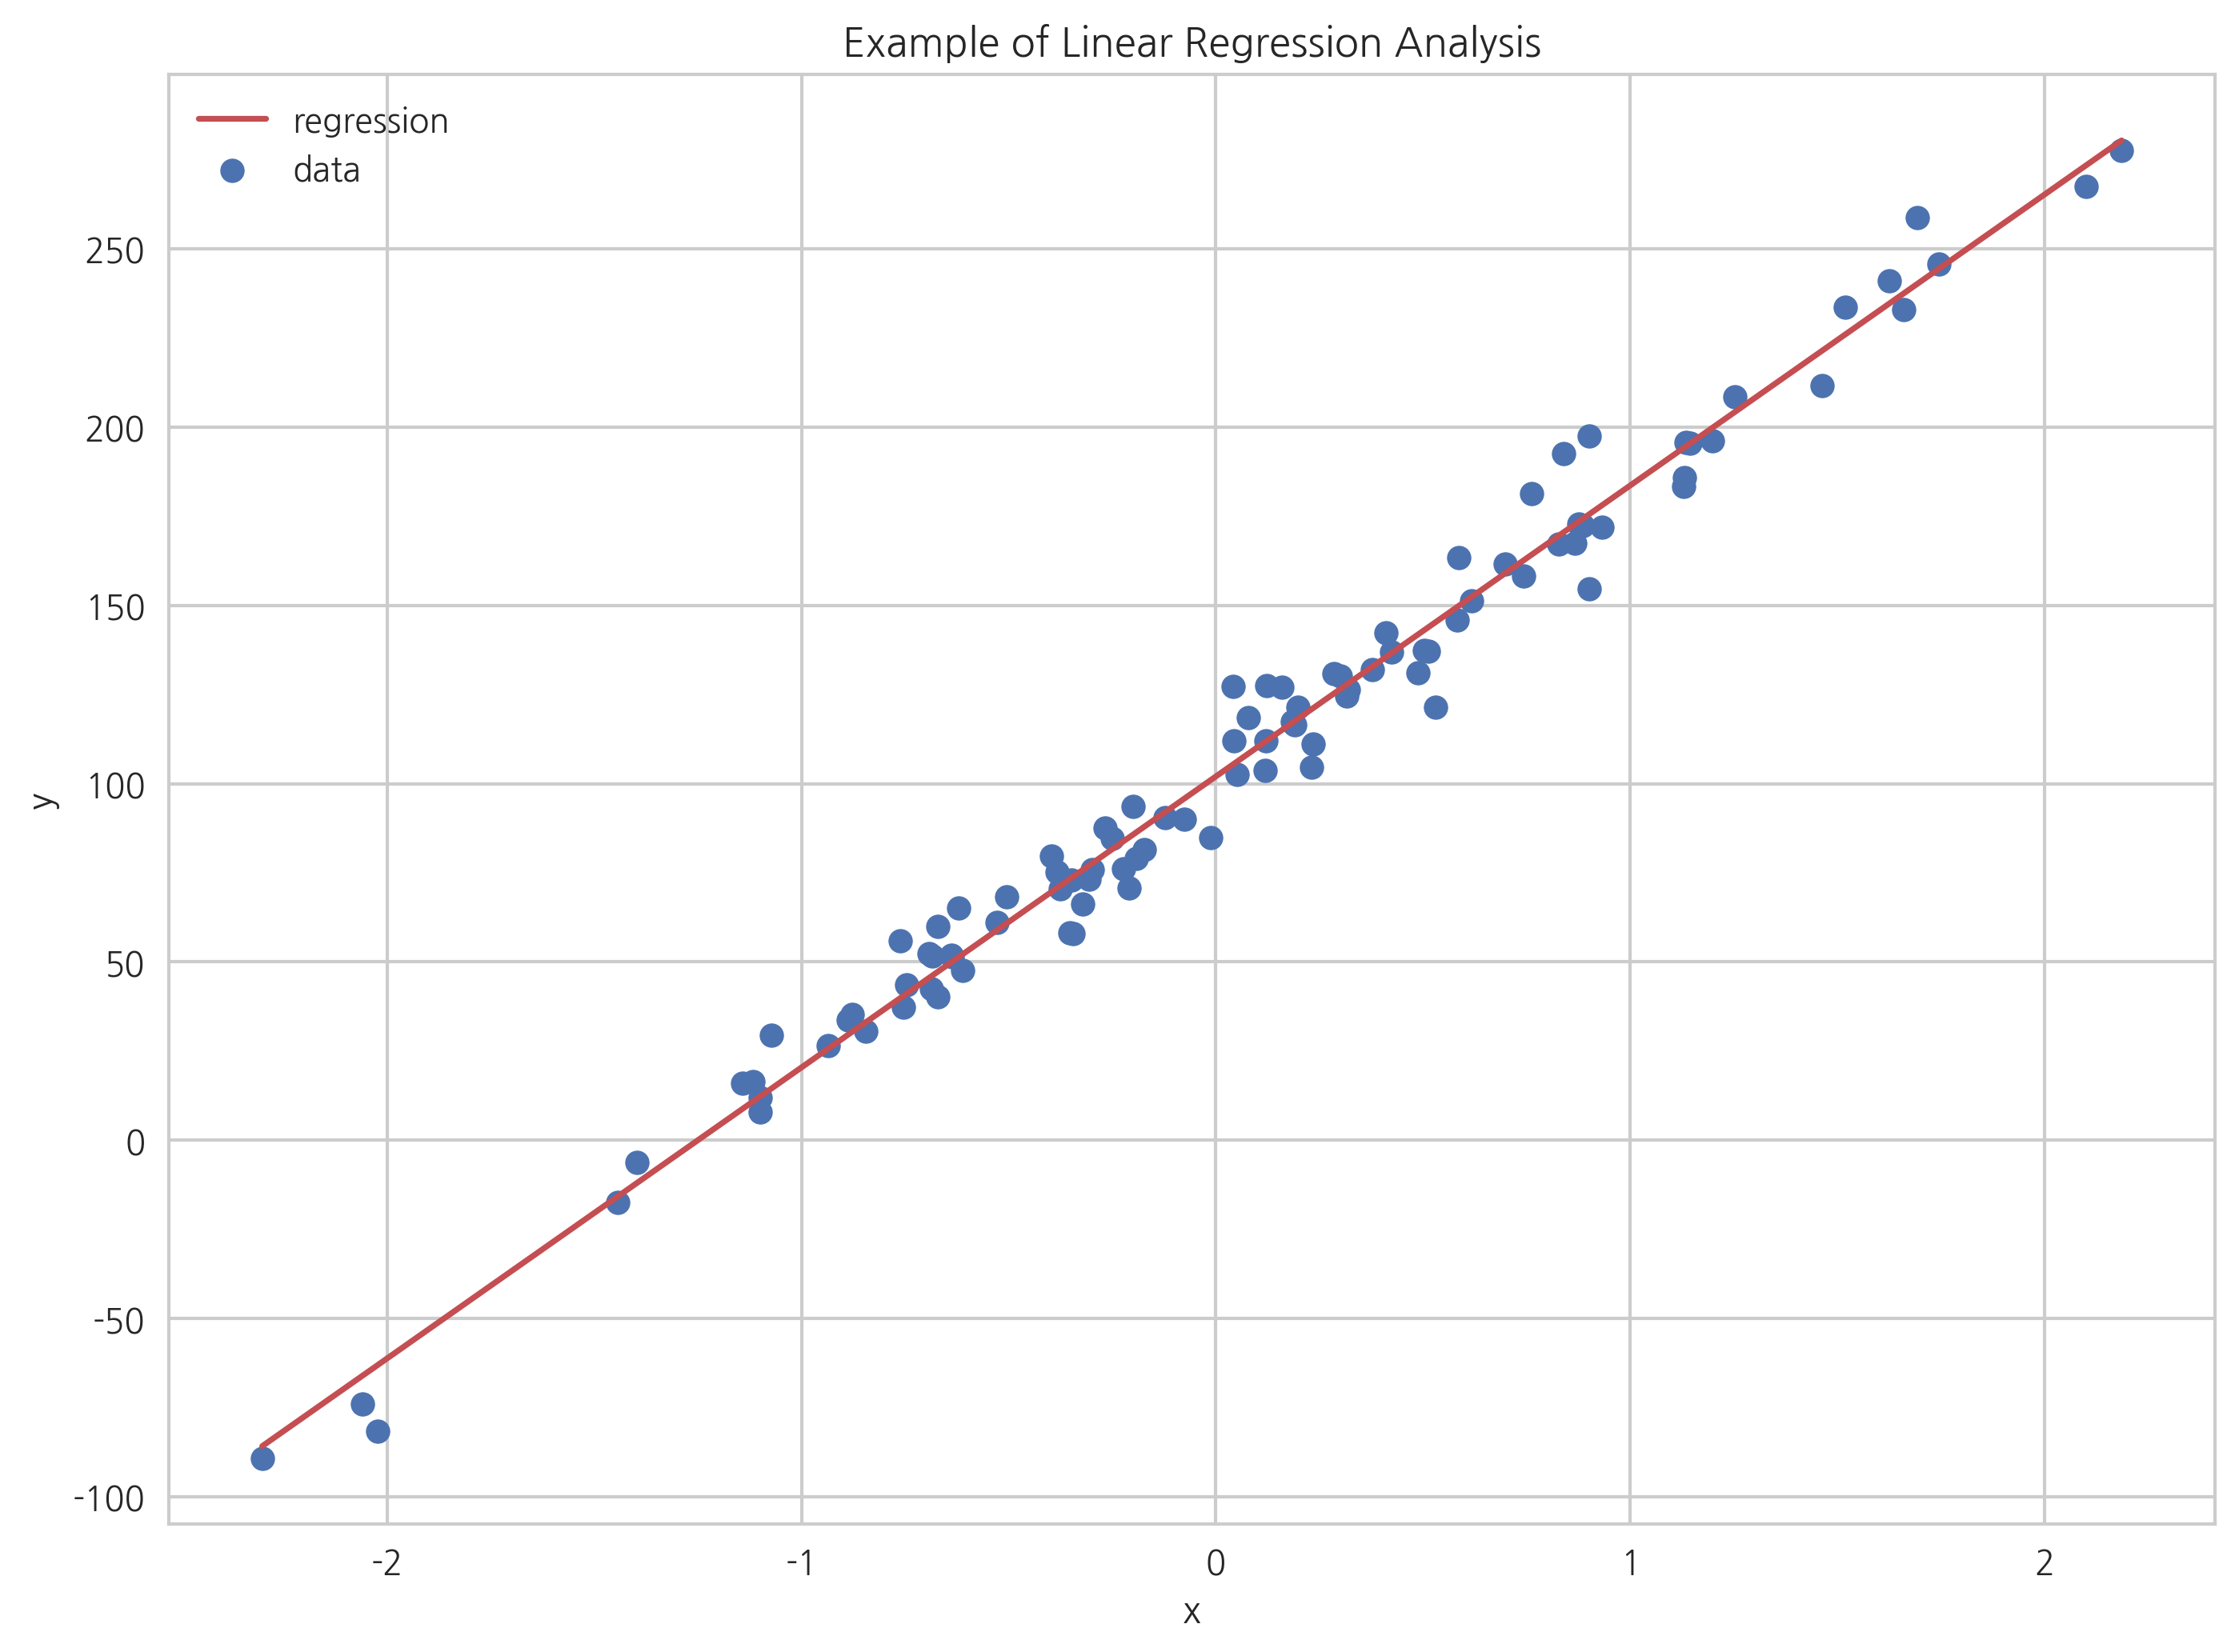

In [10]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

##  Scikit-Learn 패키지를 사용한  선형회귀분석

Scikit-Learn 패키지를 사용하여 선형회귀분석을 하는 경우에는 `linear_model` 서브 패키지의 `LinearRegression` 클래스를 사용한다. 사용법은 다음과 같다.

1. `LinearRegression` 클래스 객체 생성
    ```
    model = LinearRegression(fit_intercept=True)
    ```
    상수항이 없으면 `fit_intercept=False`로 설정한다.

2. `fit` 메서드로 모형 추정. 오그멘테이션을 자동으로 해주므로 사용자가 오그멘테이션을 할 필요는 없다.
    ```
    model.fit(X, y)
    ```
    회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다.
    * `coef_` : 추정된 가중치 벡터
    * `intercept_` : 추정된 상수항 

3. `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
    ```
    y_new = model.predict(x_new)
    ```

다음은 보스턴 집값 데이터를 사용하여 회귀분석을 하는 예이다.

In [11]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

print(model_boston.coef_)
print(model_boston.intercept_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804


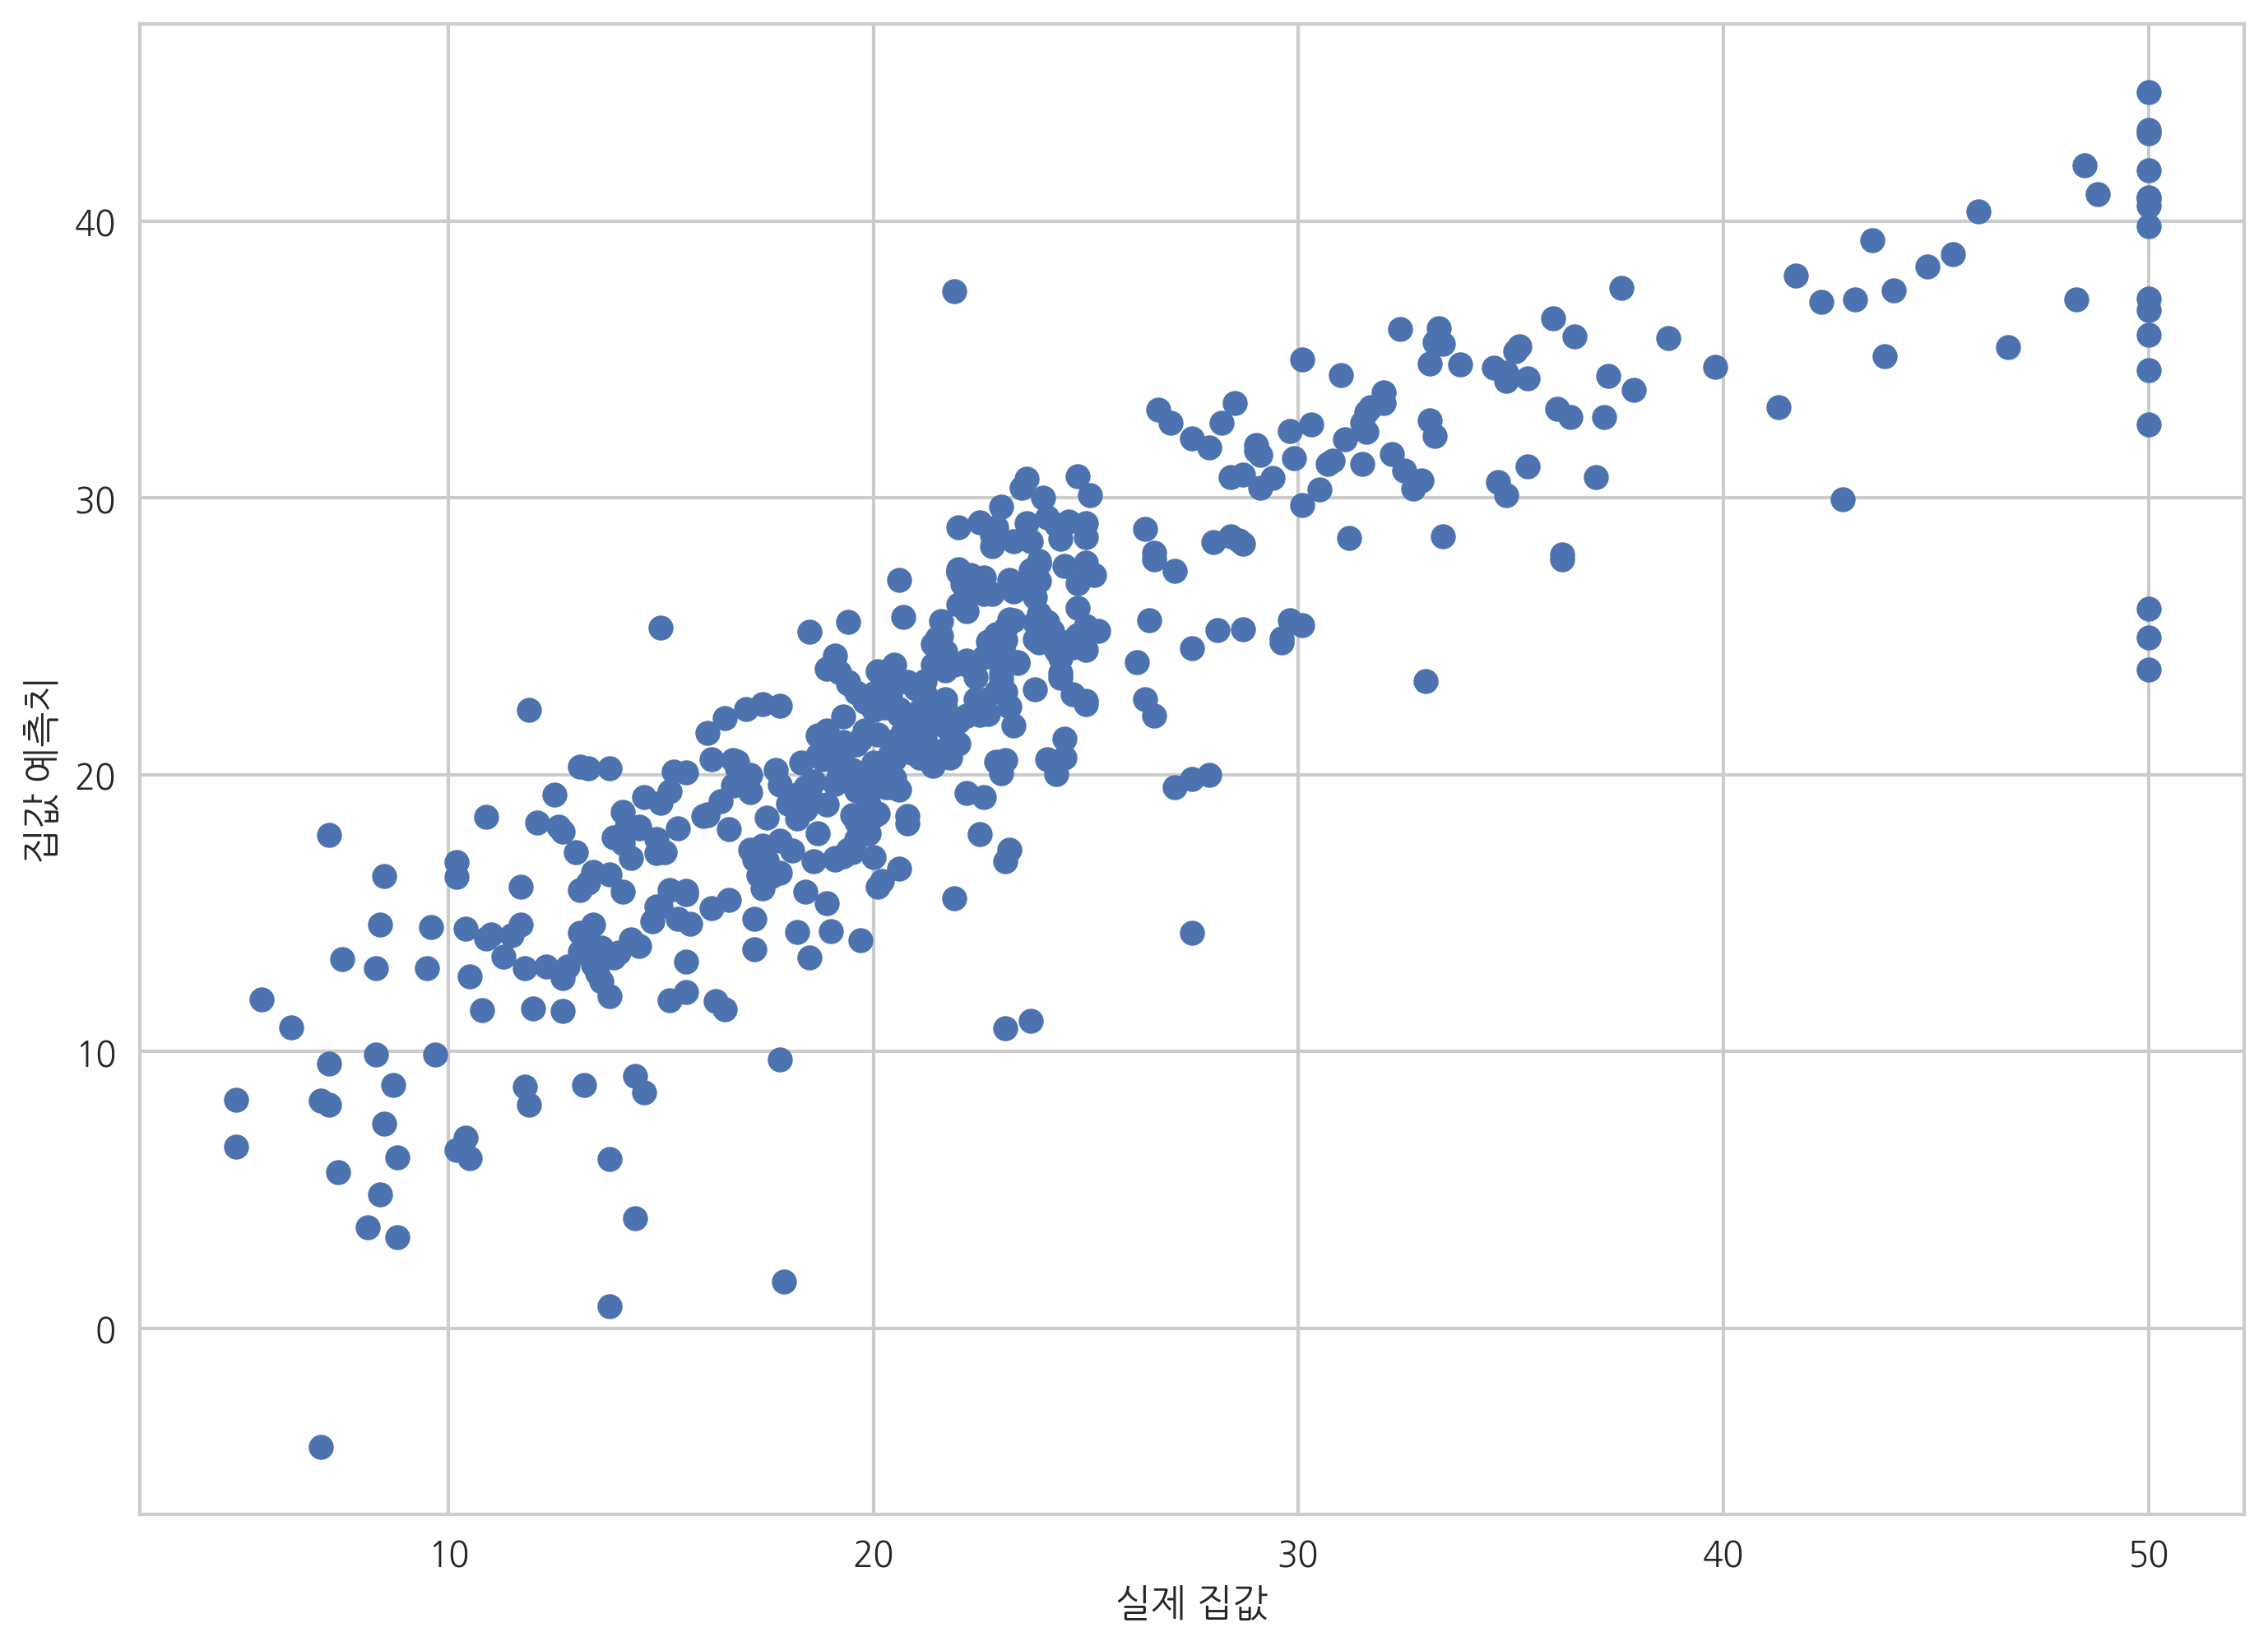

In [12]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

***
연습해보기

In [13]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression()
model_boston.fit(boston.data, boston.target)

print(model_boston.coef_)
print(model_boston.intercept_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804


***

## StatsModels 를 사용한 선형회귀분석

statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형회귀분석을 실시한다. `OLS` 클래스 사용법은 다음과 같다.


1. `OLS` 클래스 객체 생성. 이 때 Scikit-Learn 패키지와 달리 데이터를 미리 주어야 하며 자동으로 상수항을 만들어주지 않기 때문에 사용자가 `add_constant` 명령으로 상수항을 추가해야 한다. 또한 인수의 순서가 Scikit-Learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다.
    ```
    model = OLS(y, X)
    ```
    
2. `fit` 메서드로 모형 추정. Scikit-Learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다.
    ```
    result = model.fit()
    ```

3. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다.
    ```
    print(result.summary()
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 오그멘테이션을 해 주어야 한다.

***
Scikit-Learn과의 차이점
1. 오그멘테이션을 직접 해줘야한다.
2. 모델객체 만들때 데이터를 넣어줘야한다.
3. 데이터 넣는 순서가 다르다. (scikit-learn은 (X, y), StatsModels은 (y, X))
***

In [14]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEKV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEKV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 26 Jun 2017   Prob (F-statistic):          6.95e-135
Time:                        22:24:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

***
P값이 작으면(0과 가까울수록) 기각된다. 0은 아니라는 얘기
***

***
연습해보기

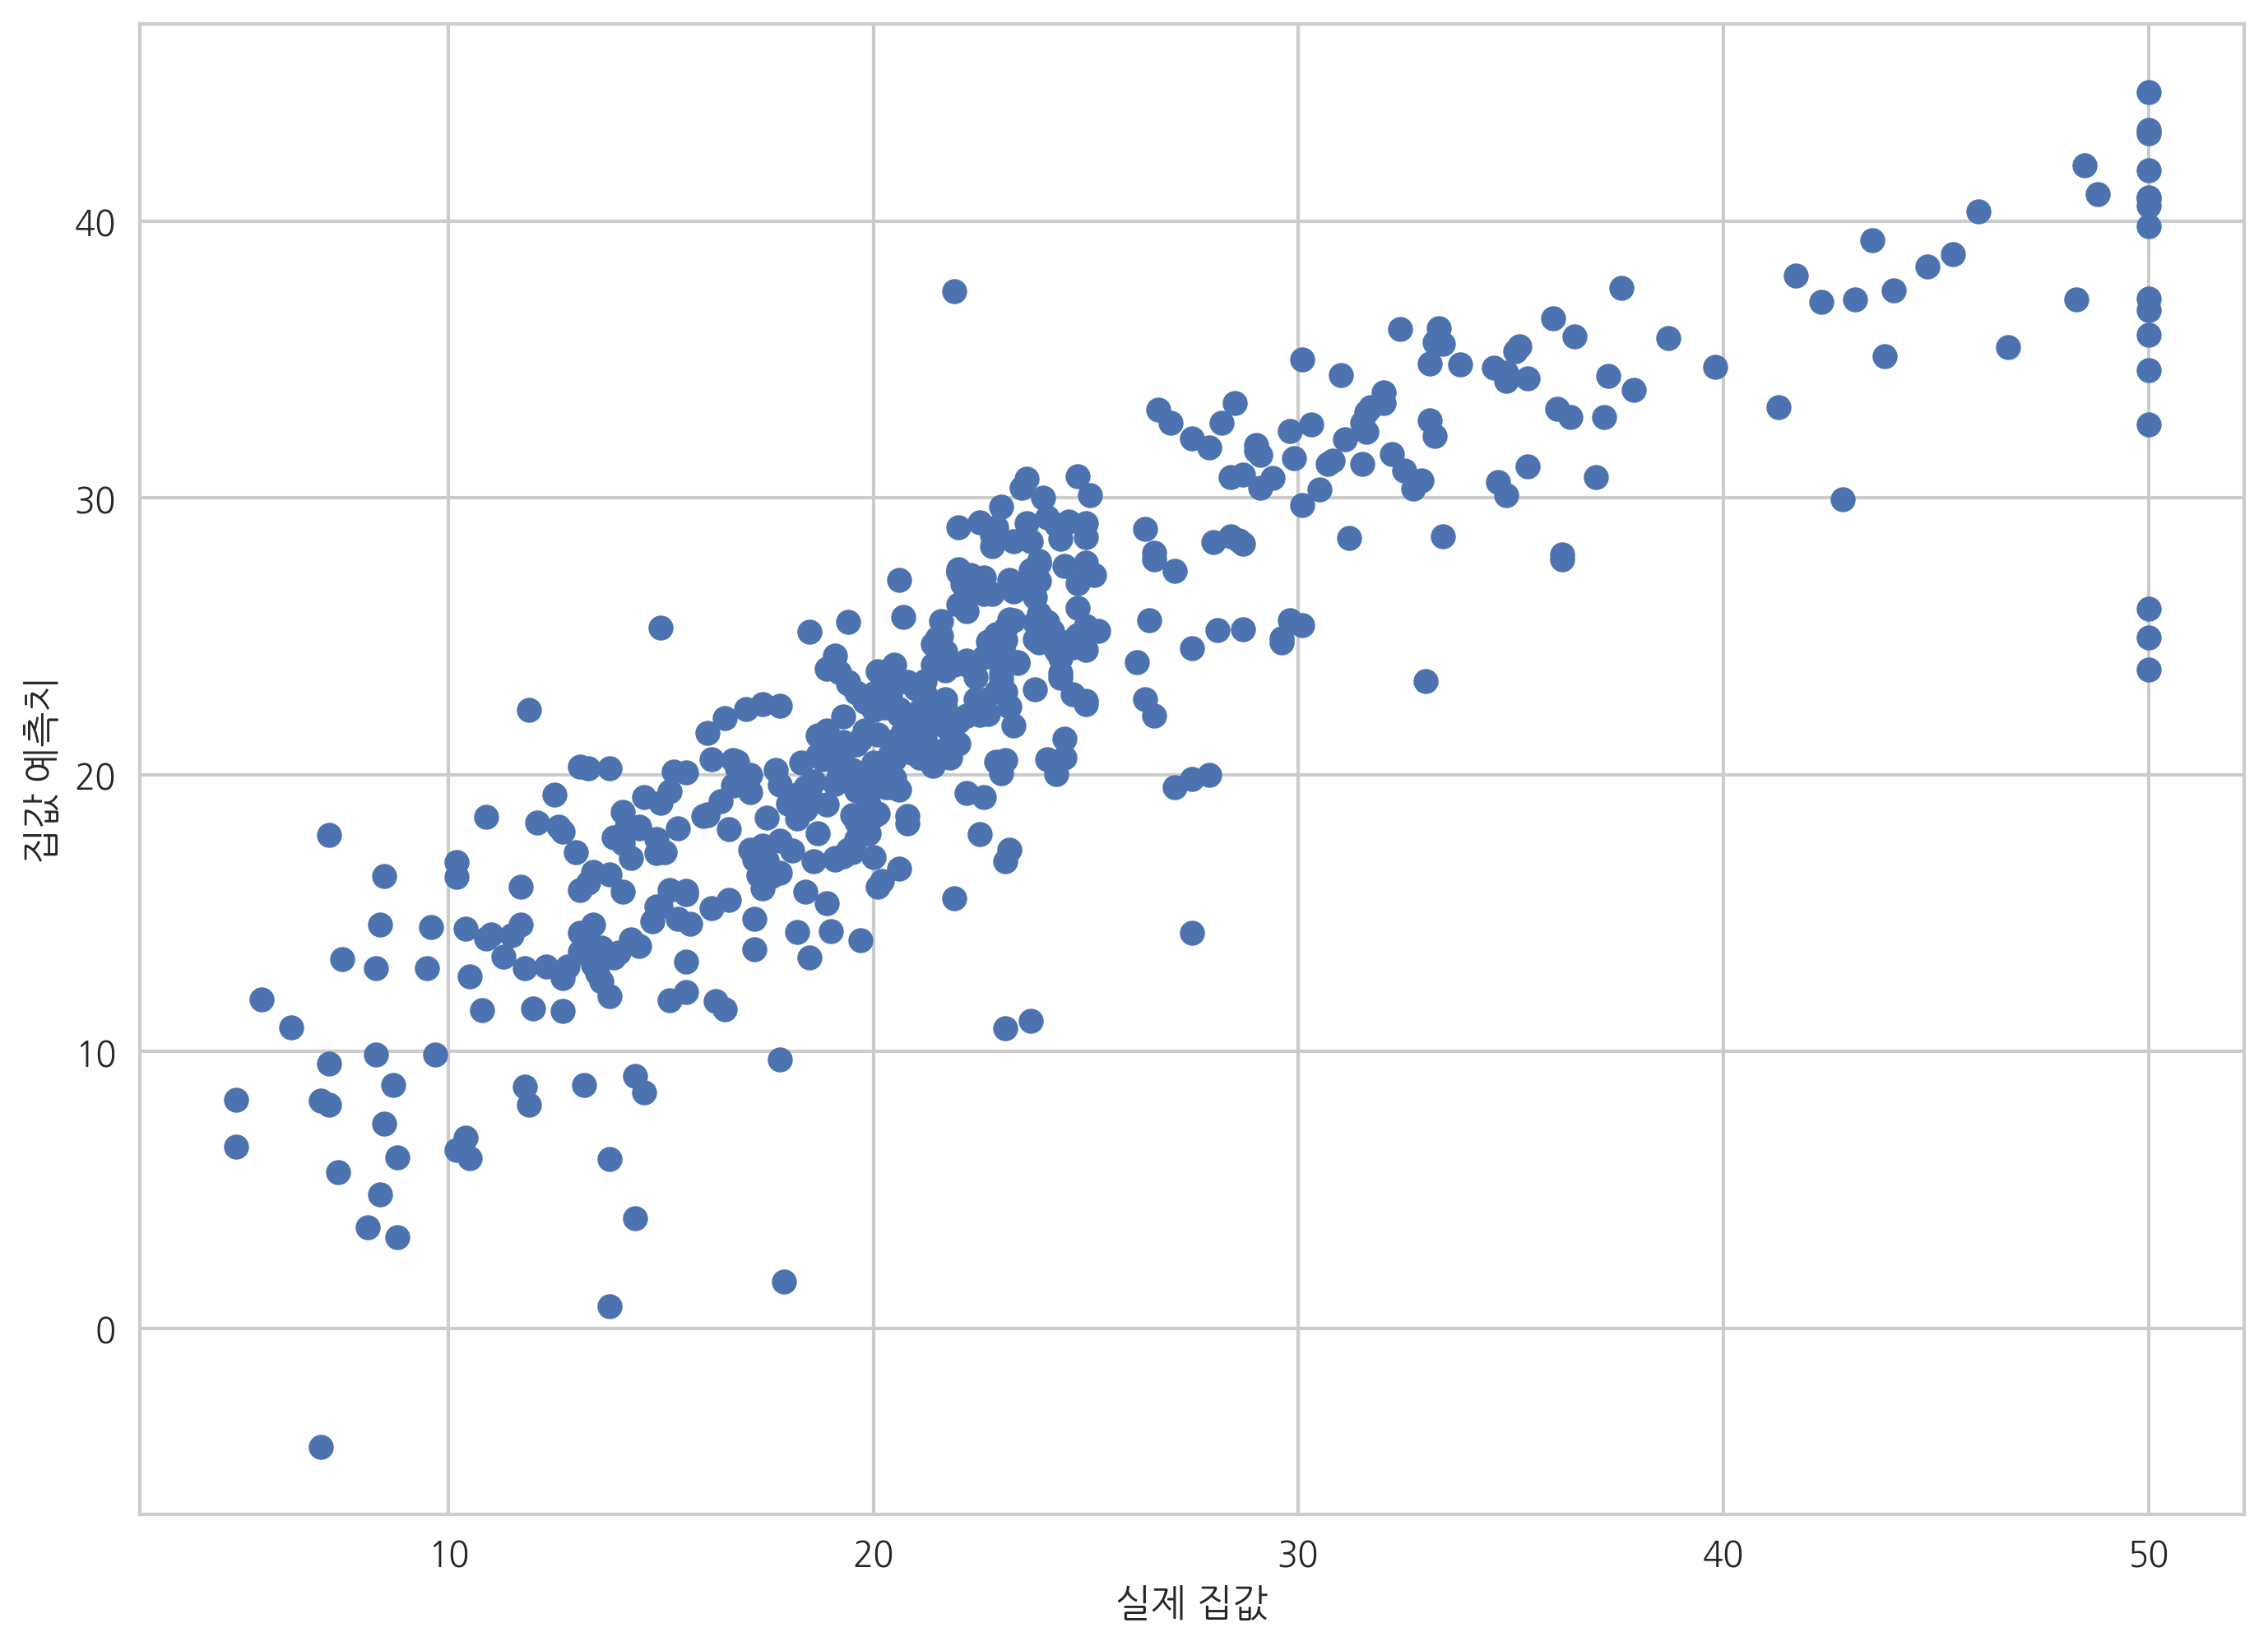

In [15]:
predictions = result_boston2.predict(dfX)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

In [16]:
x_new = [4, 11, 11, 0.1, 0.6, 6, 70, 4, 10, 410, 20, 360, 13]
x_new.insert(0, 1)
x_new

[1, 4, 11, 11, 0.1, 0.6, 6, 70, 4, 10, 410, 20, 360, 13]

In [17]:
predict = result_boston2.predict(x_new)
predict

array([ 18.8541716])

***

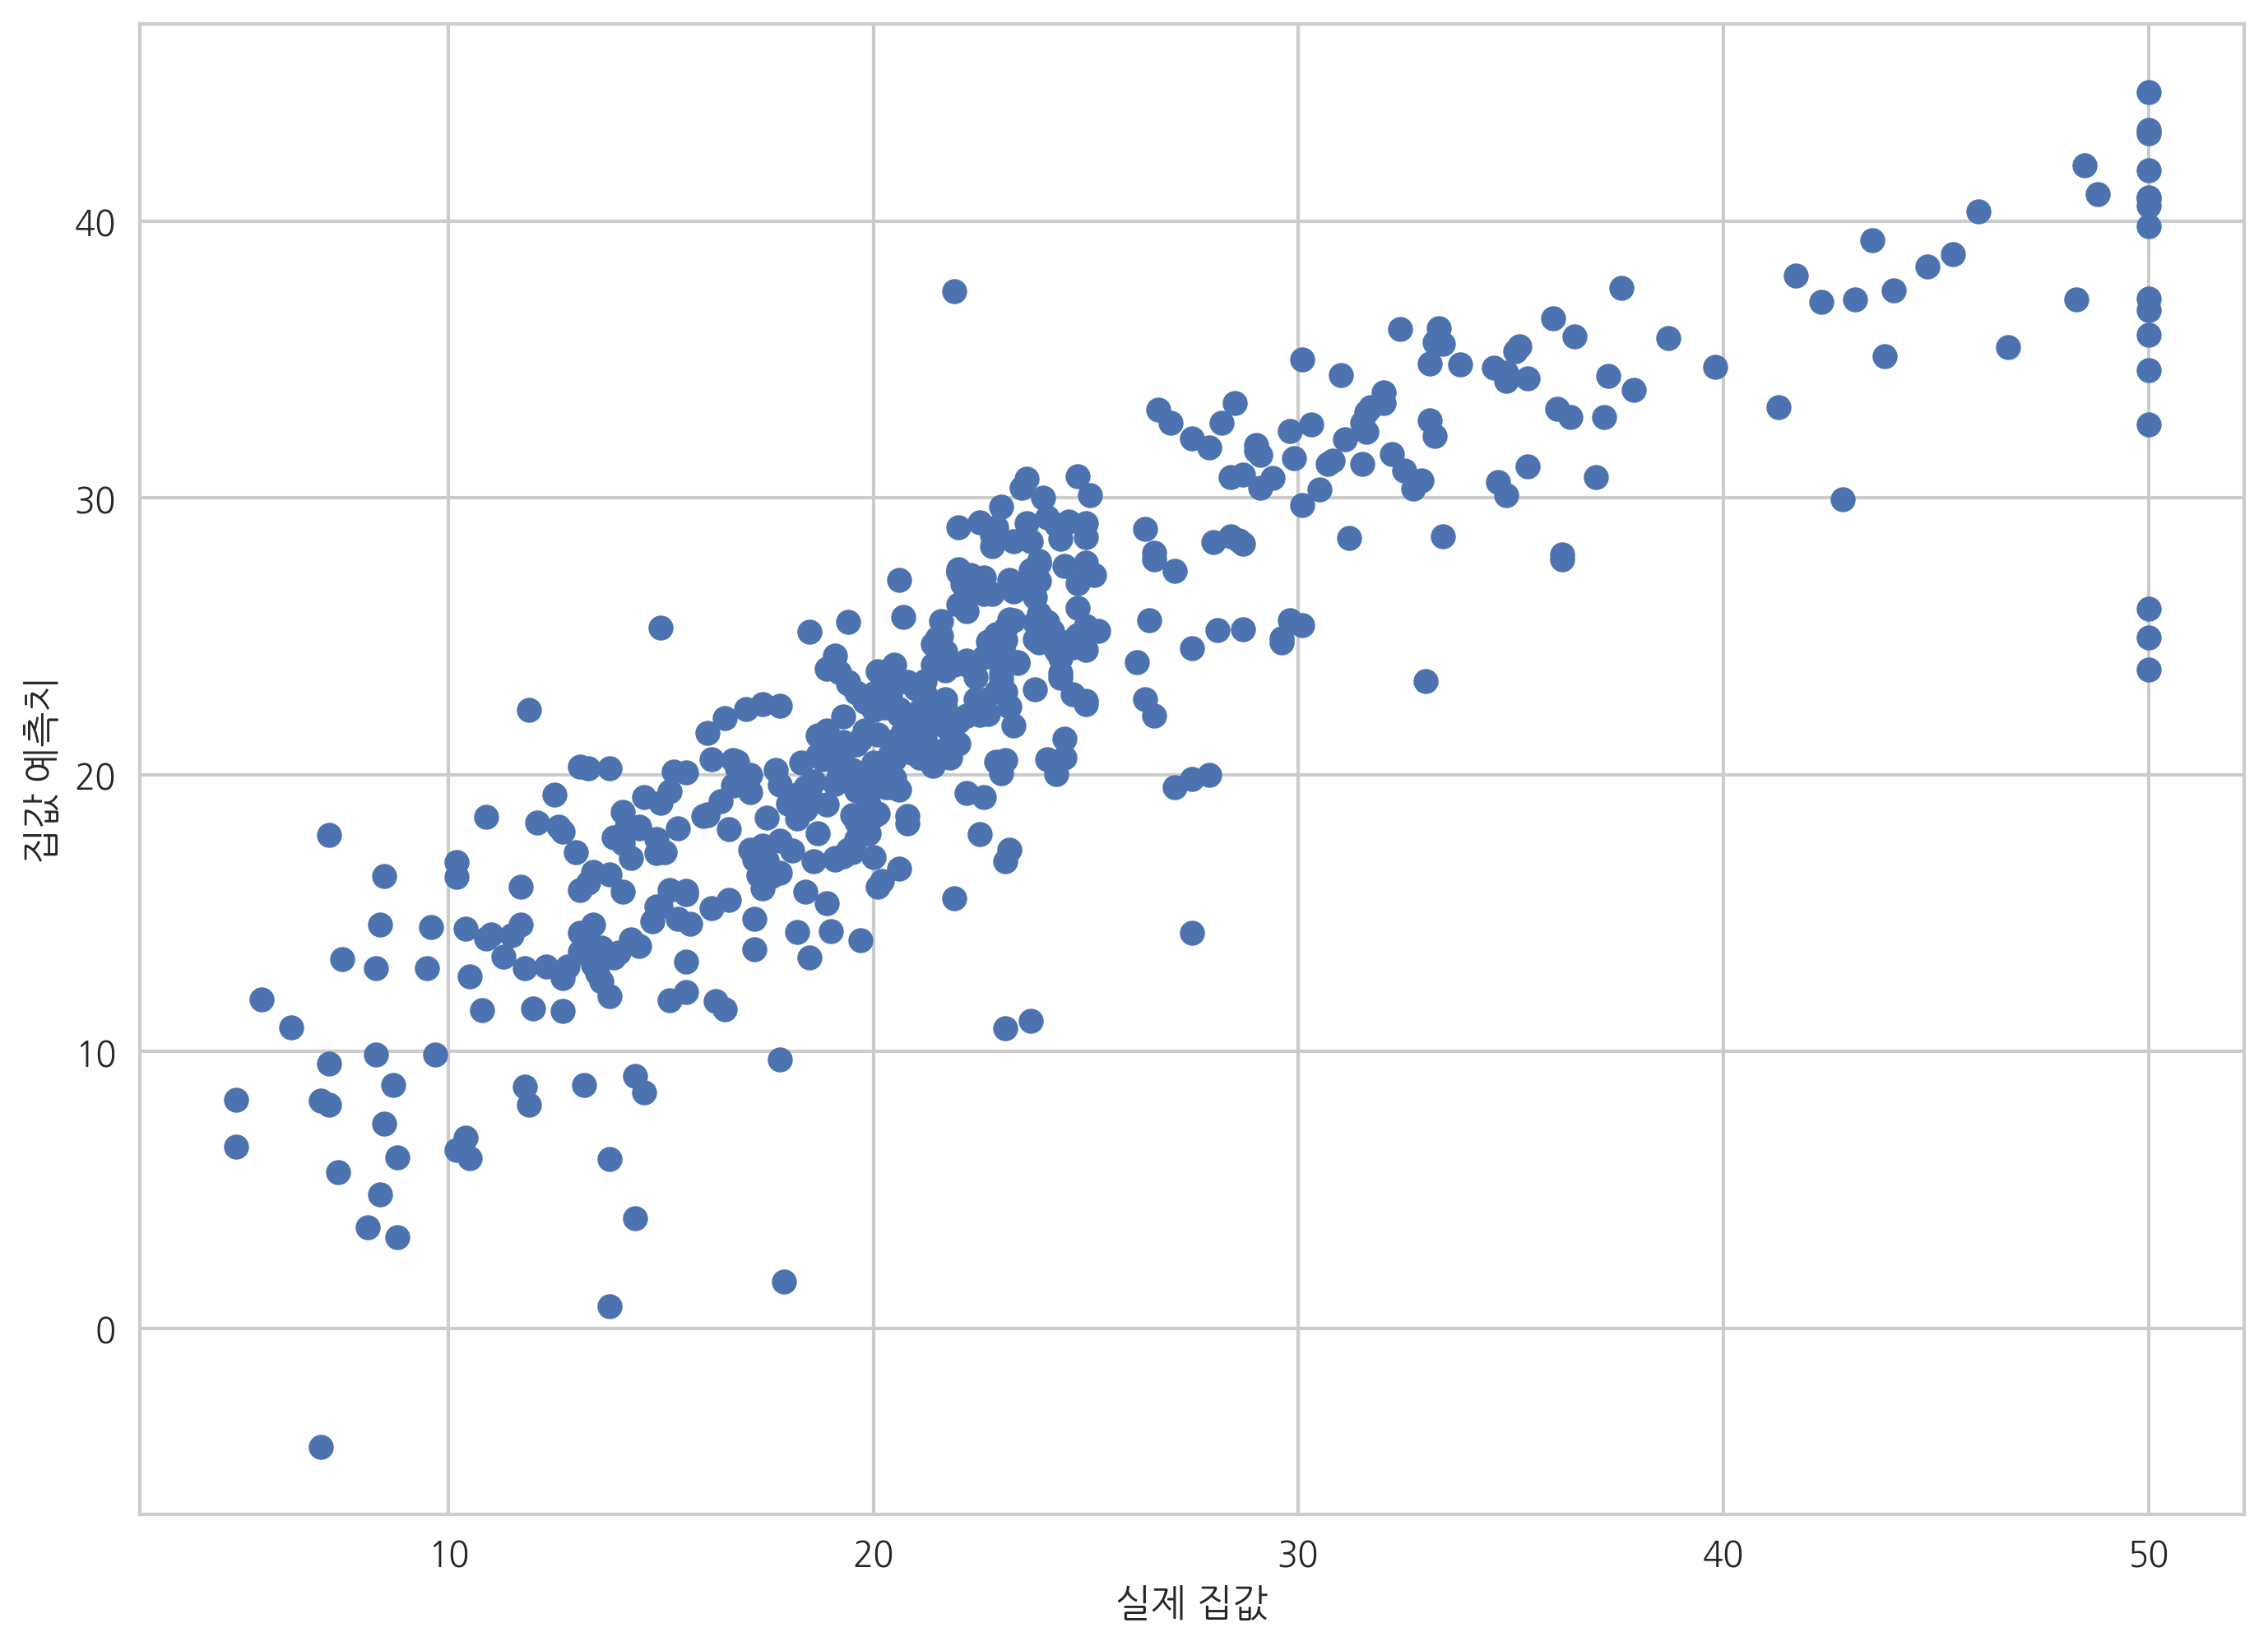

In [18]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

예측을 할 때는 입력 데이터가 추정모형과 동일한 형태가 되어야 한다. 예를 들어 다음과 같은 입력데이터를 생각해보자.

In [19]:
x_new = [4, 11, 11, 0.1, 0.6, 6, 70, 4, 10, 410, 20, 360, 13]

이 데이터는 원래 입력데이터의 평균값에서 힌트를 얻어 만든 가상의 데이터이다.

In [20]:
dfX0.mean()

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

다음과 같이 원래 데이터와 동일한 형태의 데이터프레임을 만들어야 한다. 여기에서 데이터 행이 하나인 경우에는 `add_constant`에 `has_constant="add"` 인수를 추가해야 한다.

In [21]:
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, columns=boston.feature_names), 
                          has_constant="add")
dfx_new

const  CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS   RAD    TAX  PTRATIO  \
0    1.0   4.0  11.0   11.0   0.1  0.6  6.0  70.0  4.0  10.0  410.0     20.0   

       B  LSTAT  
0  360.0   13.0

In [22]:
result_boston2.predict(dfx_new)

0    18.854172
dtype: float64

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.

* `resid`: 잔차 벡터
* `params`: 모수 벡터

이외에도 여러가지 분석에 필요한 다양한 메서드도 제공한다.

In [23]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [24]:
result_boston2.resid.head()
0   -6.008213

-6.008213

이외에도 StatsModels 패키지는 회귀분석 결과를 살펴볼 수 있는 다양한 도구를 제공한다. 다음은 StatsModels 패키지가 제공하는 분석용 함수의 예이다.

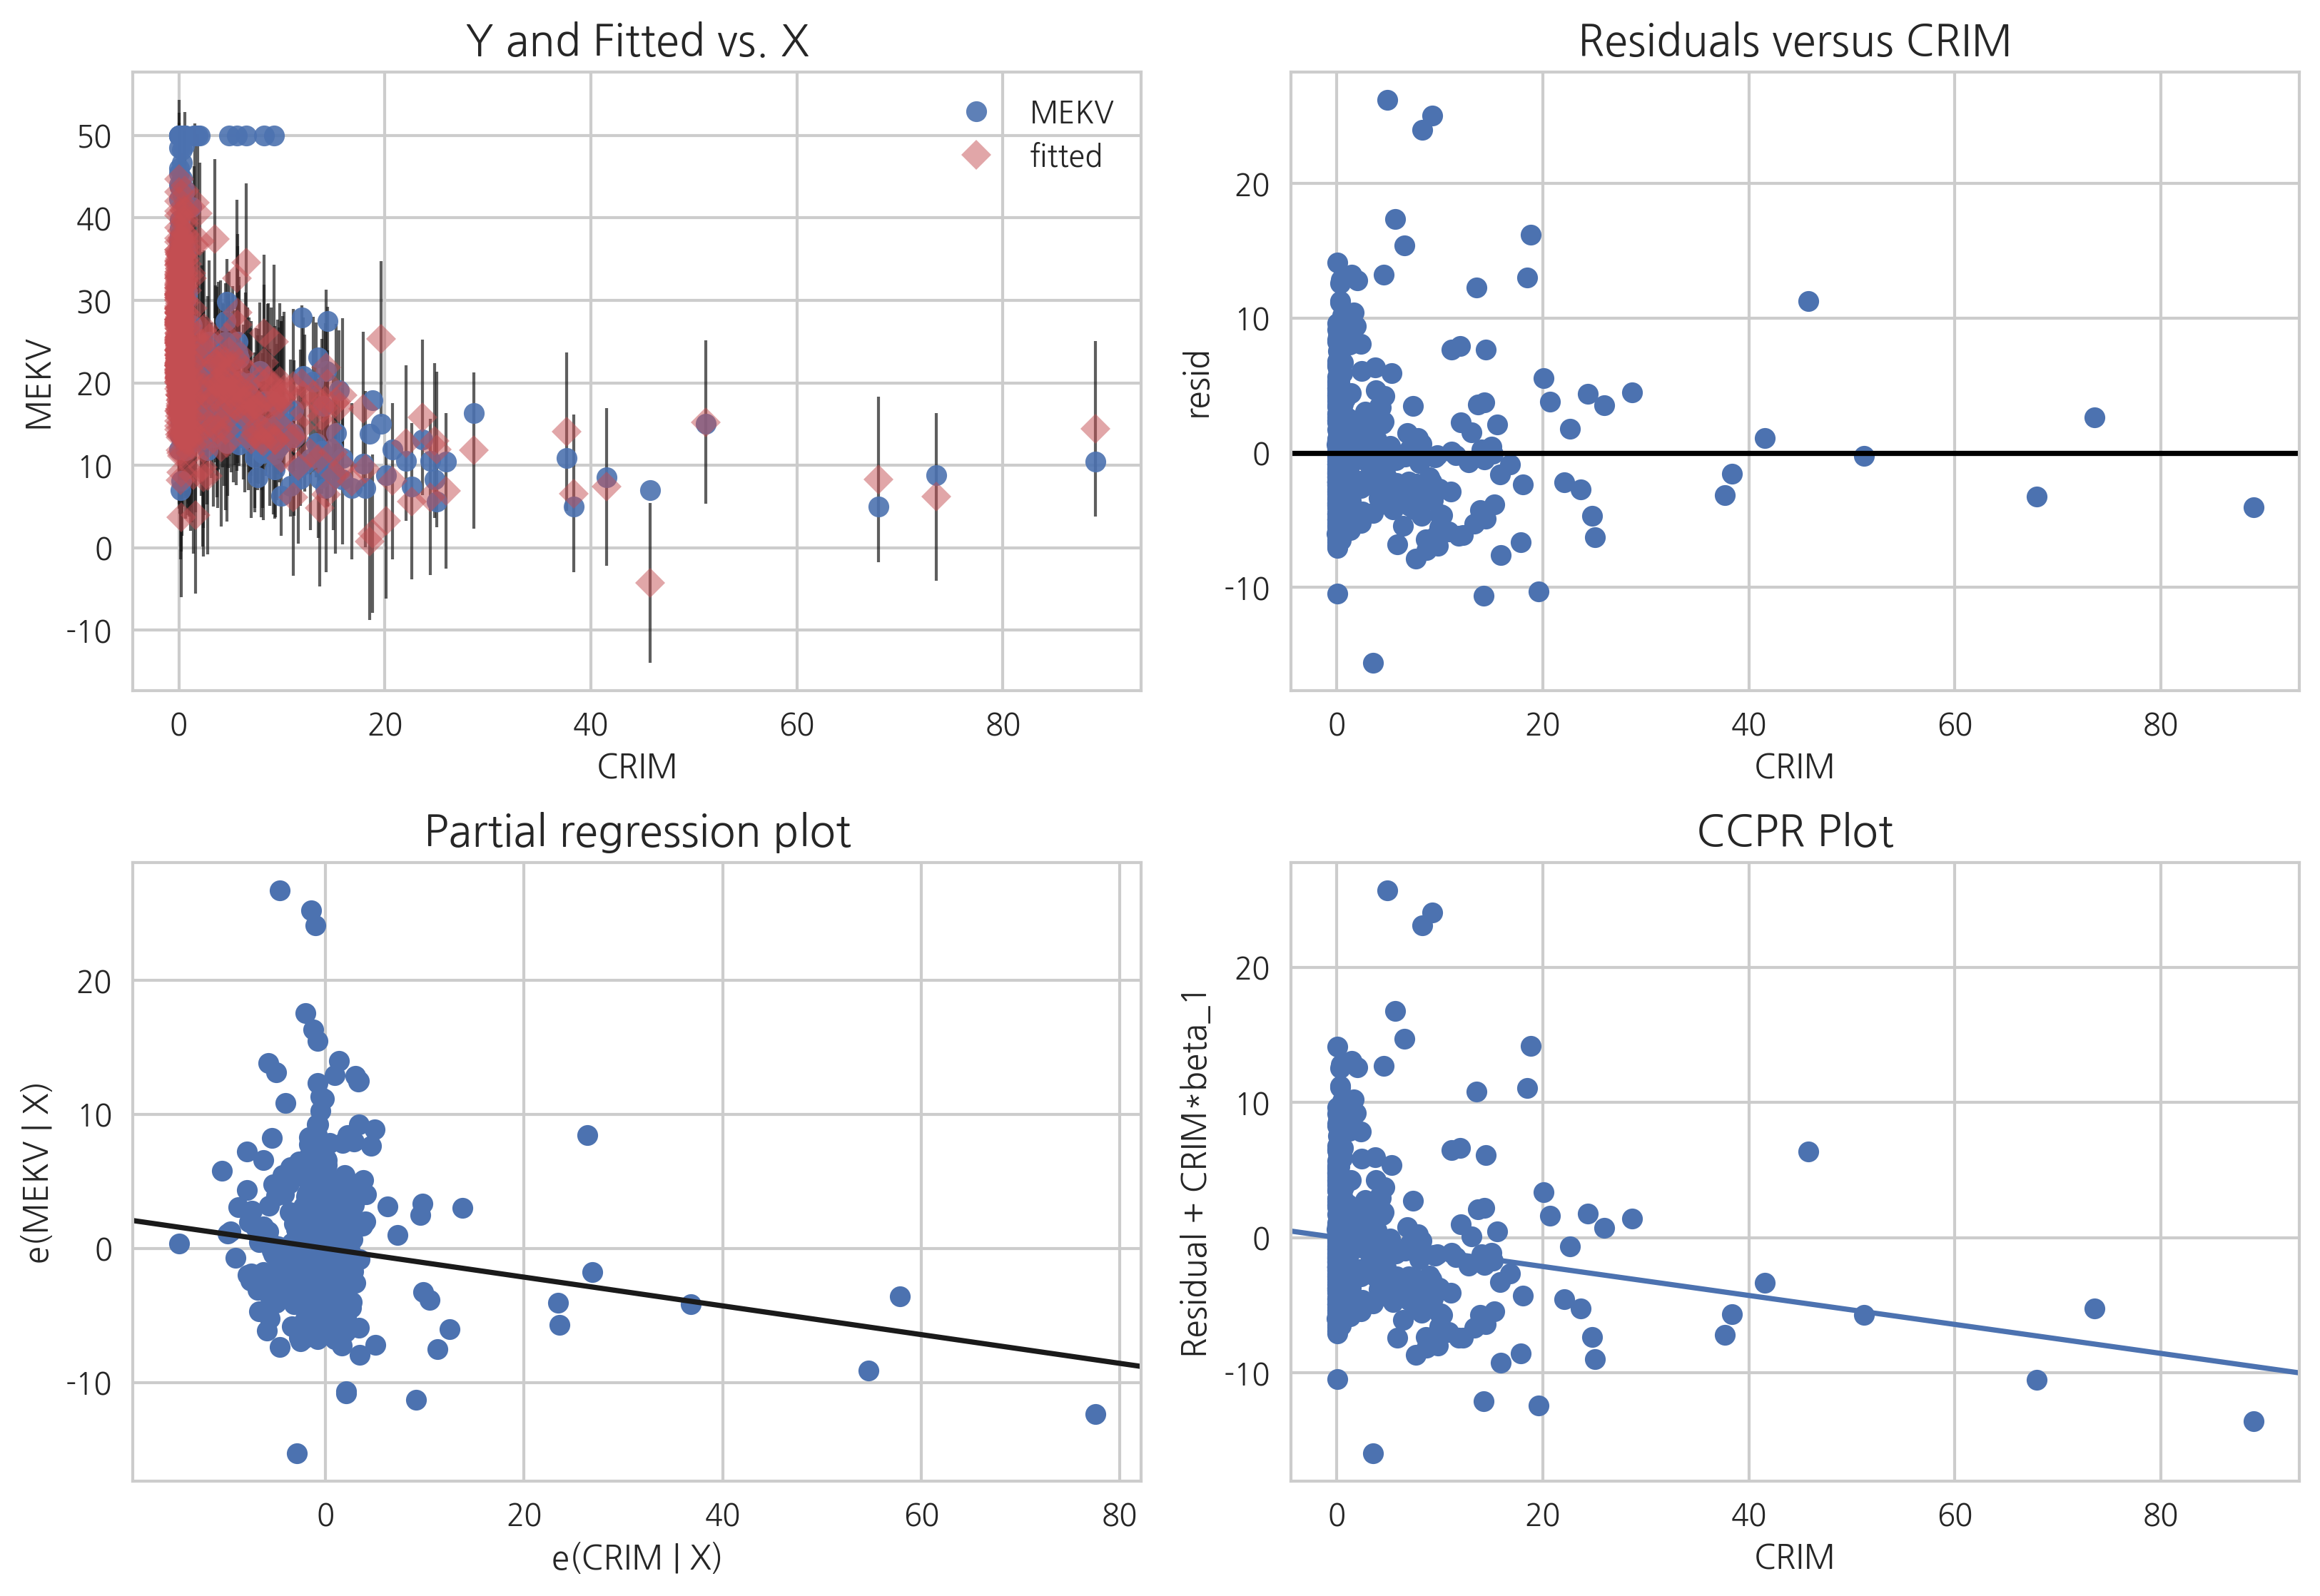

In [25]:
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()

# 레버리지와 아웃라이어

## 레버리지 (Leverage)

개별적인 데이터 표본 하나하나가 회귀분석 결과에 미치는 영향력은 레버리지(leverage) 분석을 통해 알 수 있다.

레버리지는 실제 종속변수값 $y$가 예측치(predicted target) $\hat{y}$에 미치는 영향을 나타낸 값이다. self-influence, self-sensitivity 라고도 한다.

가중치 벡터의 결과값을 예측식에 대입하면 $y$ $\hat{y}$의 관계를 다음과 같이 구할 수 있다.

$$  w = (X^TX)^{-1} X^T y $$

$$  \hat{y} = X w = X((X^TX)^{-1} X^T y ) = ( X(X^TX)^{-1} X^T) y = Hy $$

이 행렬 $H$를 영향도 행렬(influence matrix) 또는 hat 행렬(hat matrix)이라고 한다.

행렬 $H$의 성분을 $h_{ij}$라고 하면 실제 결과값 $y_i$과 예측값 $\hat{y}_i$은 다음과 같은 관계를 가진다.

$$
\hat{y}_i = h_{i1} y_1 + h_{i2} y_2 + \cdots + h_{ii} y_i + \cdots + h_{iN} y_N 
$$

이 식에서 $h_{ii}$ 값이 1이 되고 나머지 성분들이 모두 0이 되면 모든 표본 데이터에 대해 실제 결과값과 예측값이 일치하게 된다.

$$ h_{ii} = 1, h_{ij} = 0 \; (\text{for } i \neq j) \;\; \rightarrow \;\; \hat{y}_i = y_i $$

**hat 행렬의 대각성분 $h_{ii}$을 레버리지**라고 한다.

$$  h_{ii}=(H)_{ii} $$

 레버리지는 실제의 결과값 $y_i$이 예측값 $\hat{y}_i$에 미치는 영향, 즉 예측점을 자기 자신의 위치로 끌어 당기는 정도를 나타낸 것이다.

레버리지값은 수학적으로 다음과 같은 특성을 가진다.

1. 1보다 같거나 작은 양수 혹은 0이다.

    $$  0 \leq h_{ii} \leq 1 $$
    
2. 레버리지의 합은 모형에 사용된 모수의 갯수 $K$와 같다. 모수에는 상수항도 포함되므로 상수항이 있는 1차원 모형에서는 $K = 2$가 된다.

    $$  \text{tr}(H) = \sum_i^N h_{ii} = K $$

이 두가지 성질로부터 레버리지 값은 $N$개의 데이터에 대한 레버리지값은 양수이고 그 합이 $K$가 된다. 즉 $K$라고 하는 값을 $N$개의 변수가 나누어 가지는 것과 같다.

현실적으로 데이터의 갯수 $N$는 모수의 갯수 $K$보다 훨씬 많기 때문에 위에서 말한 특성을 적용하면 모든 레버리지 값이 동시에 1이 되는 것은  불가능하다.

## StatsModels를 이용한 레버리지 계산


레버리지는 `RegressionResults` 클래스의 `get_influence` 메서드로 구할 수 있다.


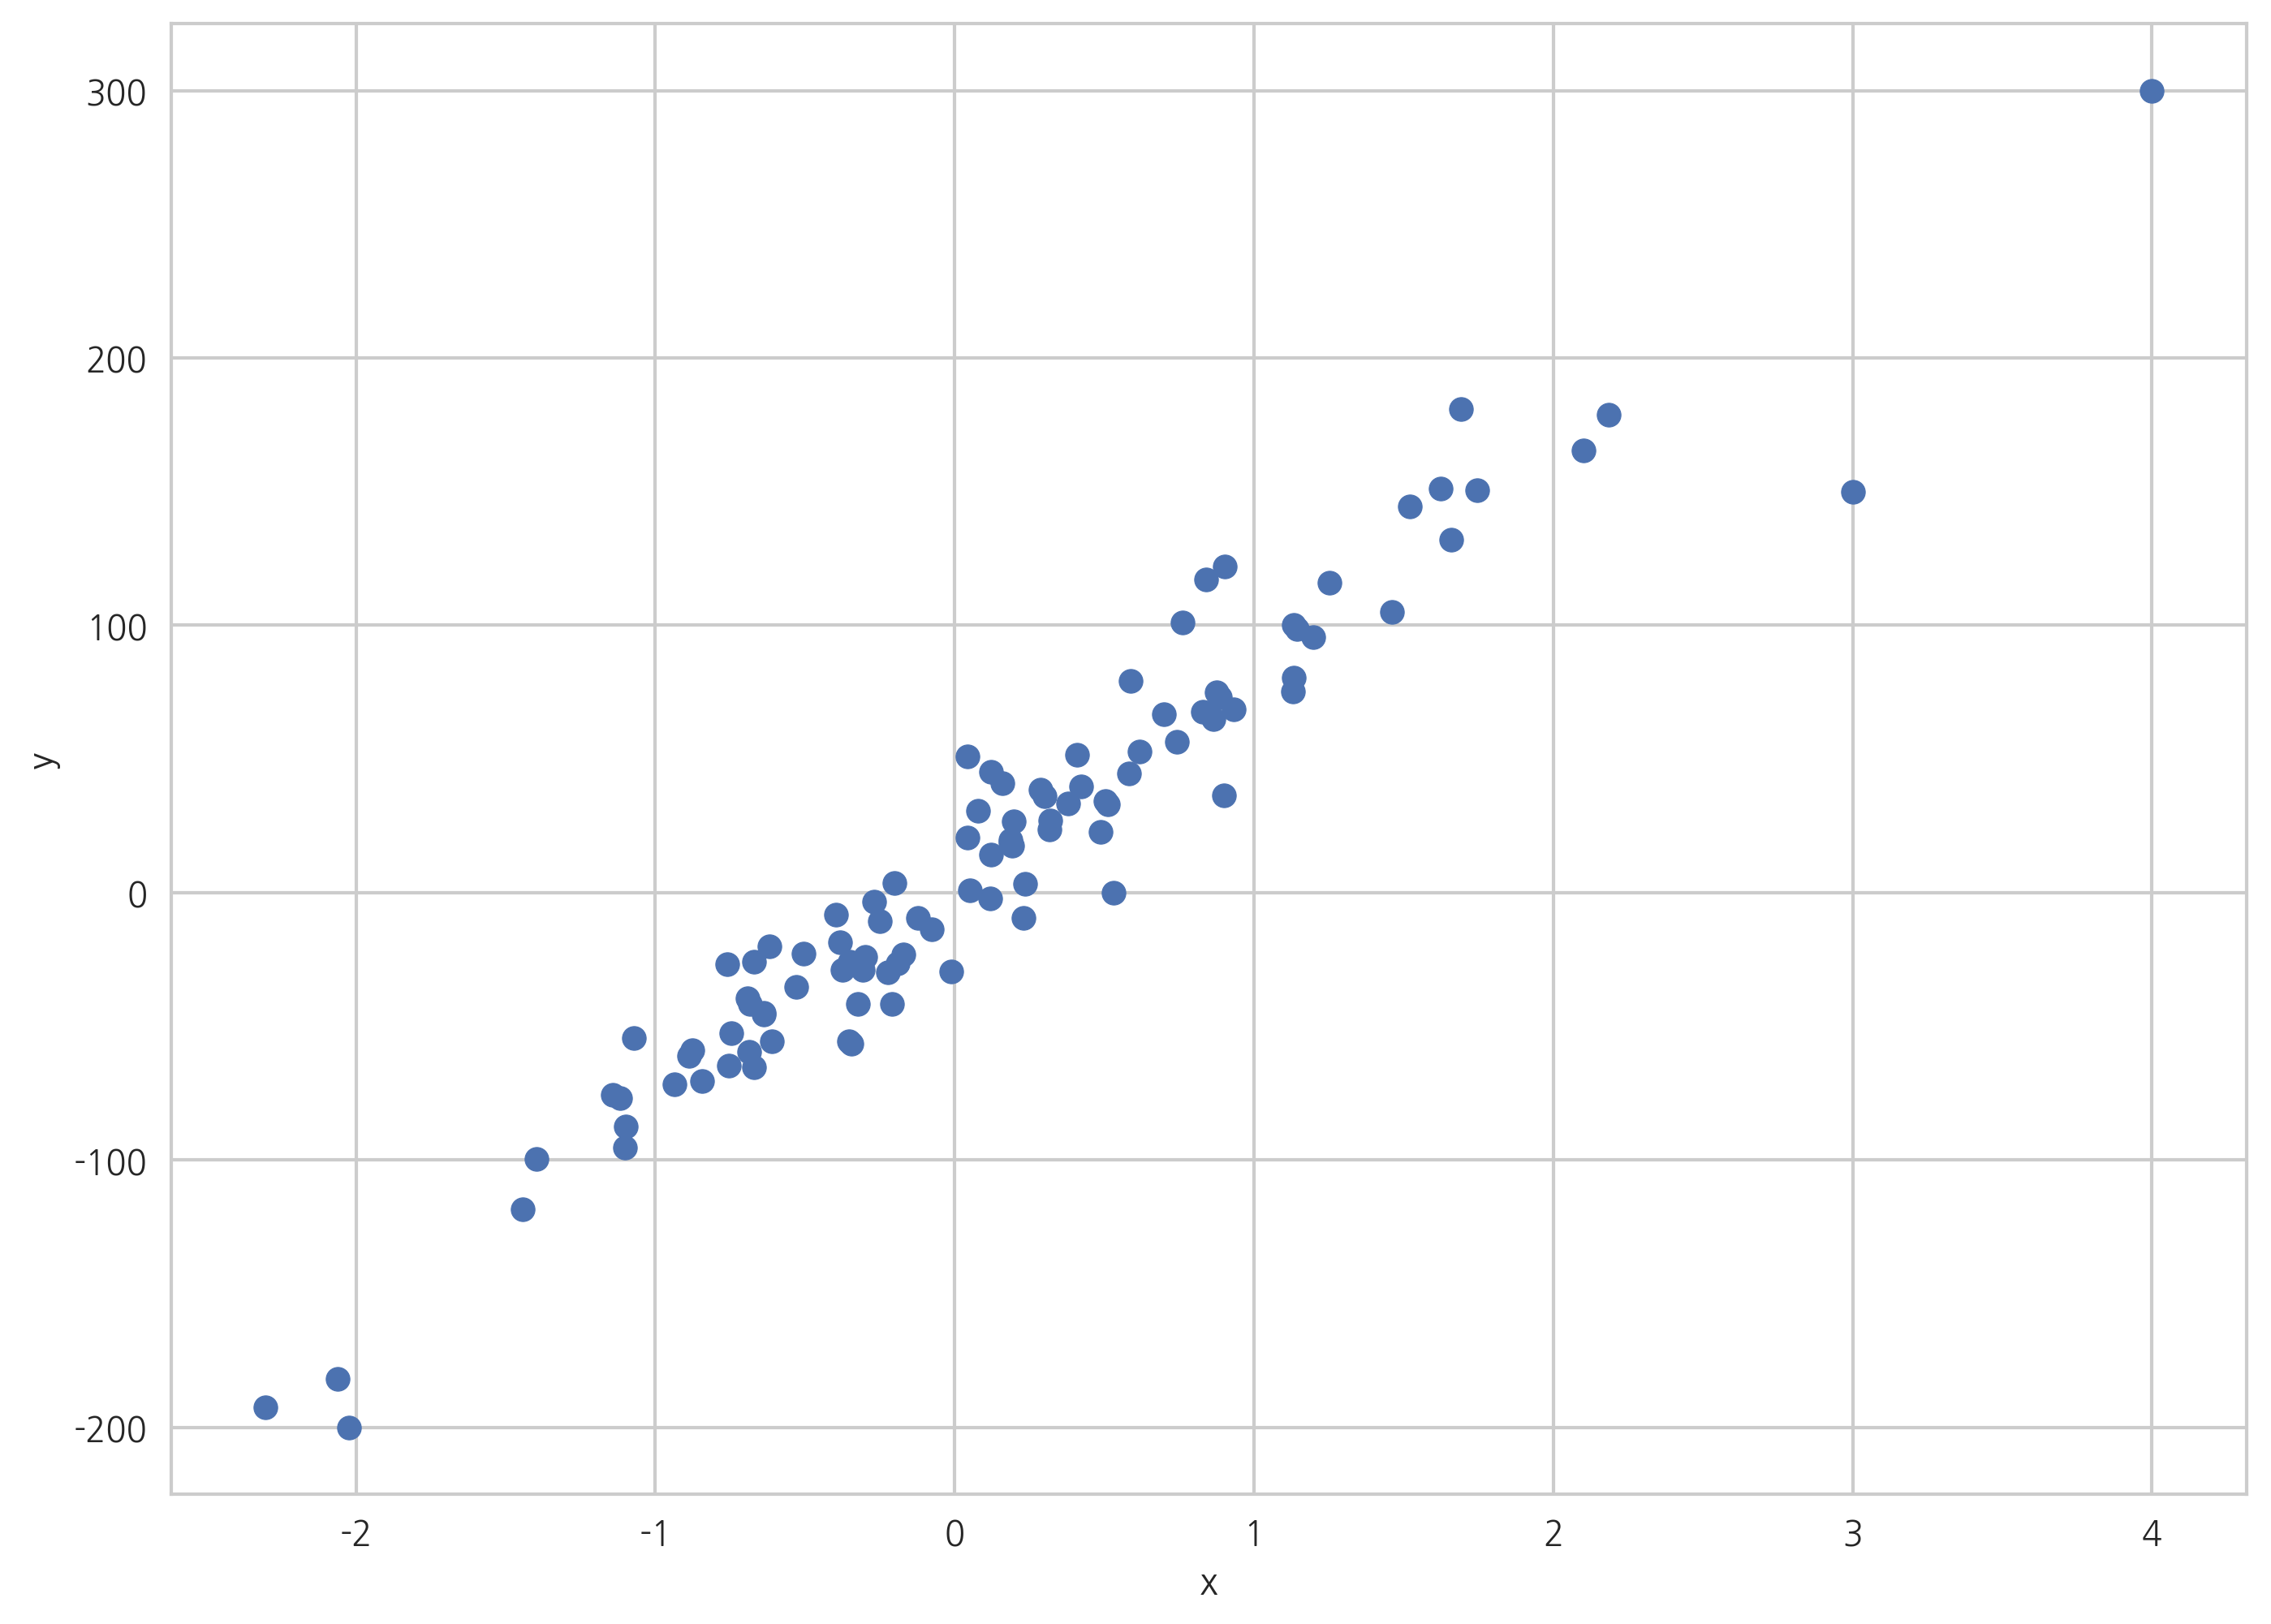

In [26]:
from sklearn.datasets import make_regression

# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

# 레버리지가 높은 가상의 데이터를 추가
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

이 데이터를 이용하여 선형회귀를 한다.

In [27]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 26 Jun 2017   Prob (F-statistic):           1.61e-61
Time:                        22:24:51   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

선형회귀 결과에서 `get_influence` 메서드를 호출하면 영향도 정보 객체를 구할 수 있다. 이 객체는 `hat_matrix_diag` 속성으로 레버리지 벡터를 가지고 있다.  

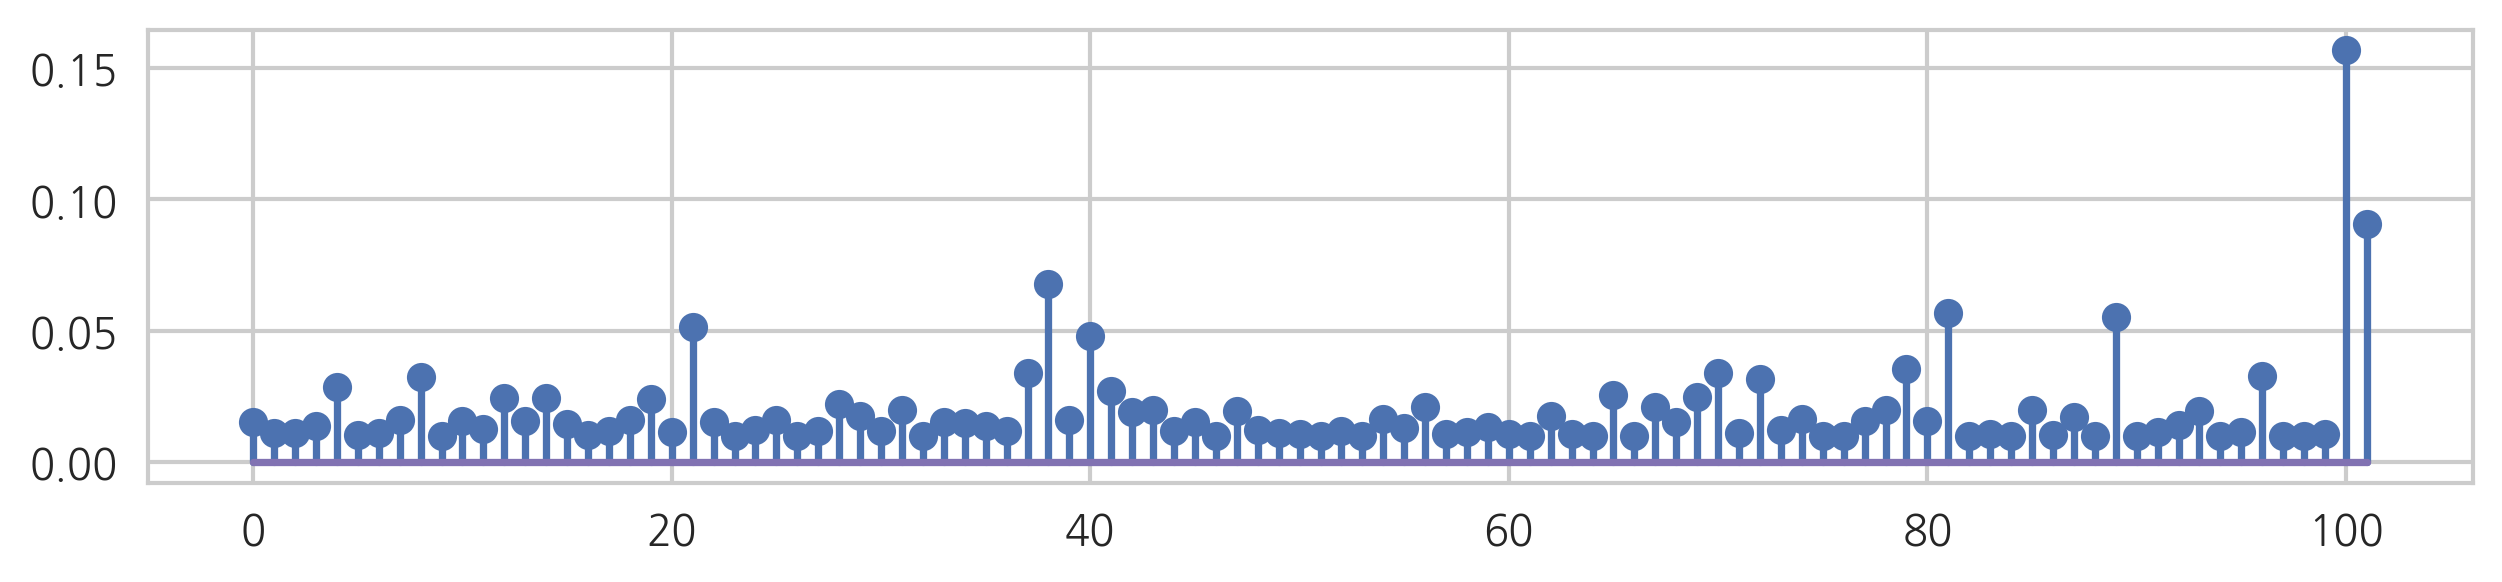

In [28]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

***
연습해보기

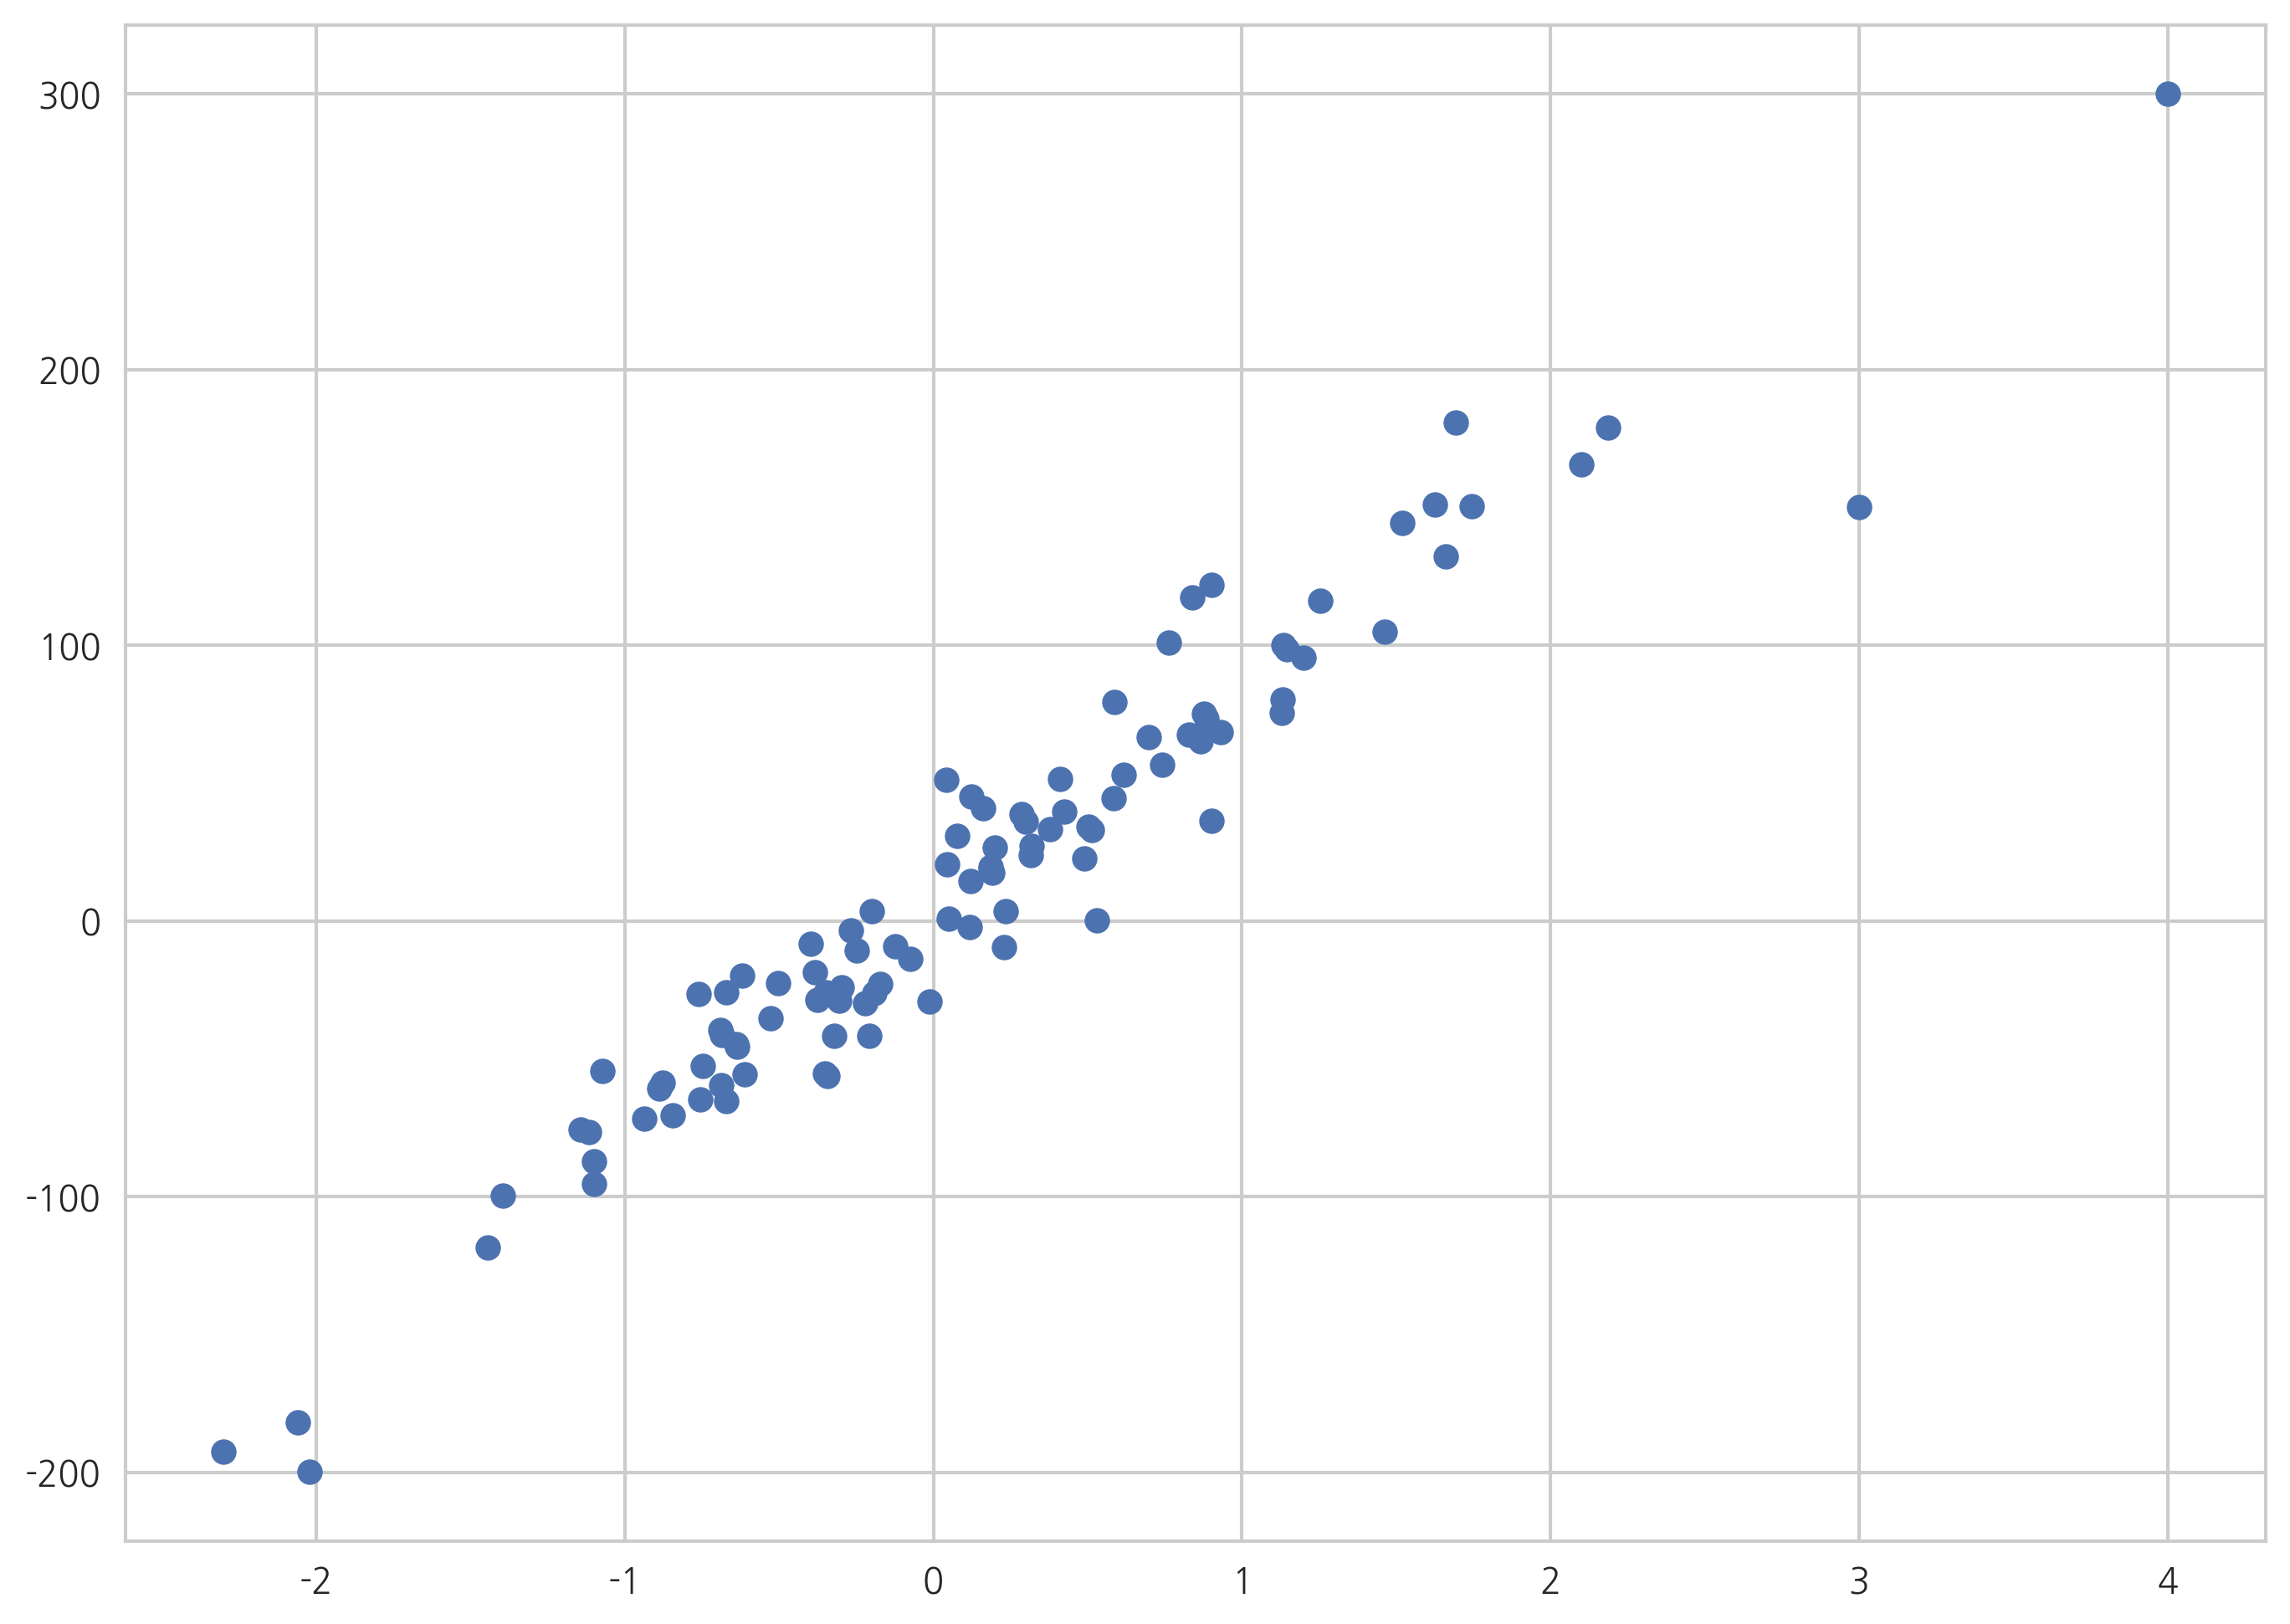

In [29]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

X0 = np.vstack([X0, np.array([[4], [3]])])
X = sm.add_constant(X0)
y =np.hstack([y, [300, 150]])
plt.scatter(X0, y)
plt.show()

In [30]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 26 Jun 2017   Prob (F-statistic):           1.61e-61
Time:                        22:24:55   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

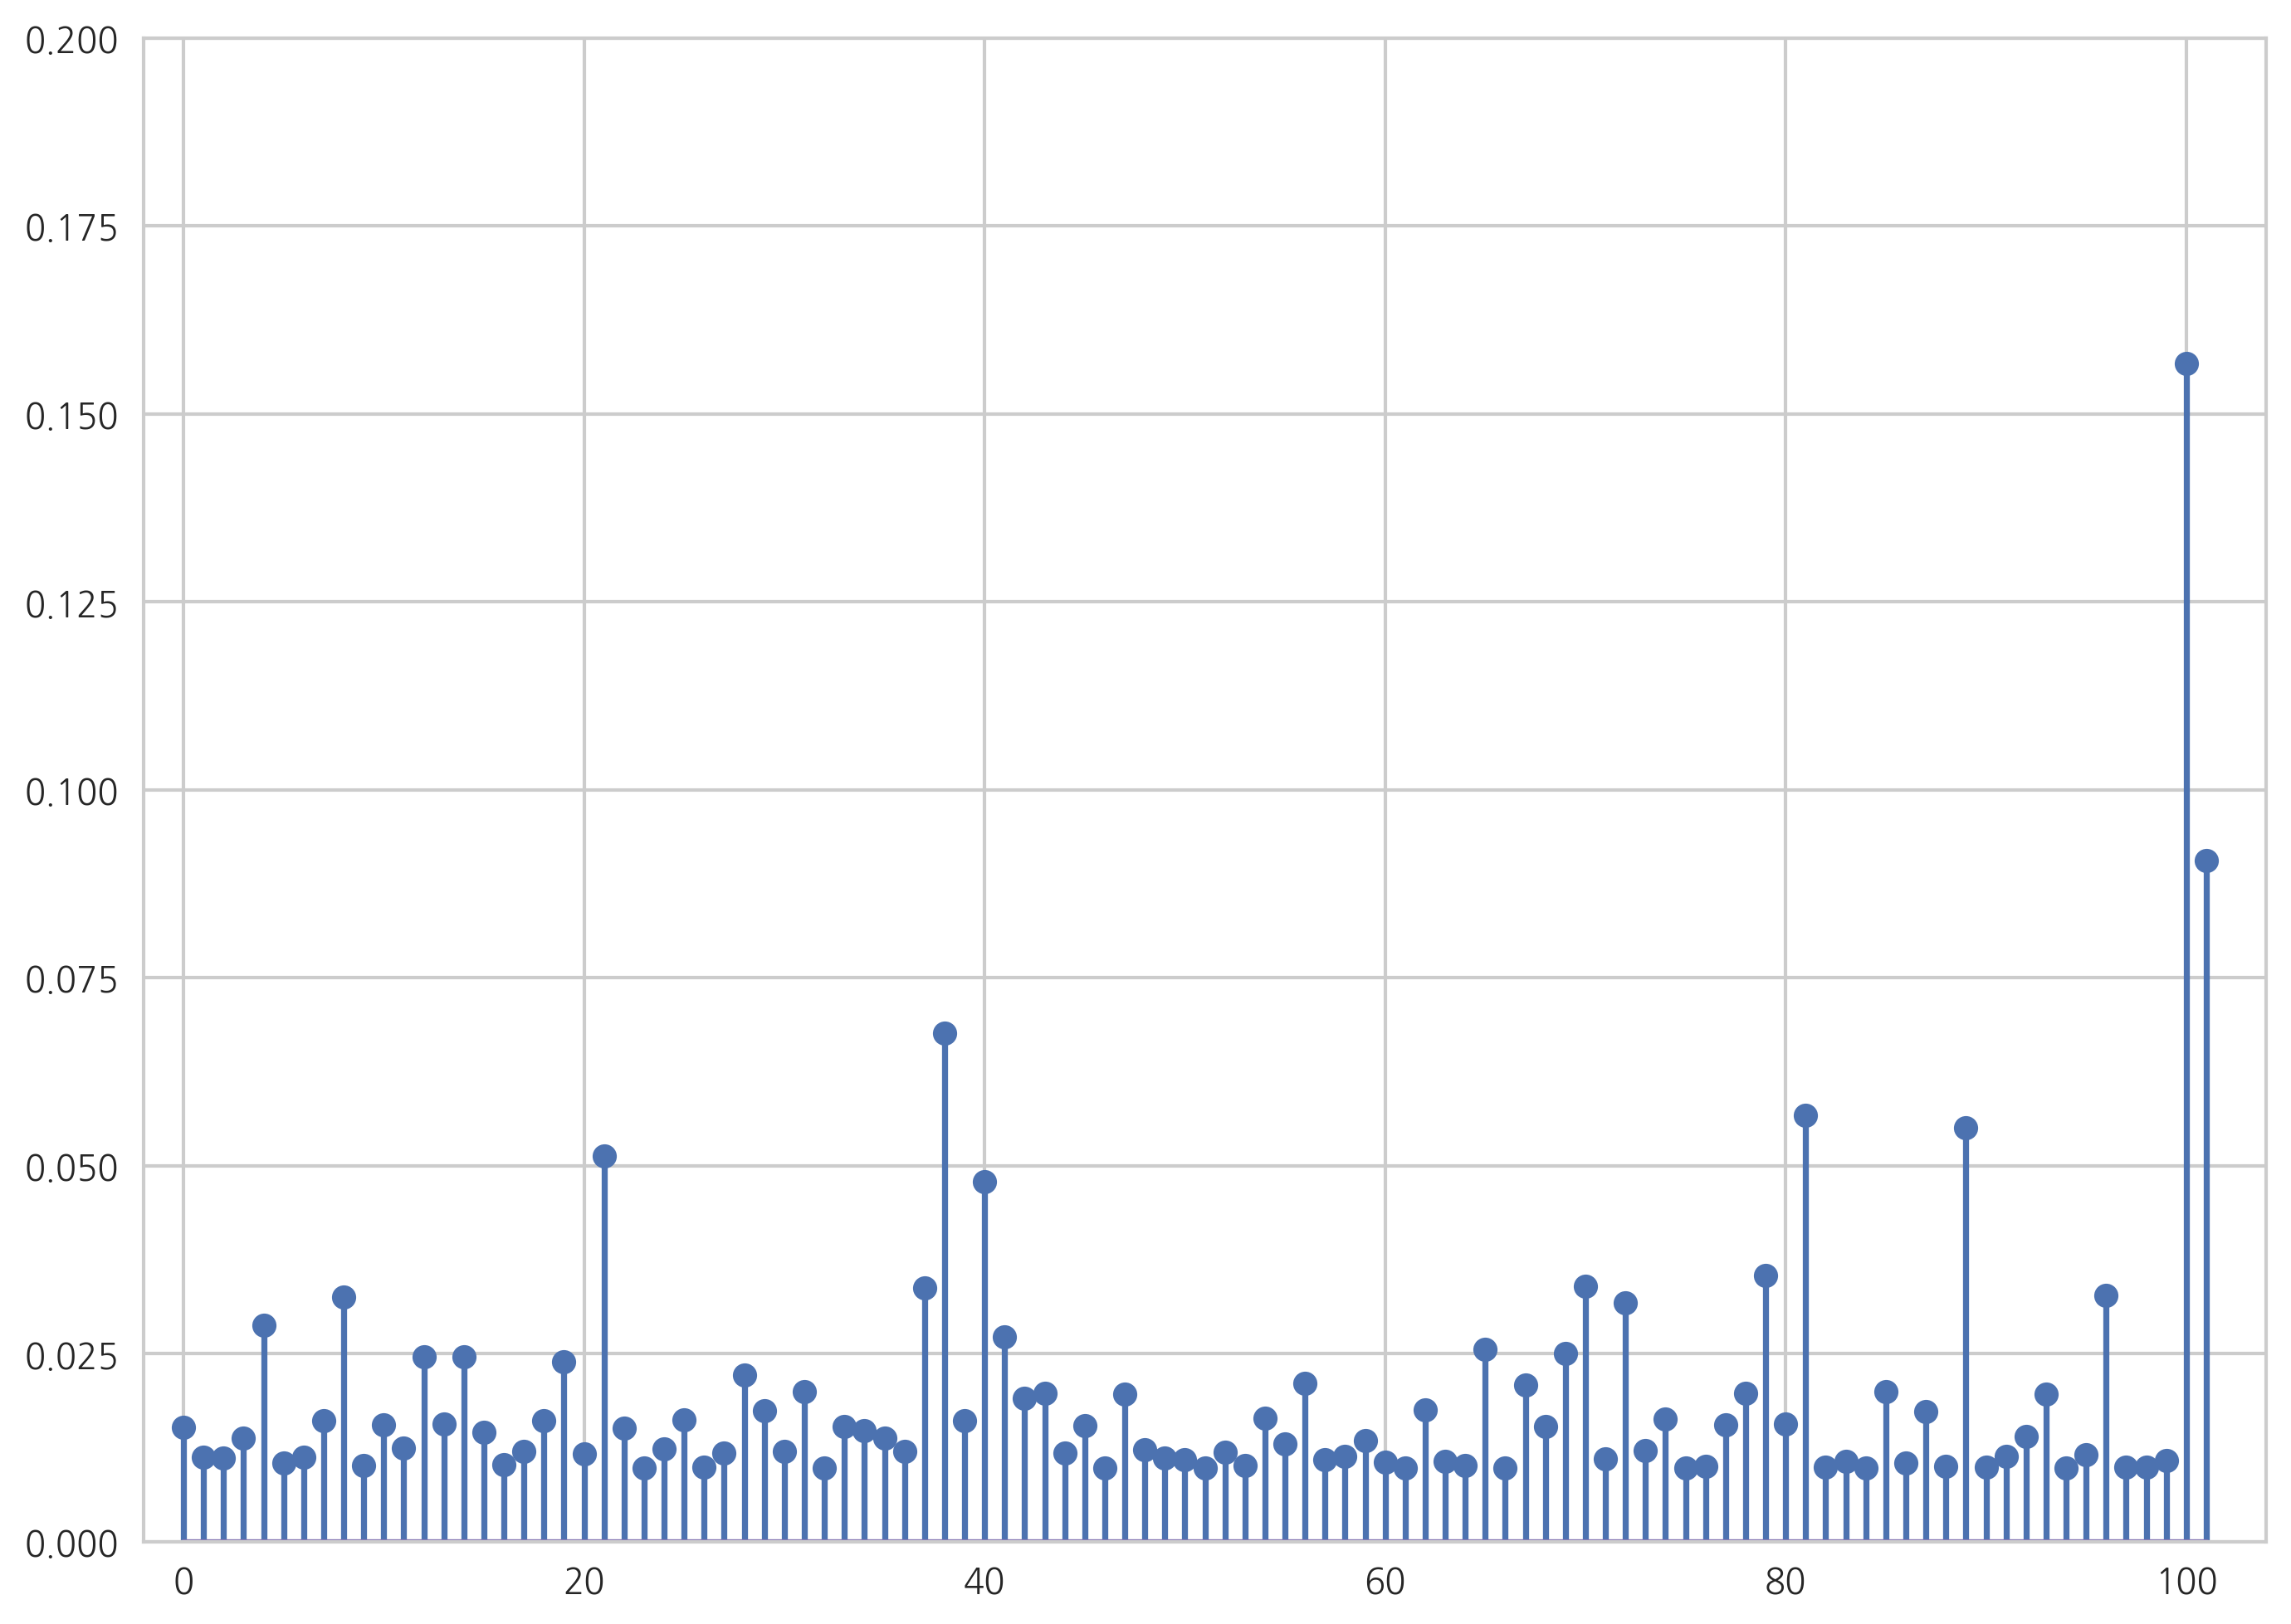

hat.sum() = 2.0


In [31]:
influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([ -2, len(y)+2, 0, 0.2])
plt.show()
print("hat.sum() =", hat.sum())

***

수동으로 추가한 두 개의 데이터를 제외하면 대부분의 데이터는 레버리지 값이 0.02 근처의 낮은 값을 가진다. 레버리지의 합이 2와 같아진다는 것도 다음과 같이 확인할 수 있다.

In [32]:
print("hat.sum() =", hat.sum())

hat.sum() = 2.0


위 결과를 이용하여 레버리지가 큰 데이터만 표시하면 아래와 같다. 여기에서는 레버리지 값이 0.05를 넘는 데이터만 큰 원으로 표시하였다.

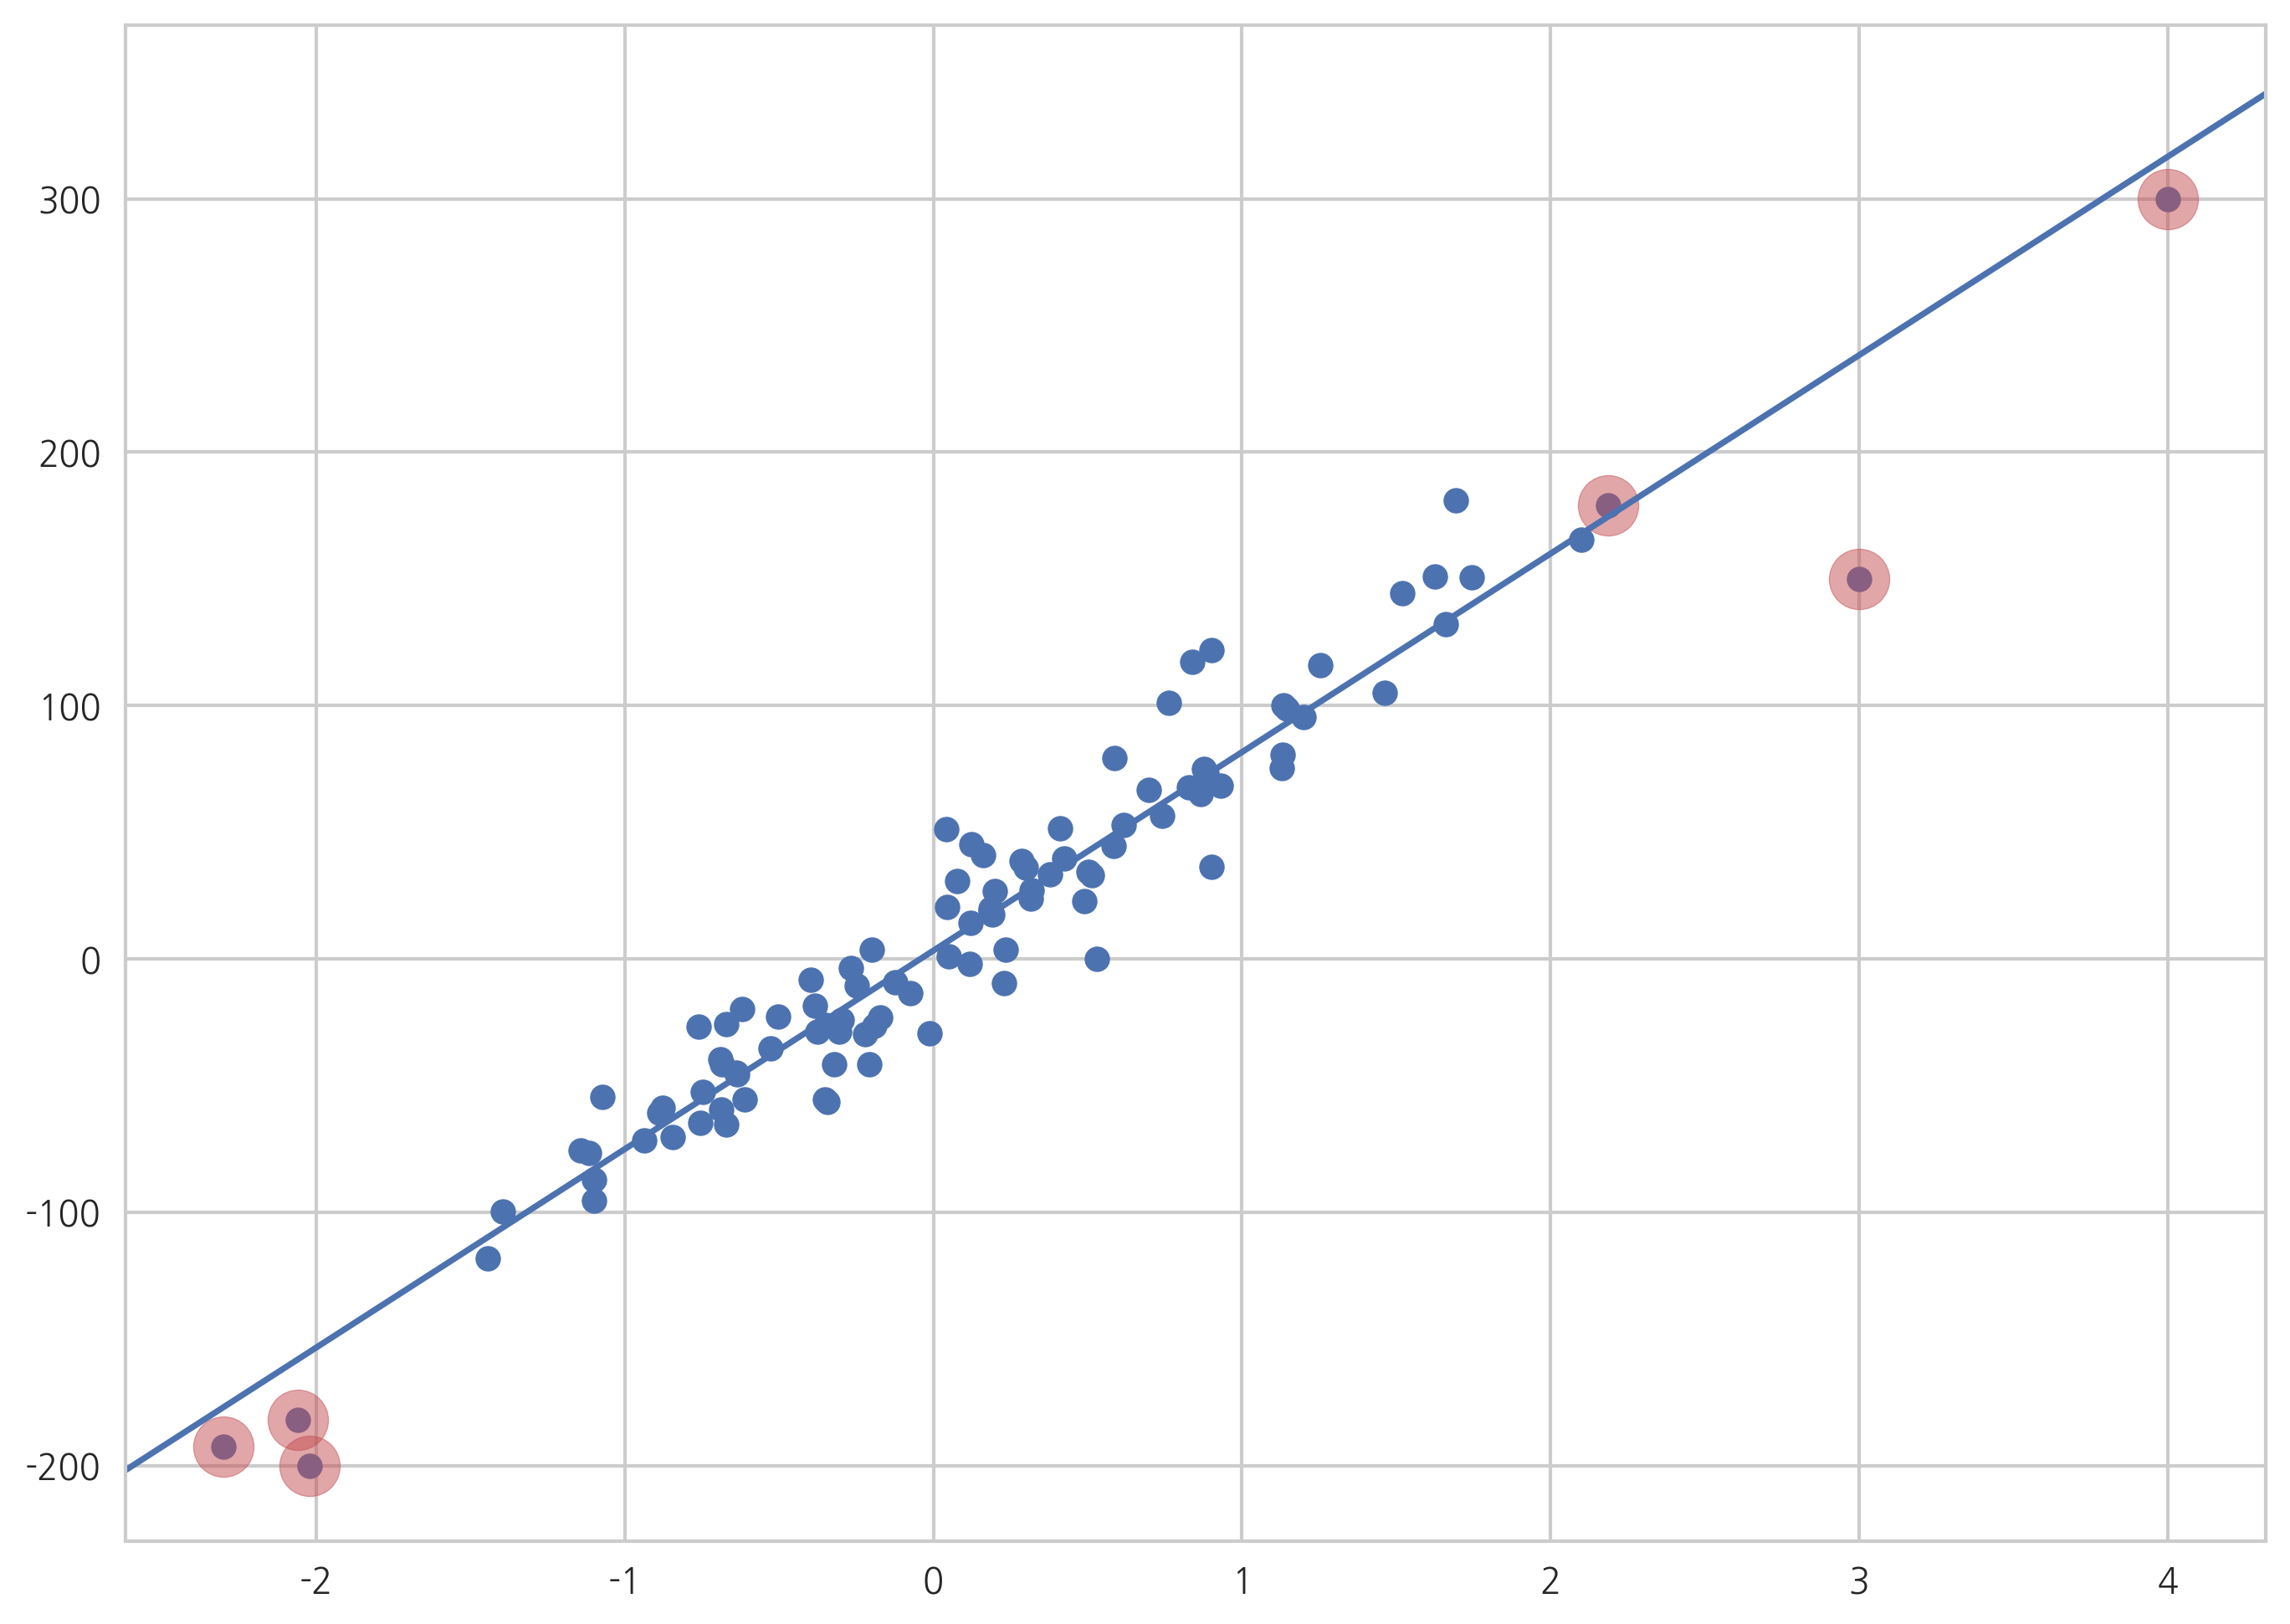

In [33]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()

위 그림에서 데이터가 무리지어 있지 않고 단독으로 존재할수록 레버리지가 커짐을 알 수 있다.

## 레버리지의 영향

레버리지가 큰 데이터가 모형에 주는 영향을 보기 위해 이 데이터가 포함된 경우의 모형과 포함되지 않은 경우의 모형을 아래에 비교하였다. 레버리지가 큰 데이터는 포함되거나 포함되지 않는가에 따라 모형에 주는 영향이 큰 것을 알 수 있다.

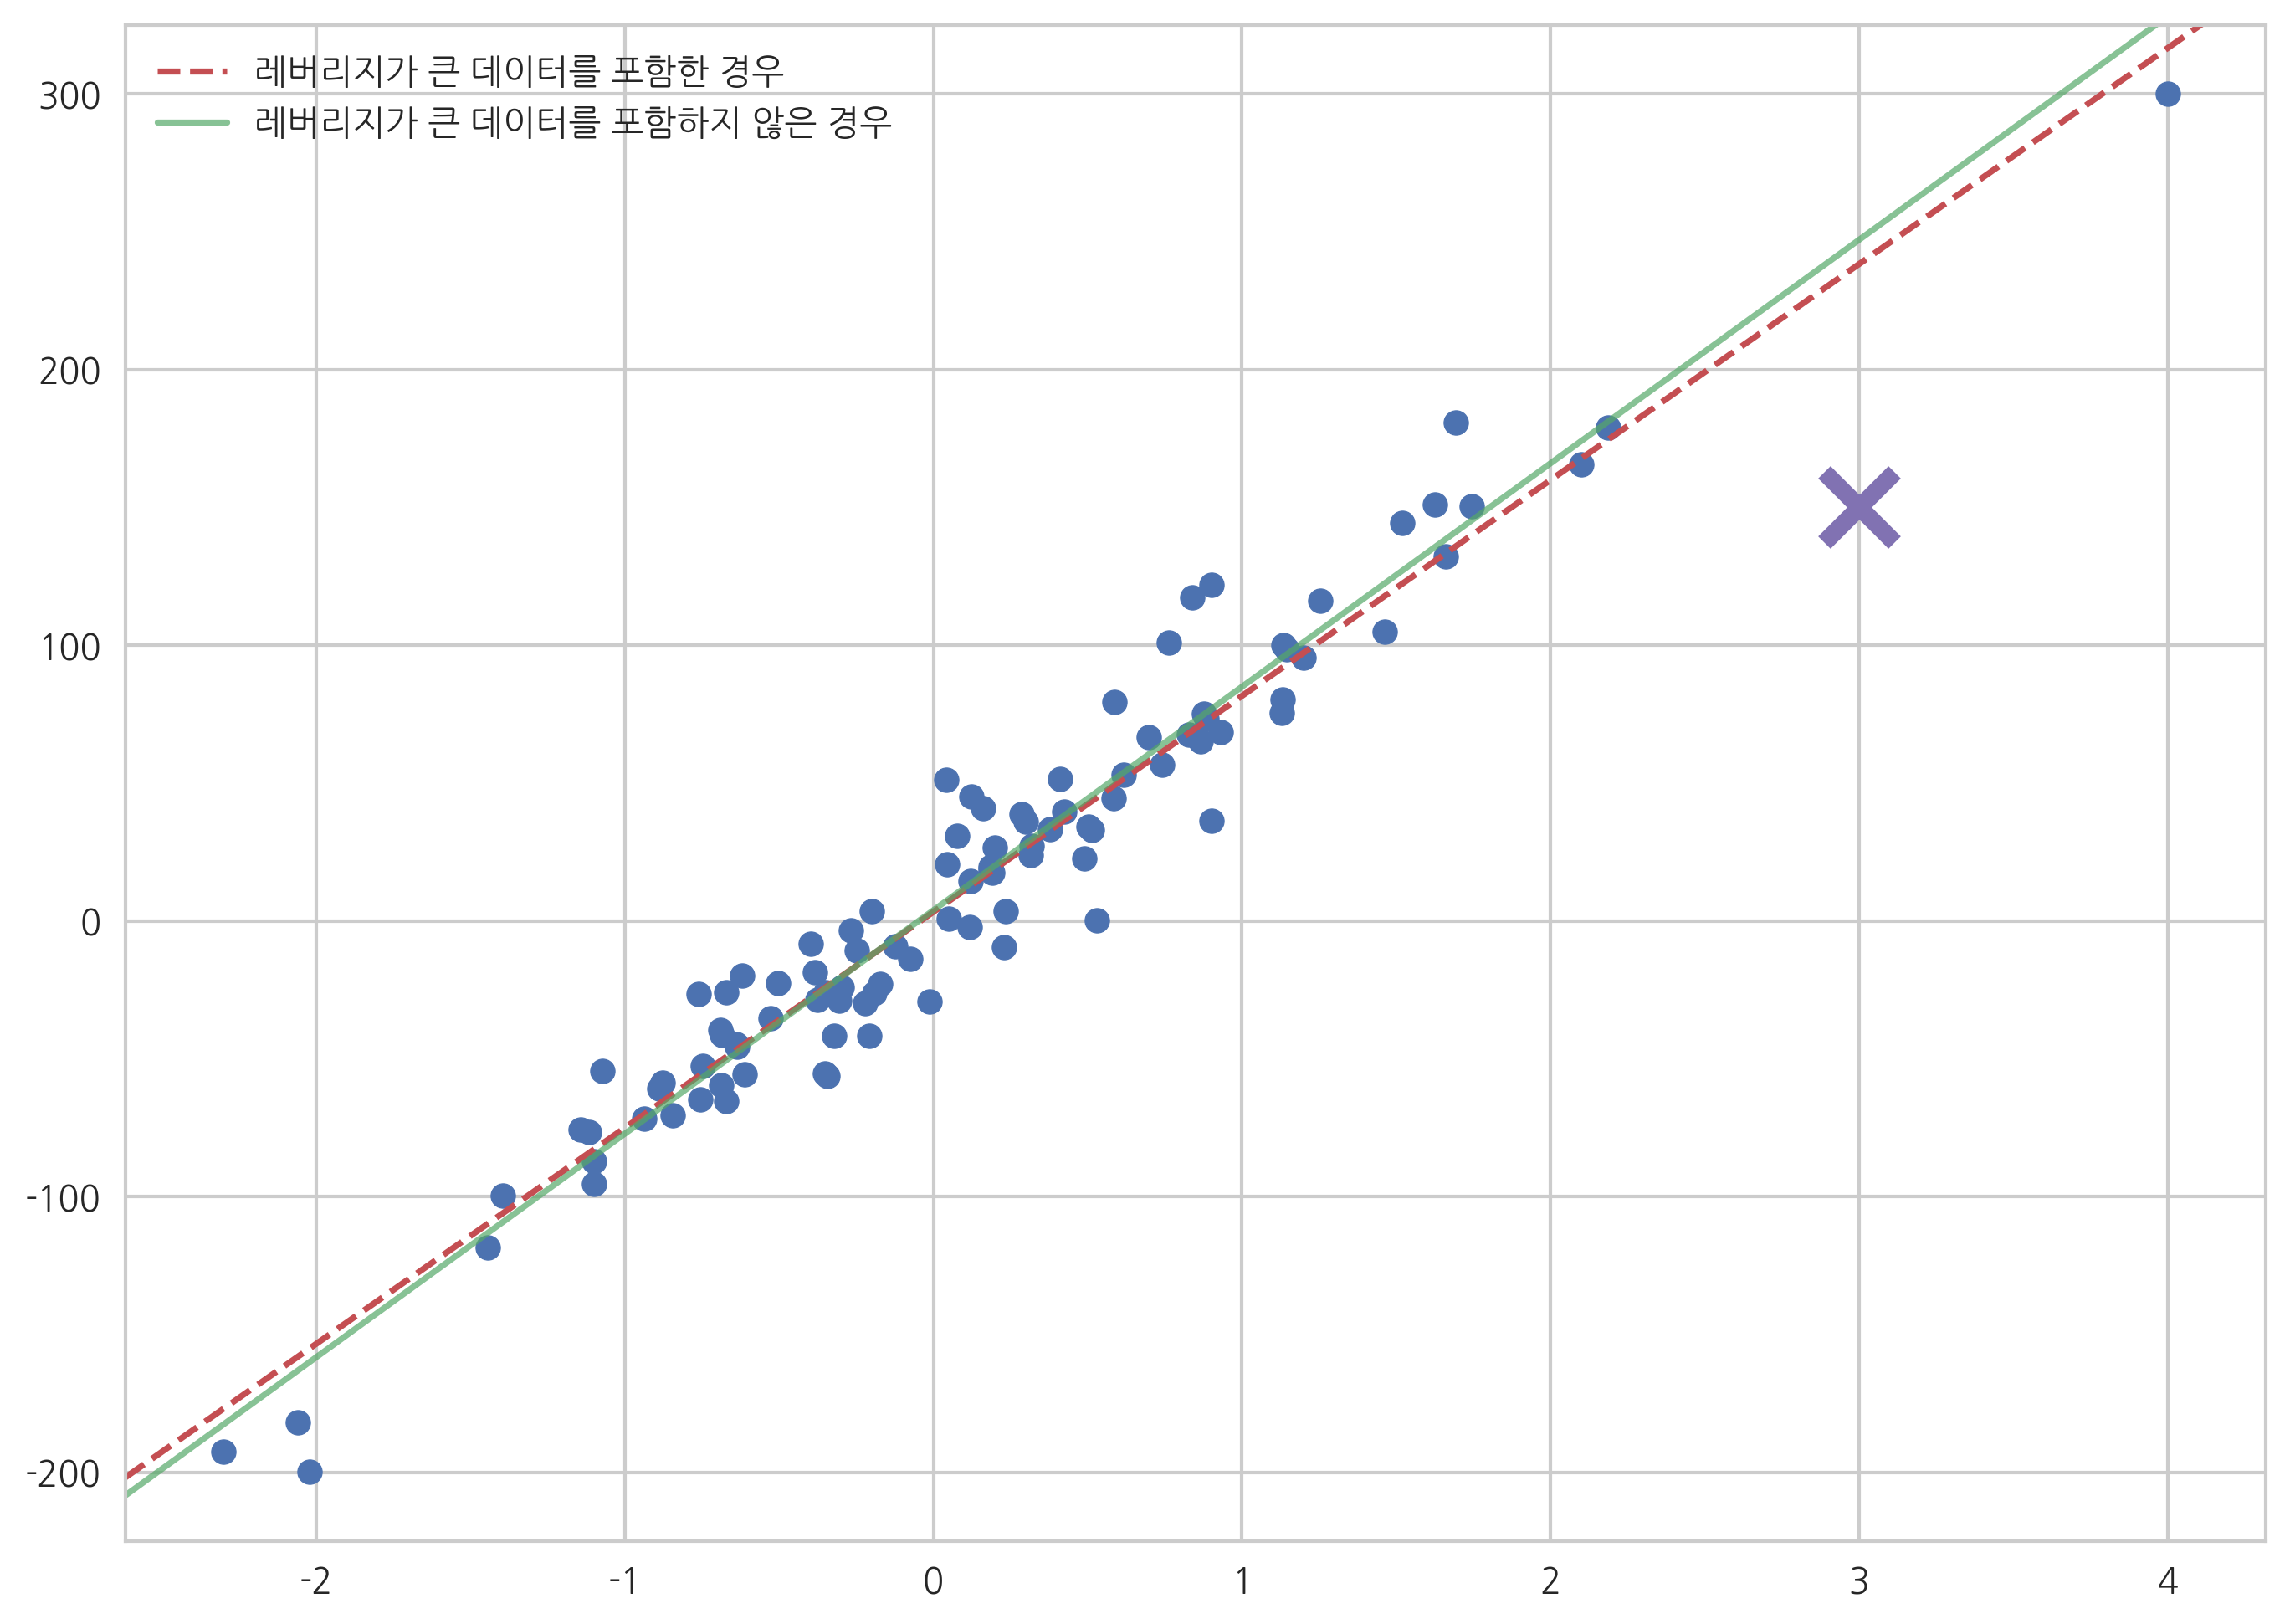

In [34]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result2, c="g", alpha=0.7, ax=ax)

plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 큰 데이터를 포함한 경우", u"레버리지가 큰 데이터를 포함하지 않은 경우"], loc="upper left")
plt.show()

반대로 레버리지가 작은 데이터는 포함되거나 포함되지 않거나 모형이 별로 달라지지 않는 것을 알 수 있다.

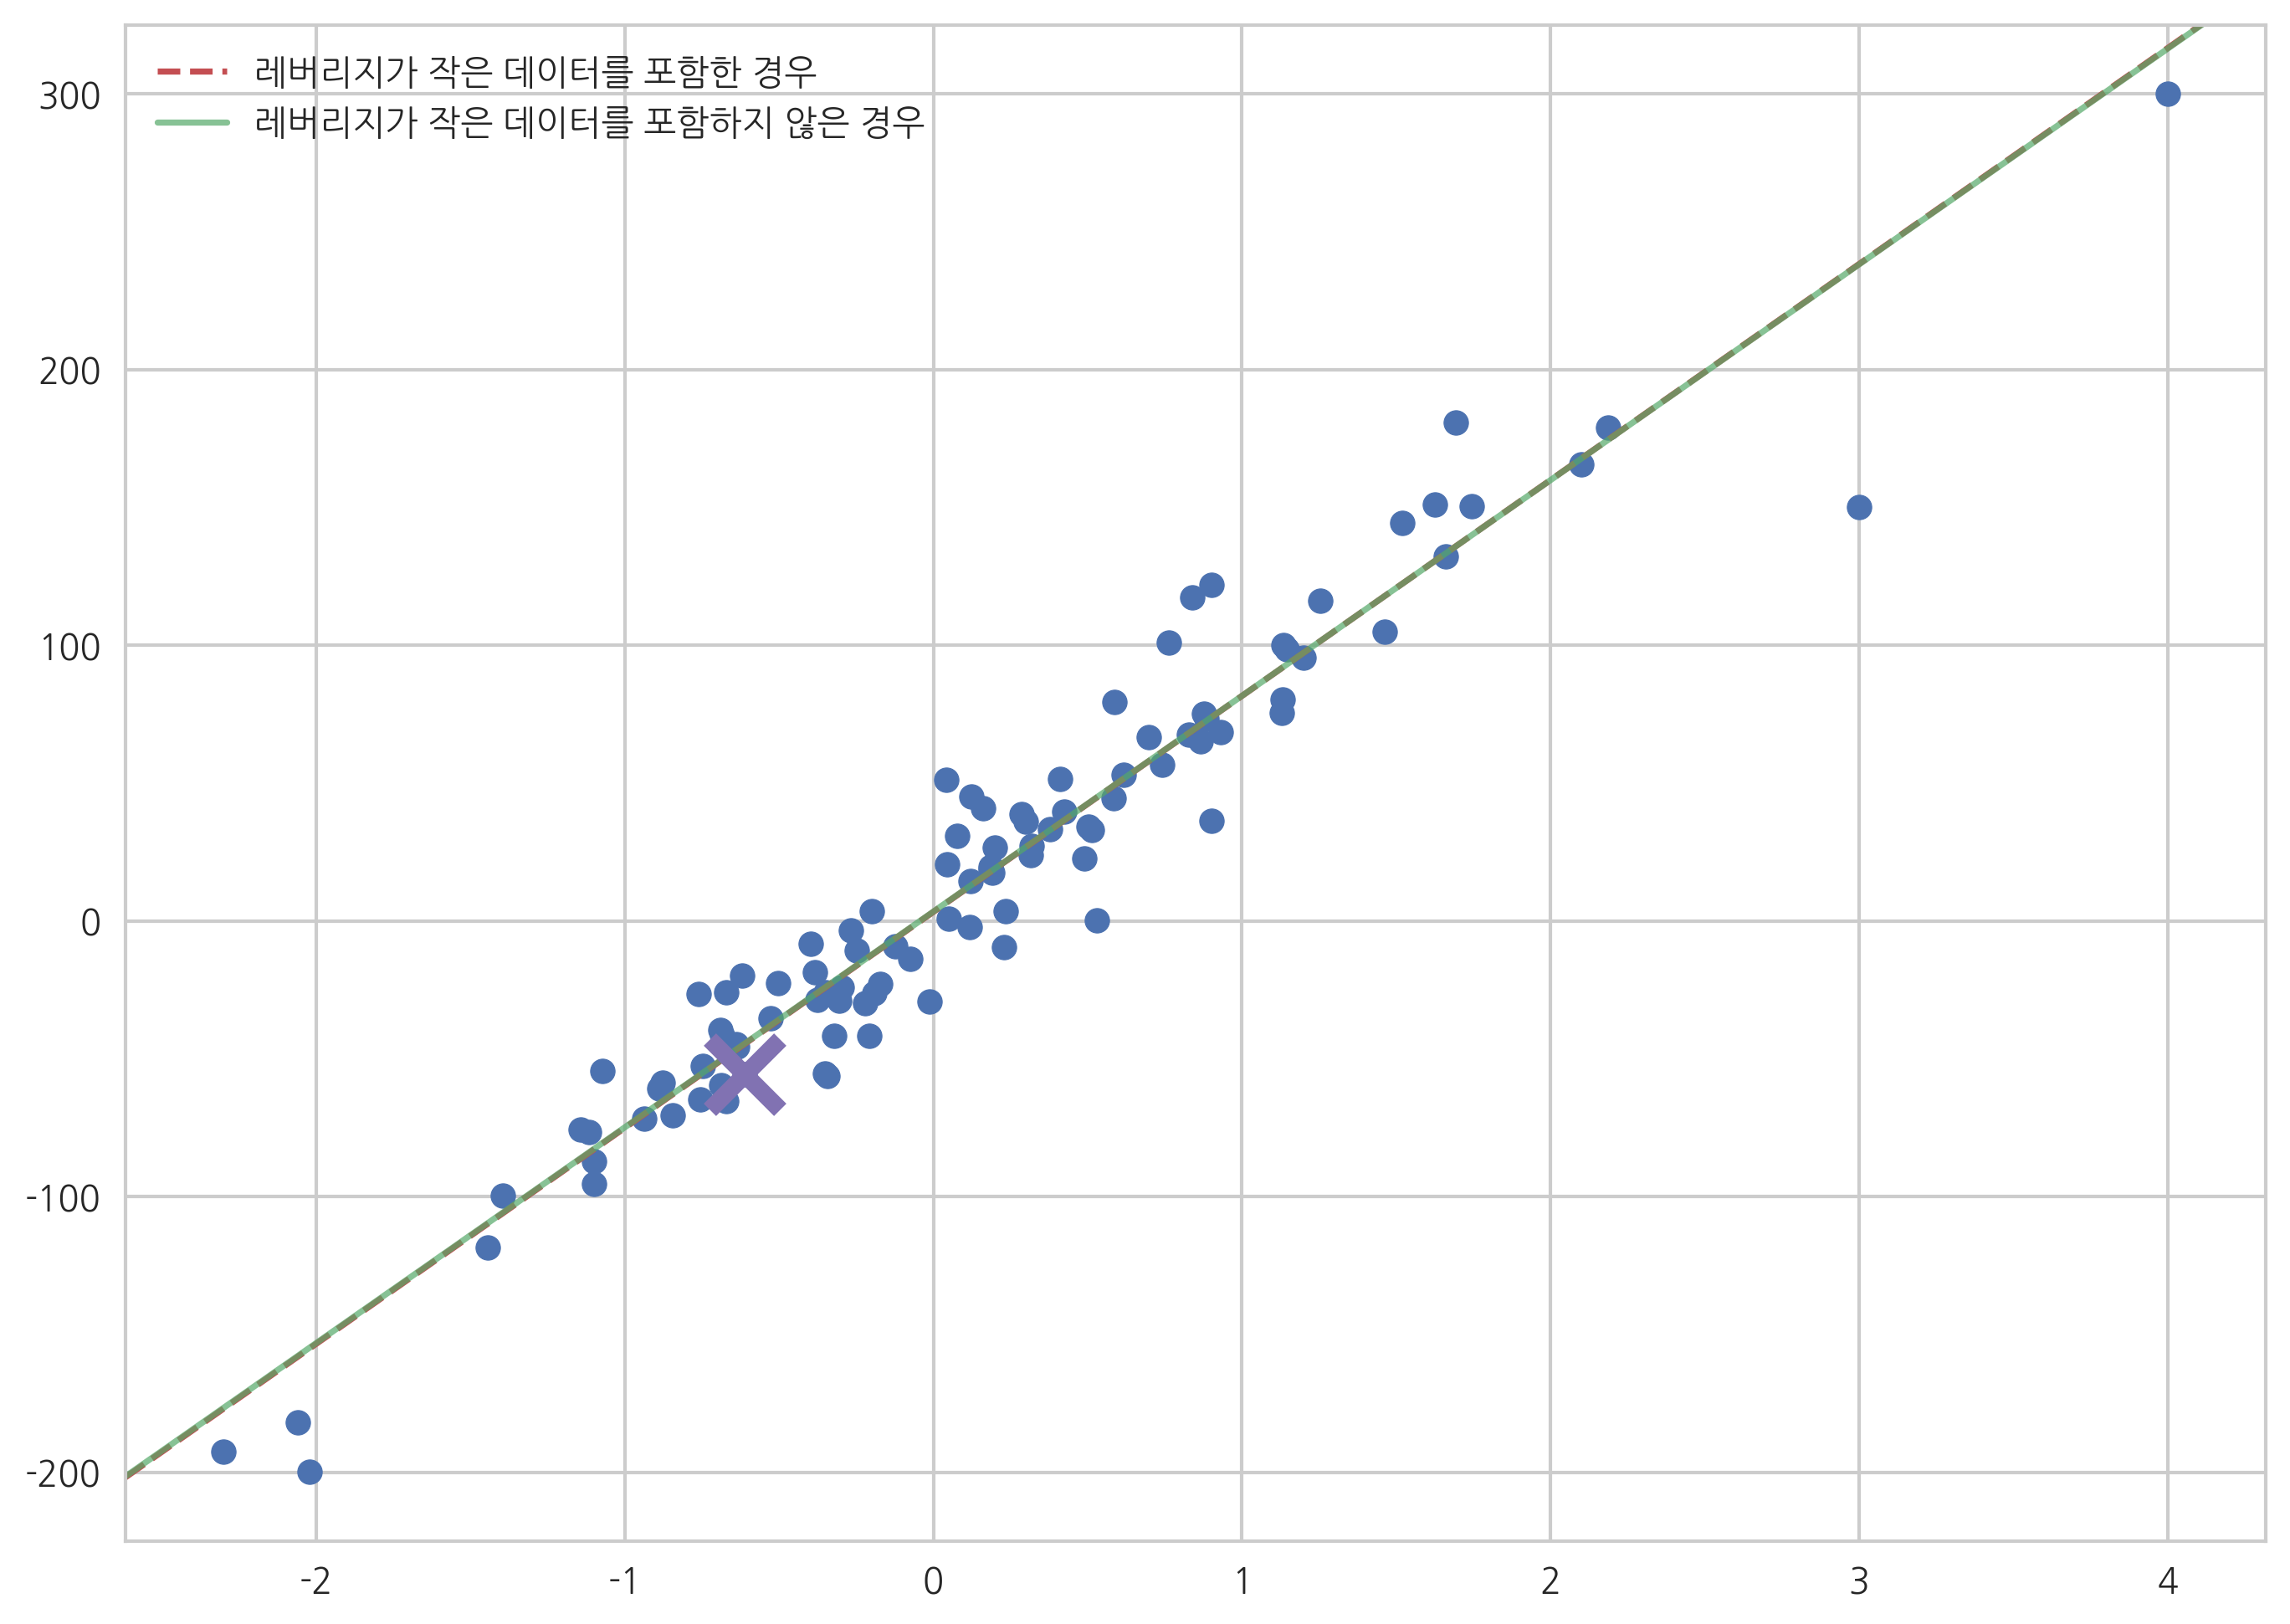

In [35]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result3, c="g", alpha=0.7, ax=ax)

plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 작은 데이터를 포함한 경우", u"레버리지가 작은 데이터를 포함하지 않은 경우"], loc="upper left")
plt.show()

## 아웃라이어(Outlier)

***
내가 만든 모델에 일치하냐 안하냐의 판단 기준
***

모형에서 설명하고 있는 데이터와 동떨어진 값을 가지는 데이터를 **아웃라이어(outlier)**라고 한다.

회귀 분석에는 잔차의 크기가 큰 데이터가 아웃라이어가 되는데 이 중에서도 주로 관심을 가지는 것은 레버리지와 잔차의 크기가 모두 큰 데이터들이다.

아래에서는 각 데이터의 잔차를 표시하였다. 잔차는 `RegressionResult` 객체의 `resid` 속성에 들어있다.

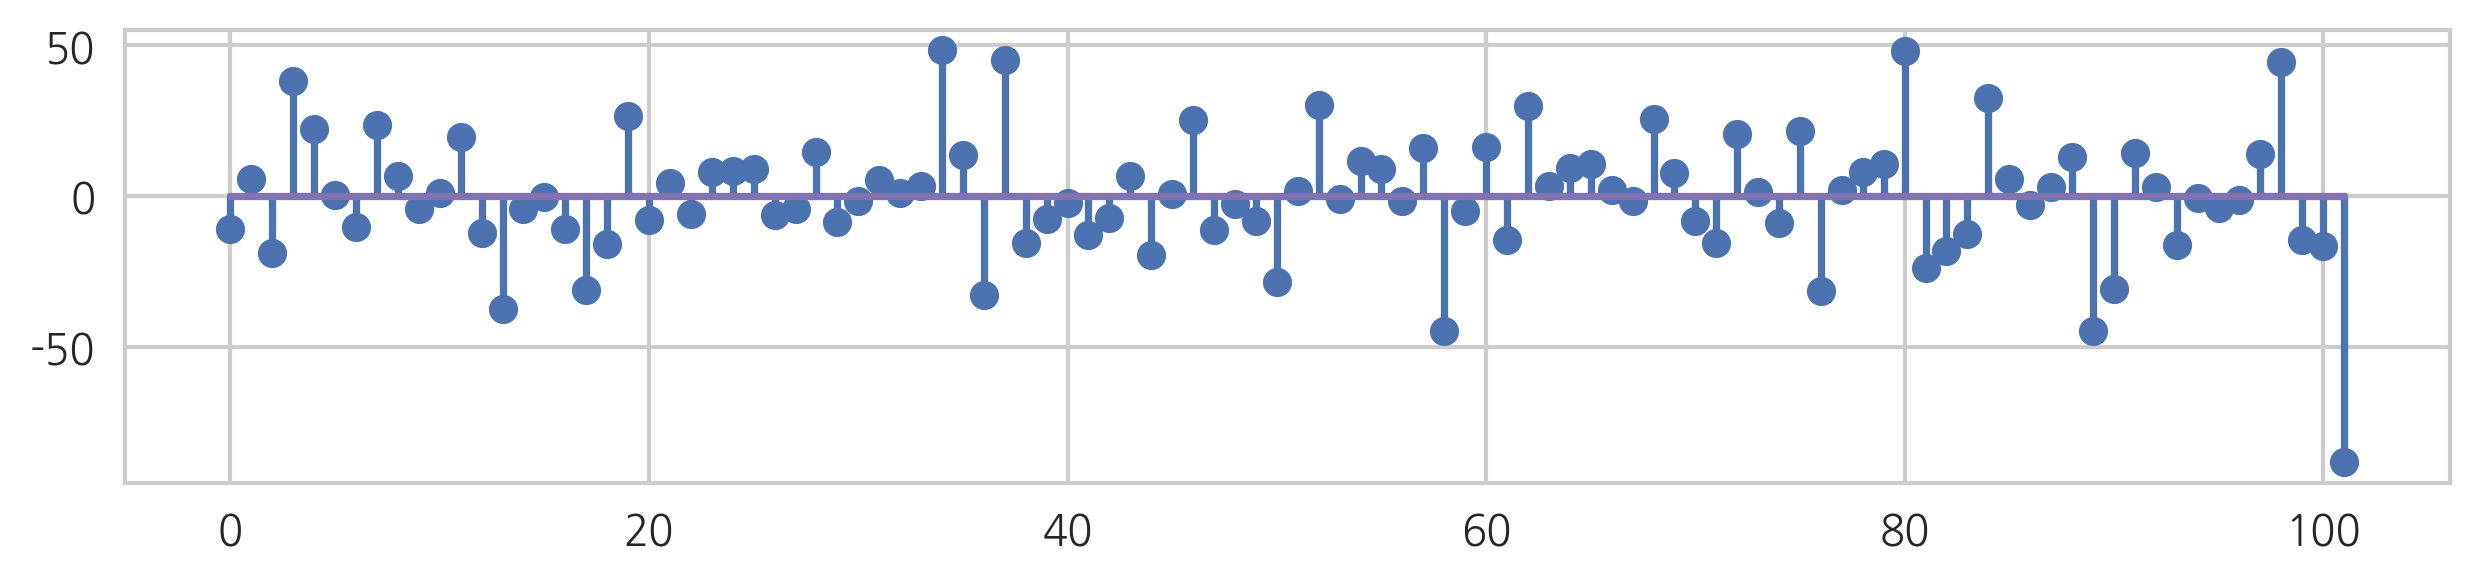

In [36]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.show()

모든 데이터의 레버리지와 잔차를 동시에 보려면 `plot_leverage_resid2` 명령을 사용한다. 이 명령은 x축으로 (정규화된) 잔차의 제곱을 표시하고 y축으로 레버리지값을 표시한다. 데이터 아이디가 표시된 데이터들이 아웃라이어이다.

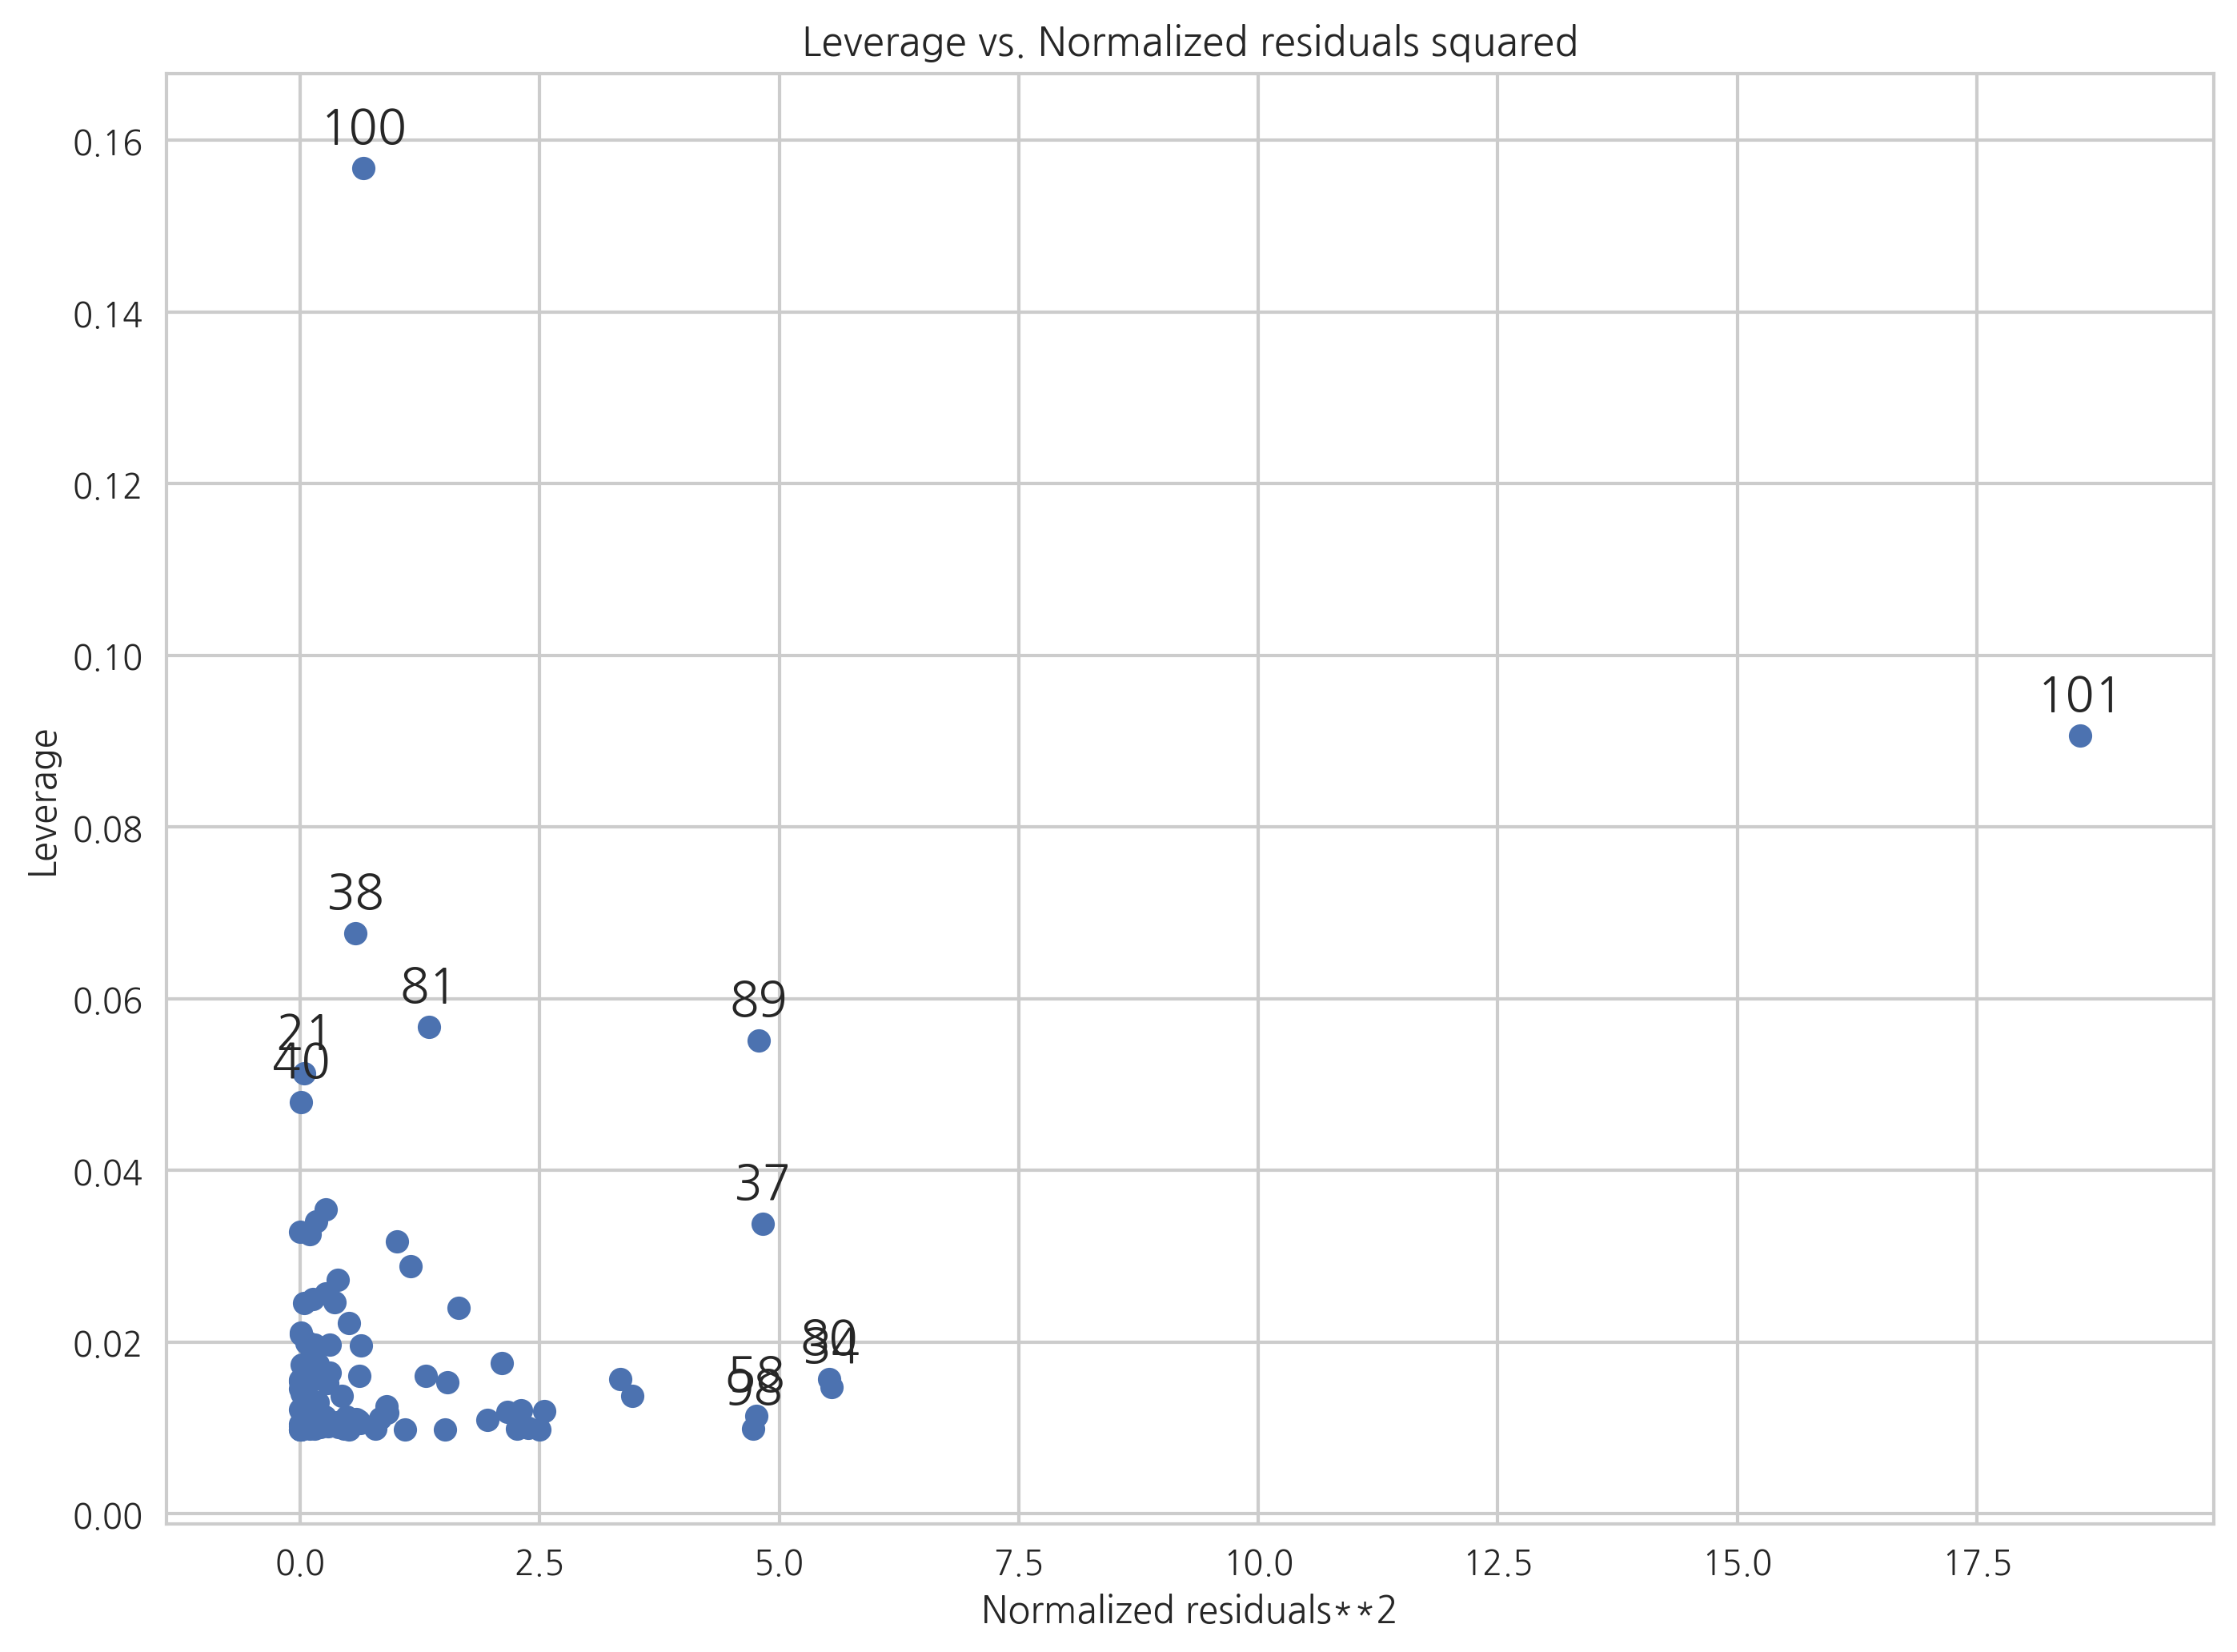

In [37]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

잔차와 레버리지를 동시에 보기위한 기준으로는 Cook's Distance가 있다.  다음과 같이 정의되는 값으로 레버리지가 커지거나 잔차의 크기가 커지면 Cook's Distance 값이 커진다.

$$ D_i = \frac{e_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right] $$

Fox' Outlier Recommendation 은 Cook's Distance가 다음과 같은 기준값보다 클 때 아웃라이어로 판단하자는 것이다.

$$ D_i > \dfrac{4}{N − K - 1} $$

`influence_plot` 명령을 사용하면 Cook's distance를 버블 크기로 표시한다.

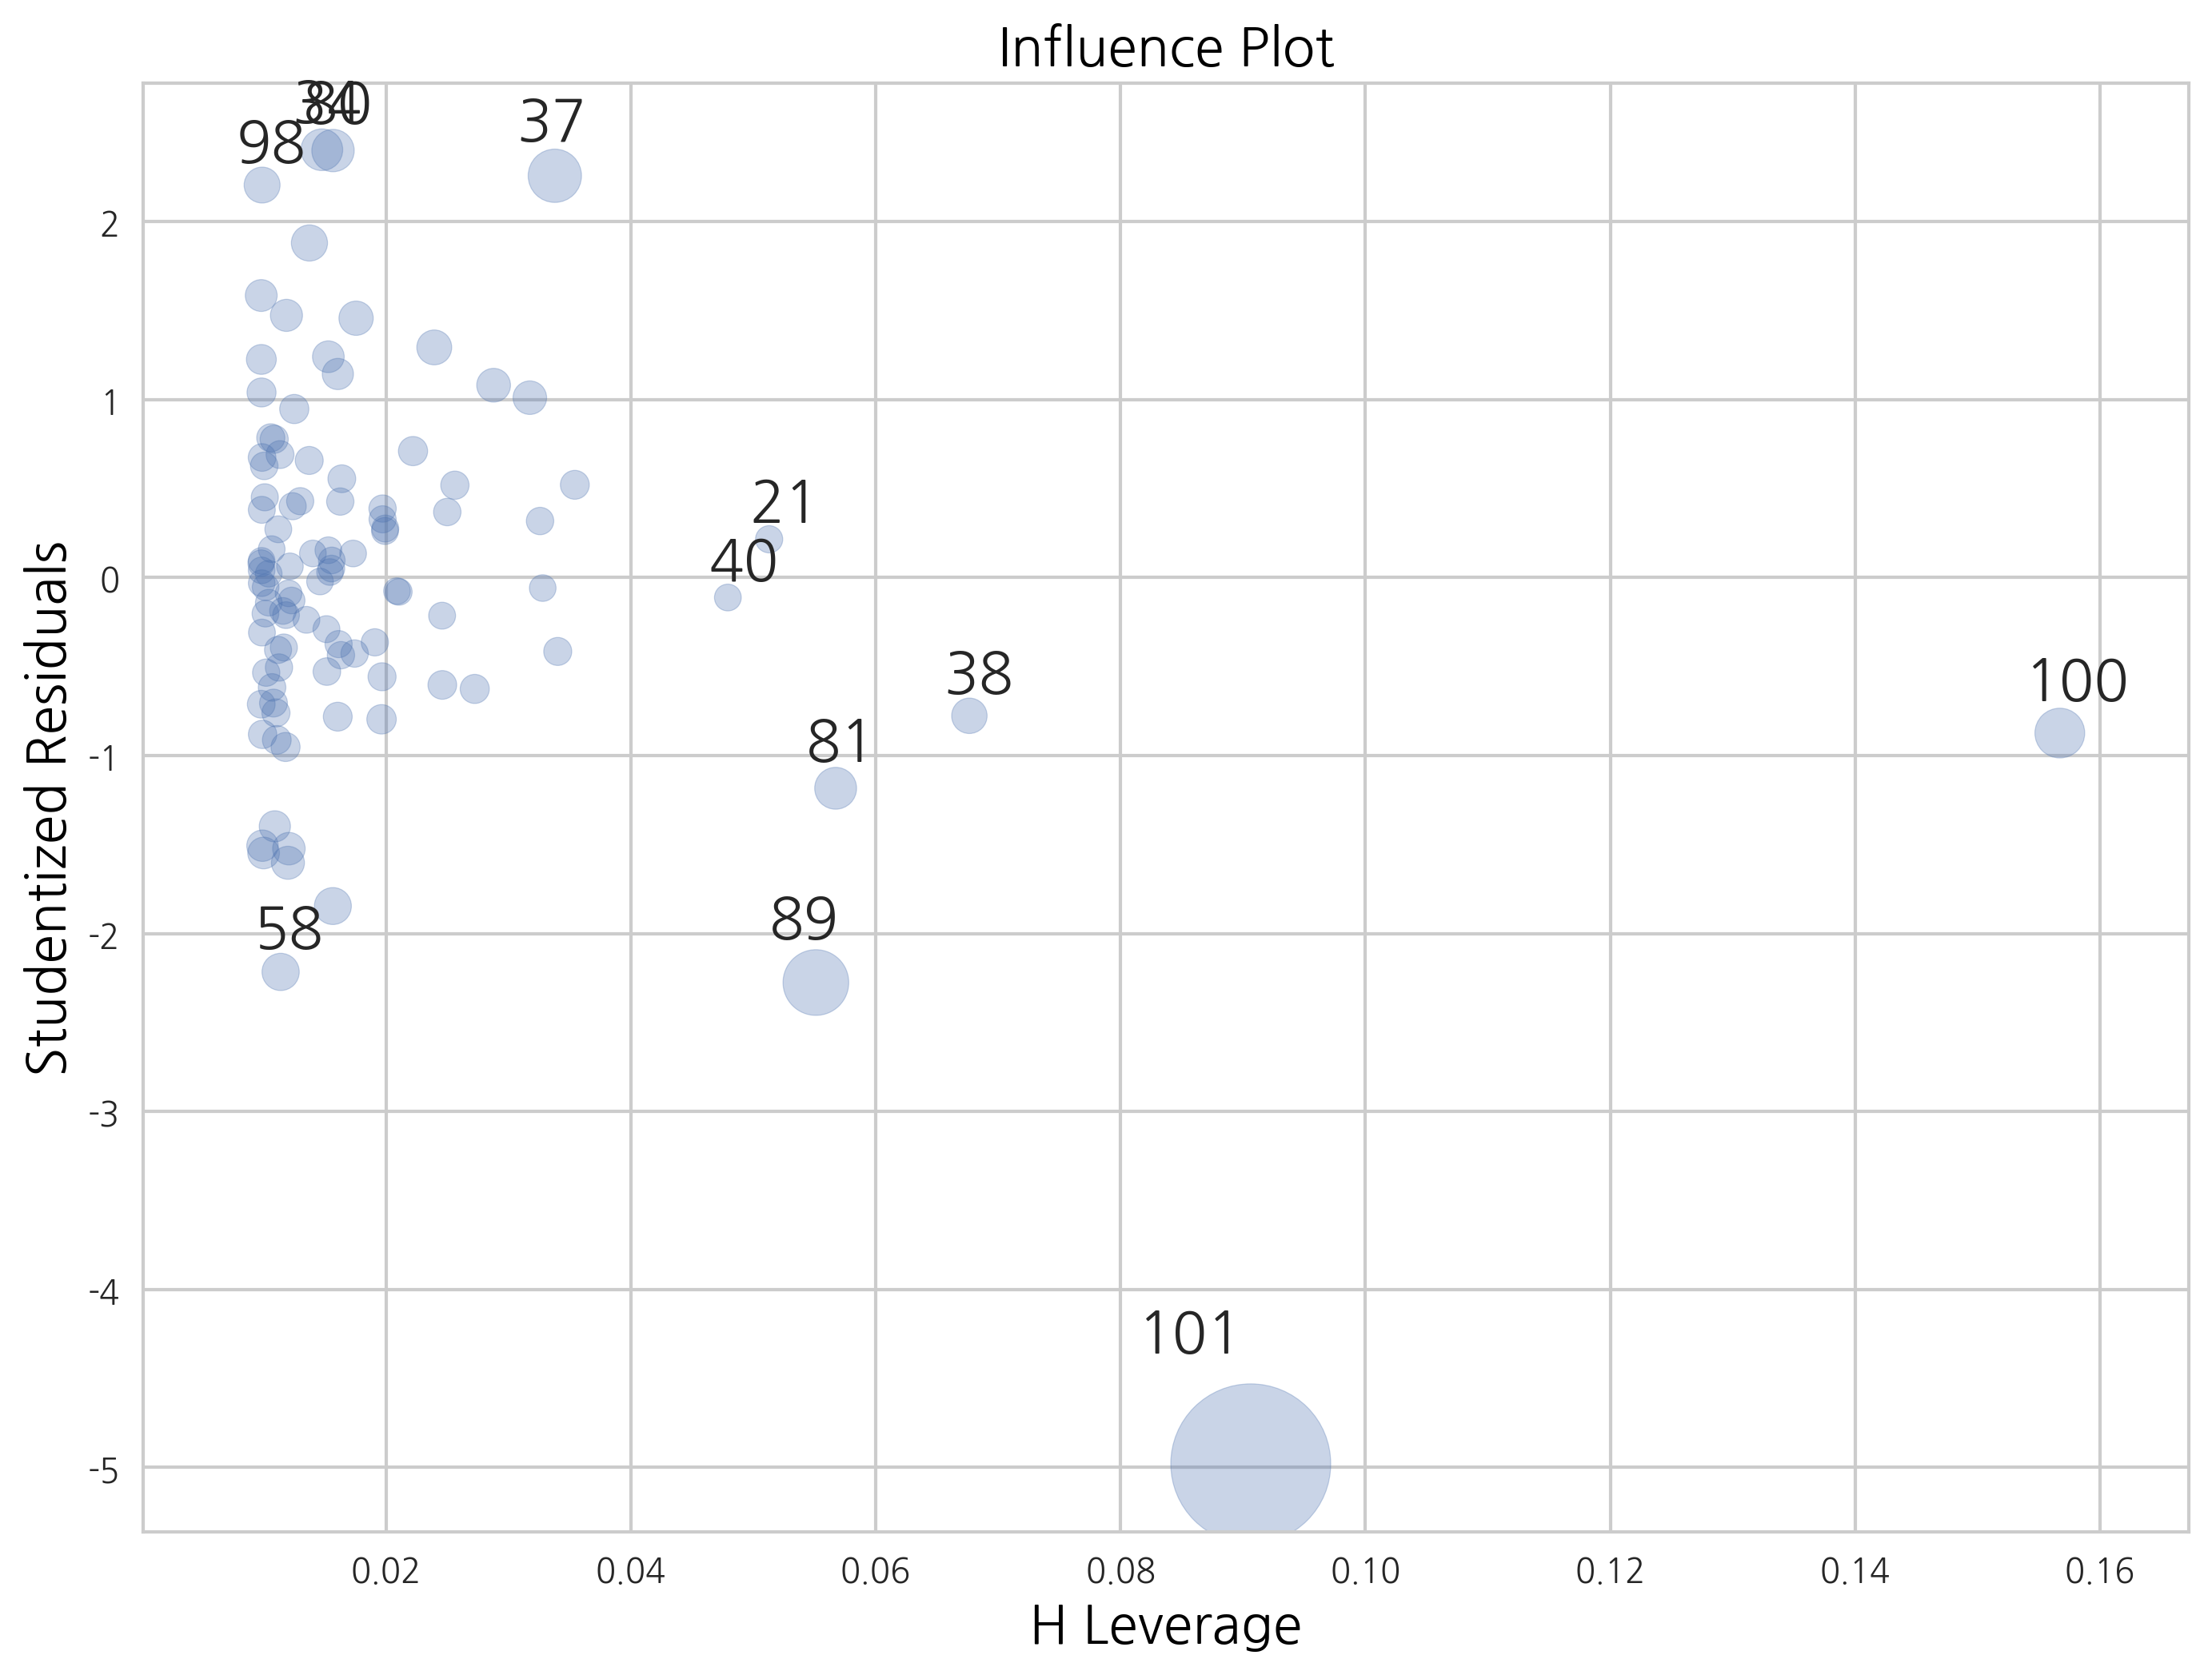

In [38]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

다음 그림은 위에서 사용한 데이터에서 Fox recommentation 기준으로 아웃라이어를 선택한 결과이다.

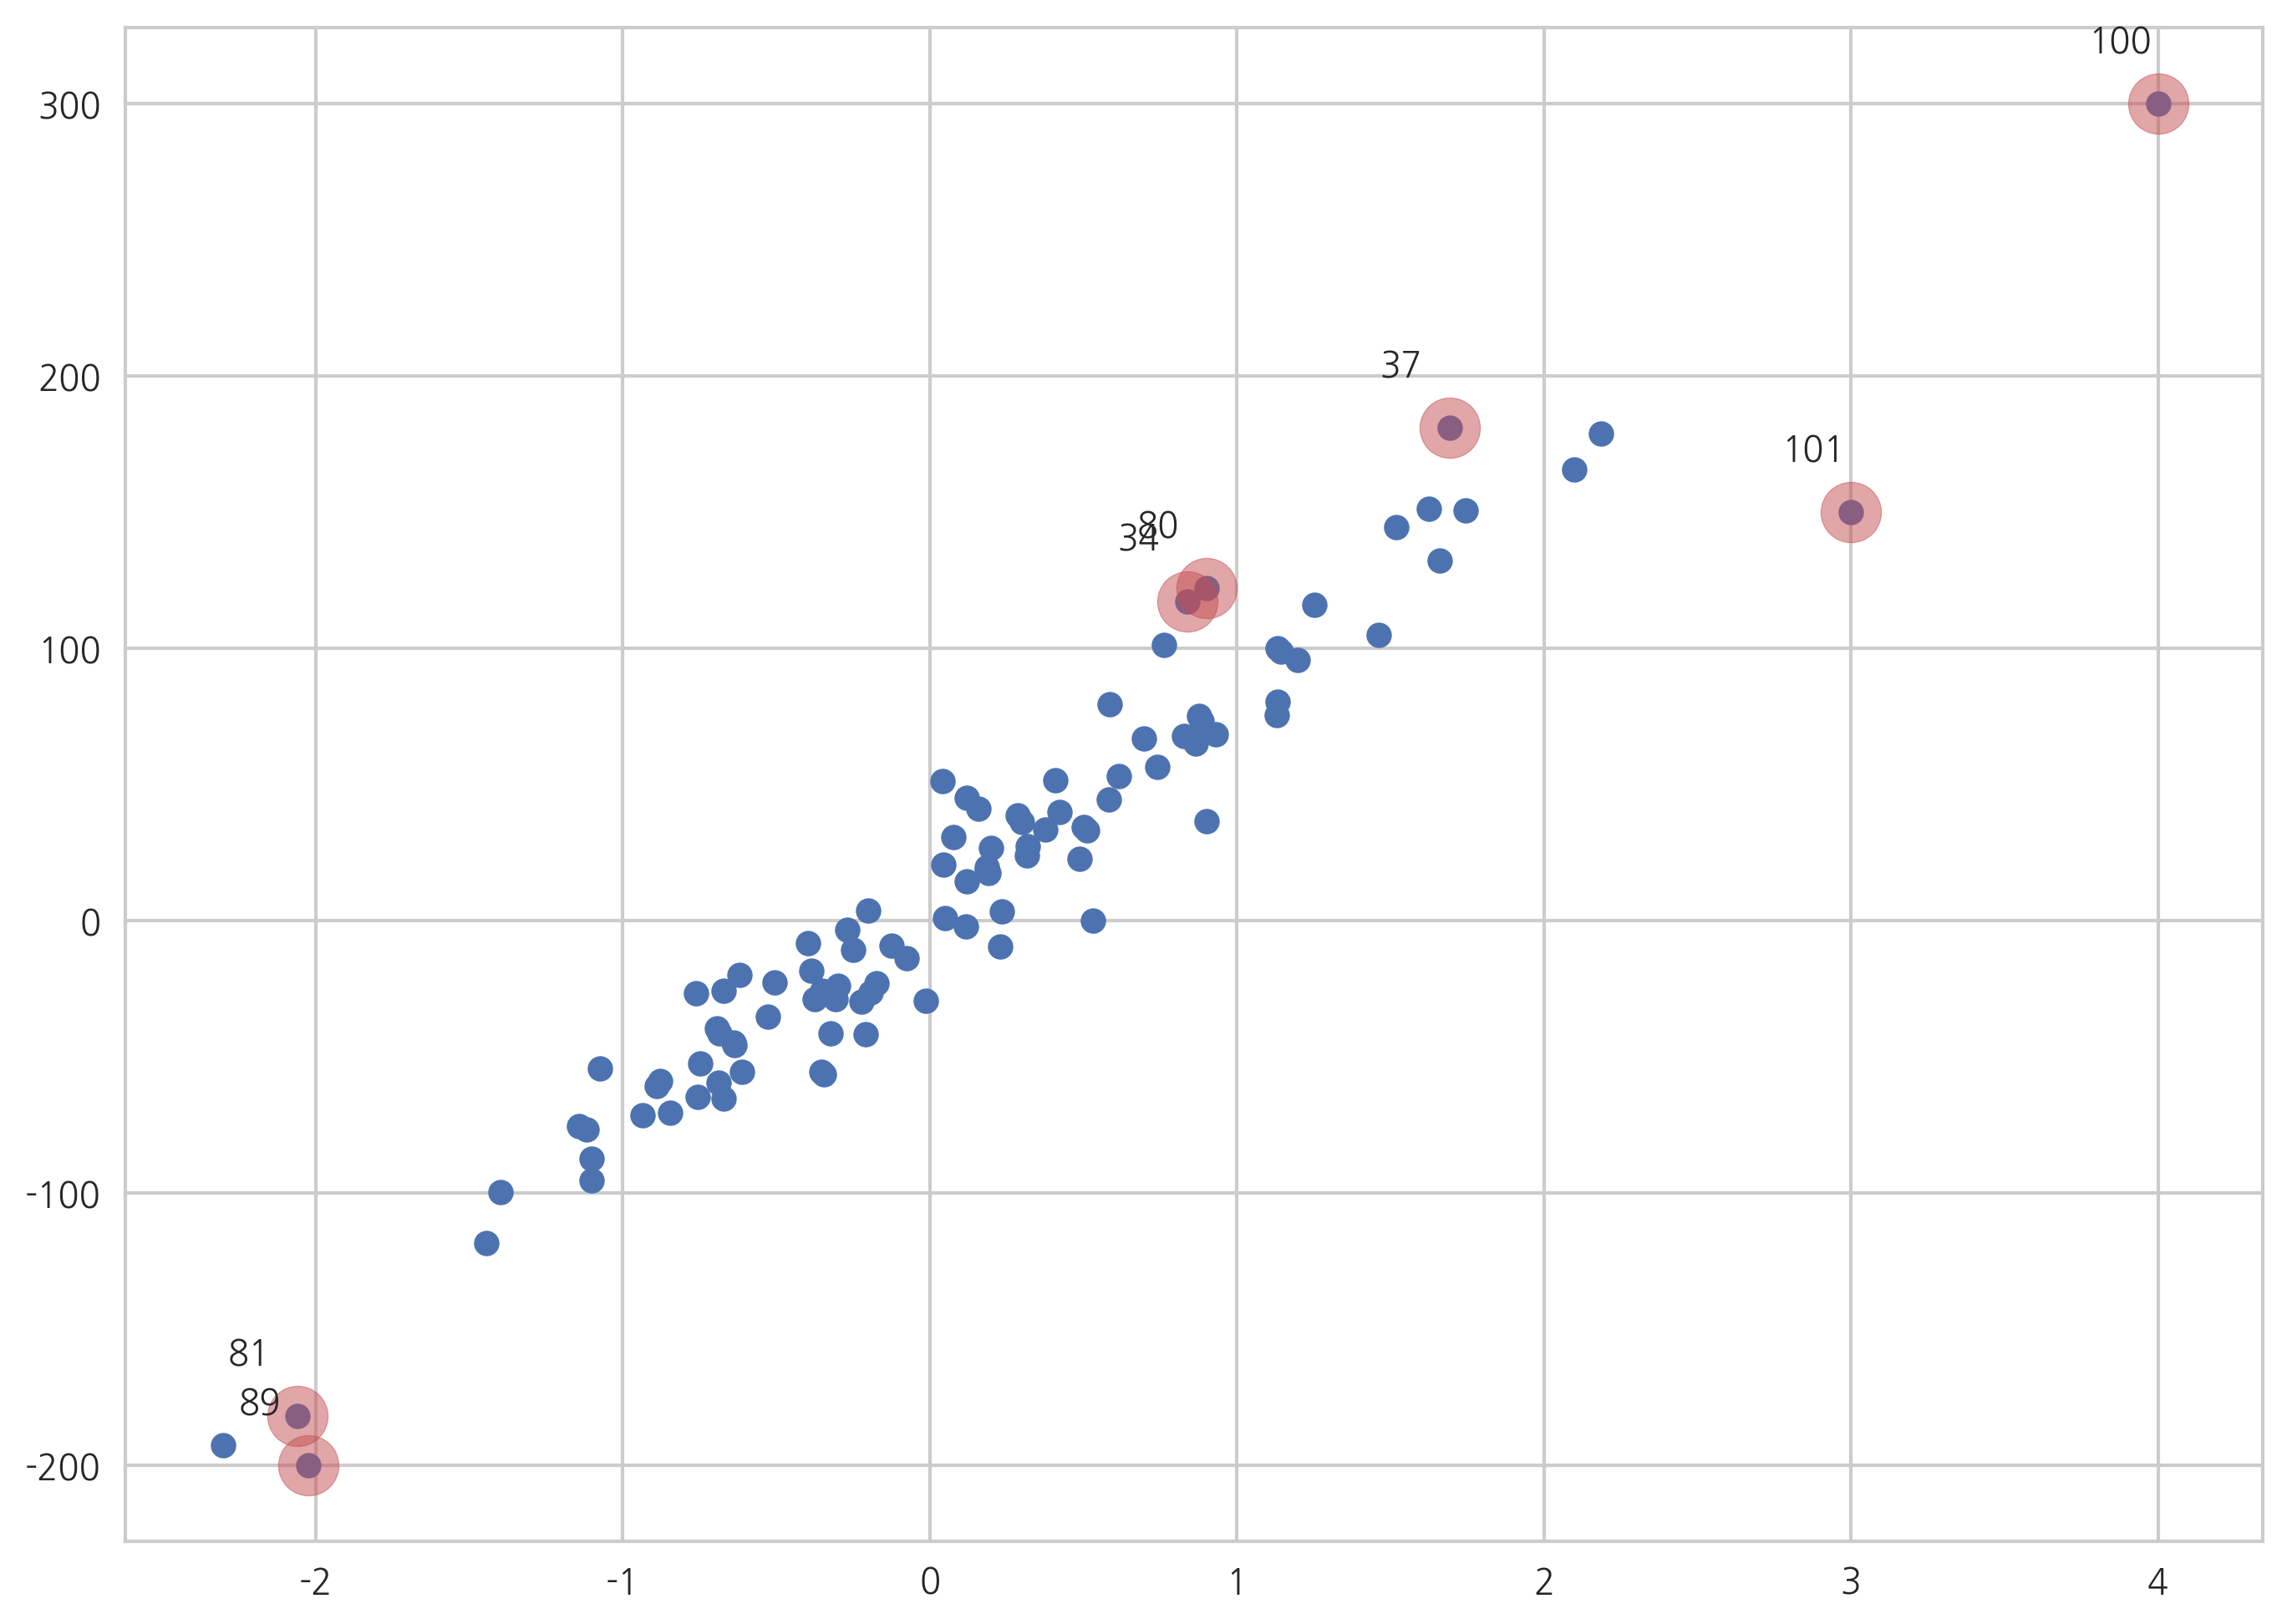

In [39]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, zip(X0[idx], y[idx]), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()

# 확률론적 선형 회귀 모형

OLS(Ordinary Least Square) 방법을 사용하면 데이터에 대한 확률론적인 가정없이도 최적의 가중치를 계산할 수 있다. 그러나 이 경우에는 계산한 가중치가 어느 정도의 신뢰도 또는 안정성을 가지는지 확인할 수 있는 방법이 없다. 이를 확인하고자 하는 시도 중의 하나가 부트스트래핑(bootstrapping) 방법이다.

## 부트스트래핑

부트스트래핑(bootstrapping)은 회귀 분석에 사용한 데이터가 달라진다면 회귀 분석의 결과는 어느 정도 영향을 받는지를 알기 위한 방법이다. 

데이터가 확률 변수로부터 생성된 표본이거나 혹은 더 큰 모집단 중에서 선택한 표본이라고 가정한다면 회귀 분석의 결과는 분석에 사용한 표본에 의존적임을 알 수 있다. 만약 추가적인 다른 표본을 얻어서 다시 회귀 분석에 사용한다면 회귀 분석 결과 즉, 가중치 벡터의 값은 달라질 것이다.

그러나 현실적으로는 데이터를 추가적으로 얻기가 힘들기 때문에 부트스트래핑 방법에서는 기존의 데이터를 재표본화(re-sampling)하는 방법을 선택한다. 재표본화는 기존의 $D$개의 데이터에서 다시 $D$개의 데이터를 선택하되 중복 선택도 가능하게 한다. (resampling with replacement) 이 경우 이론적으로는 $O(2^D)$ 수준의 새로운 표본 집단을 얻을 수 있다.

직접 부트스트래핑을 실시해 보자. 우선 100개의 가상 데이터를 생성하여 이를 기반으로 회귀 분석을 실시한다.

In [40]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=0)

dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.params)

const    -1.628364
X1       42.853356
dtype: float64


다음으로 이 데이터에서 중복을 허락하여 N개의 데이터를 선택한 후 다시 회귀 분석을 한다. 이론적으로 $2^{100}$개의 경우가 있지만 1,000번만 반복해 본다.

In [41]:
N = 1000
params_c = np.zeros(N)
params_x1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.ix[idx, :]
    dfy2 = dfy.ix[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_c[i] = r.params.const
    params_x1[i] = r.params.X1

전체 가중치 집합을 히스토그램으로 나타내면 다음과 같다.

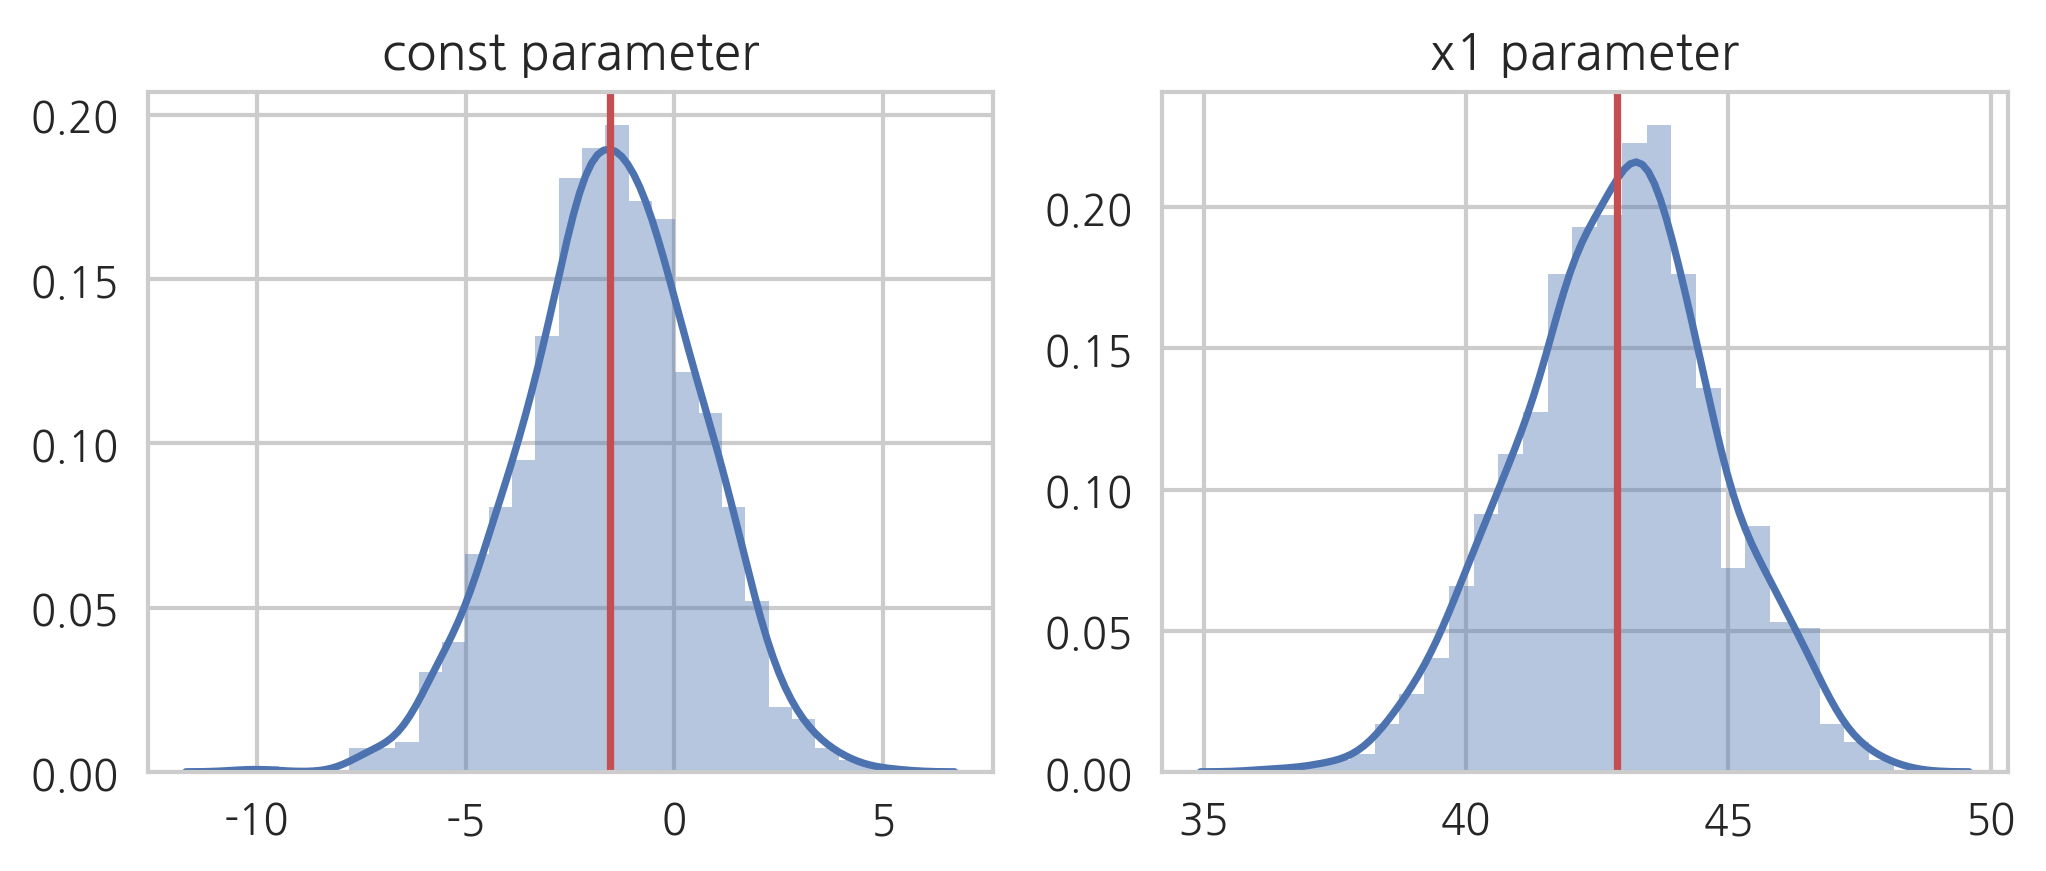

In [42]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_c, ax=ax1)
plt.axvline(params_c.mean(), c='r')
plt.title("const parameter")

ax2 = plt.subplot(122)
sns.distplot(params_x1, ax=ax2)
plt.axvline(params_x1.mean(), c='r')
plt.title("x1 parameter")
plt.show()

평균과 분산은 다음과 같다.

In [43]:
params_c.mean(), params_c.std()

(-1.5330745638772632, 2.0815217456981729)

In [44]:
params_x1.mean(), params_x1.std()

(42.879937406809816, 1.8794898275142184)

가중치 중 상수항의 경우 평균은 -1.6이지만 표분 편차가 2보다 크기 때문에 값이 0일 가능성을 배제할 수 없다.

이 결과를 statsmodels 의 회귀 분석 보고서와 비교하자.

In [45]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 26 Jun 2017   Prob (F-statistic):           2.21e-36
Time:                        22:25:19   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

보고서의 std err 항목을 보면 표준 편차의 경우 2.163 이고 마지막의 신뢰 구간(confidence interval)이 -5.920 ~ 2.663 임을 보이고 있다. 부트스트래핑으로 얻은 결과와 유사하다. 이 결과는 다음에 설명할 확률론적 가정에 의해 계산된 값이다.

## 확률론적 선형 회귀 모형

확률론적 선형회귀모형을 사용하면 부트스트래핑 없이도 회귀분석 결과의 통계적 특성을 구할 수 있다.

확률론적 선형회귀모형에서는 $y$가 확률 변수로부터 생성된 표본이라고 가정하며 다음과 같은 조건을 만족한다.


1. 선형 정규분포 가정
 * 종속 변수 $y$는 기댓값 $w^Tx$, 분산 $\sigma^2$ 를 가지는 정규 분포 확률 변수이다.
   $$ p(y \mid x, \theta) = \mathcal{N}(y \mid w^Tx, \sigma^2 ) $$ 
 * 따라서 오차(disturbance)  $ \epsilon = y-w^Tx $ 도 정규 분포 확률 변수이다.
   $$ p(\epsilon \mid \theta) = \mathcal{N}(0, \sigma^2 ) $$ 

2. 외생성(Exogeneity) 가정
 * 오차 $\epsilon$와 독립 변수 $x$는 서로 독립이다. 
 
 이 가정과 앞의 선형 정규분포 가정을 결합하면 다음과 같은 사실을 알 수 있다.
 
 * $ \text{E}[\epsilon] = 0$ 은 $x$의 값에 상관없이 유지된다.
   $$ \text{E}[\epsilon \mid x] = 0$$ 
 *   오차 $\epsilon$의 분산은 독립 변수   $x$와 상관관계가 없다.
   $$ \text{Var}[\epsilon \mid x] =  \sigma^2 = \text{const.}$$ 
 * 공분산 행렬이 $\sigma^2$과 단위행렬의 곱이다.
   $$ \text{Cov}[\epsilon \mid x] = \text{E}[ \epsilon \epsilon^T \mid x ] = \sigma^2 I $$
 
3. 조건부 독립 가정
 * $i$번째 데이터의 오차 $\epsilon_i$와 $j$번째 데이터의 오차 $\epsilon_j$는 $x$에 대해 서로 조건부 독립이다.
   $$ \text{Cov}[\epsilon_i, \epsilon_j \mid x] =  0$$ 


***
샘플의 오차가 서로 연관이 있다면 시계열 분석으로
***

## MLE를 사용한 선형 회귀 분석

앞의 확률론적 선형 회귀 모형과 MLE(Maximum Likelihood Estimation)을 사용하여 가중치 벡터 $w$의 값을 구해보자.

Likelihood는 다음과 같다.


$$
\begin{eqnarray}
p(y_{1:N} \,\big|\, x_{1:N}, \theta)
&=& \prod_{i=1}^N N(y_i \,\big|\, w^T x_i , \sigma^2) \\
&=& \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
\end{eqnarray}
$$

계산을 용이하기 위해 Log를 취하면 다음과 같다.
$$
\begin{eqnarray}
\text{LL}  
&=& \log p(y_{1:N} \,\big|\, x_{1:N}, \theta) \\
&=& \log \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
&=& -\dfrac{1}{2\sigma^2} \sum_{i=1}^N (y_i-w^T x_i)^2 - \dfrac{1}{2} \sum_{i=1}^N  \log{2\pi}{\sigma^2}  \\
\end{eqnarray}
$$



이를 행렬로 표시하면 다음과 같다.


$$
\text{LL}  =  -C_1 (y - Xw)^T(y-Xw) - C_0 = -C_1(w^TX^TXw -2 y^TXw + y^Ty) - C_0
$$

$$
C_1 =  -\dfrac{1}{2\sigma^2}
$$

$$
C_0 =  \dfrac{1}{2} \sum_{i=1}^N  \log{2\pi}{\sigma^2} 
$$

이를 최적화하면 OLS와 동일한 결과를 얻을 수 있다.


$$
\dfrac{\partial}{\partial w} \text{LL} \propto - 2X^TX \hat{w} + 2X^Ty = 0
$$

$$
\hat{w} = (X^TX)^{-1}X^T y
$$


## 잔차의 분포

위의 확률론적 선형 회귀 모형에 따르면 잔차 $e = y - \hat{w}^Tx$ 도 정규 분포를 따른다. 이는 다음과 같이 증명할 수 있다.

확률론적 선형 회귀 모형의 오차 $\epsilon$와 잔차 $e$는 다음과 같은 관계를 가진다.

$$  \hat{y} = X\hat{w} = X (X^TX)^{-1}X^T y = Hy $$

$$ e = y - \hat{y}= y - Hy = (I - H) y$$

$M = I - H$이라고 정의하면

$$ e = My = M (Xw + \epsilon) $$

최적화 조건에서

$$
X^TX \hat{w} - X^Ty = 0
$$

$$
X^T(X\hat{w} - y) = -X^Te = 0
$$

$$
X^TMy = 0 
$$

이 식은 모든 $y$에 대해 성립하므로

$$
X^TM = 0
$$

$H$가 대칭 행렬이므로 $M = I -H$도 대칭 행렬

$$
MX = 0
$$


$$ e = MXw + M\epsilon = M\epsilon $$

즉, 잔차 $e$는 오차 $\epsilon$의 선형 변환(linear transform)이다. 정규 분포의 선형 변환은 마찬가지로 정규 분포이므로 잔차도 정규 분포를 다른다.

***
$ X^TM = 0 $ 에서 $M$은 대칭행렬  
$ (X^TM)^T = 0 $  
$ M^TX = 0 $  
$ MX = 0 $
***

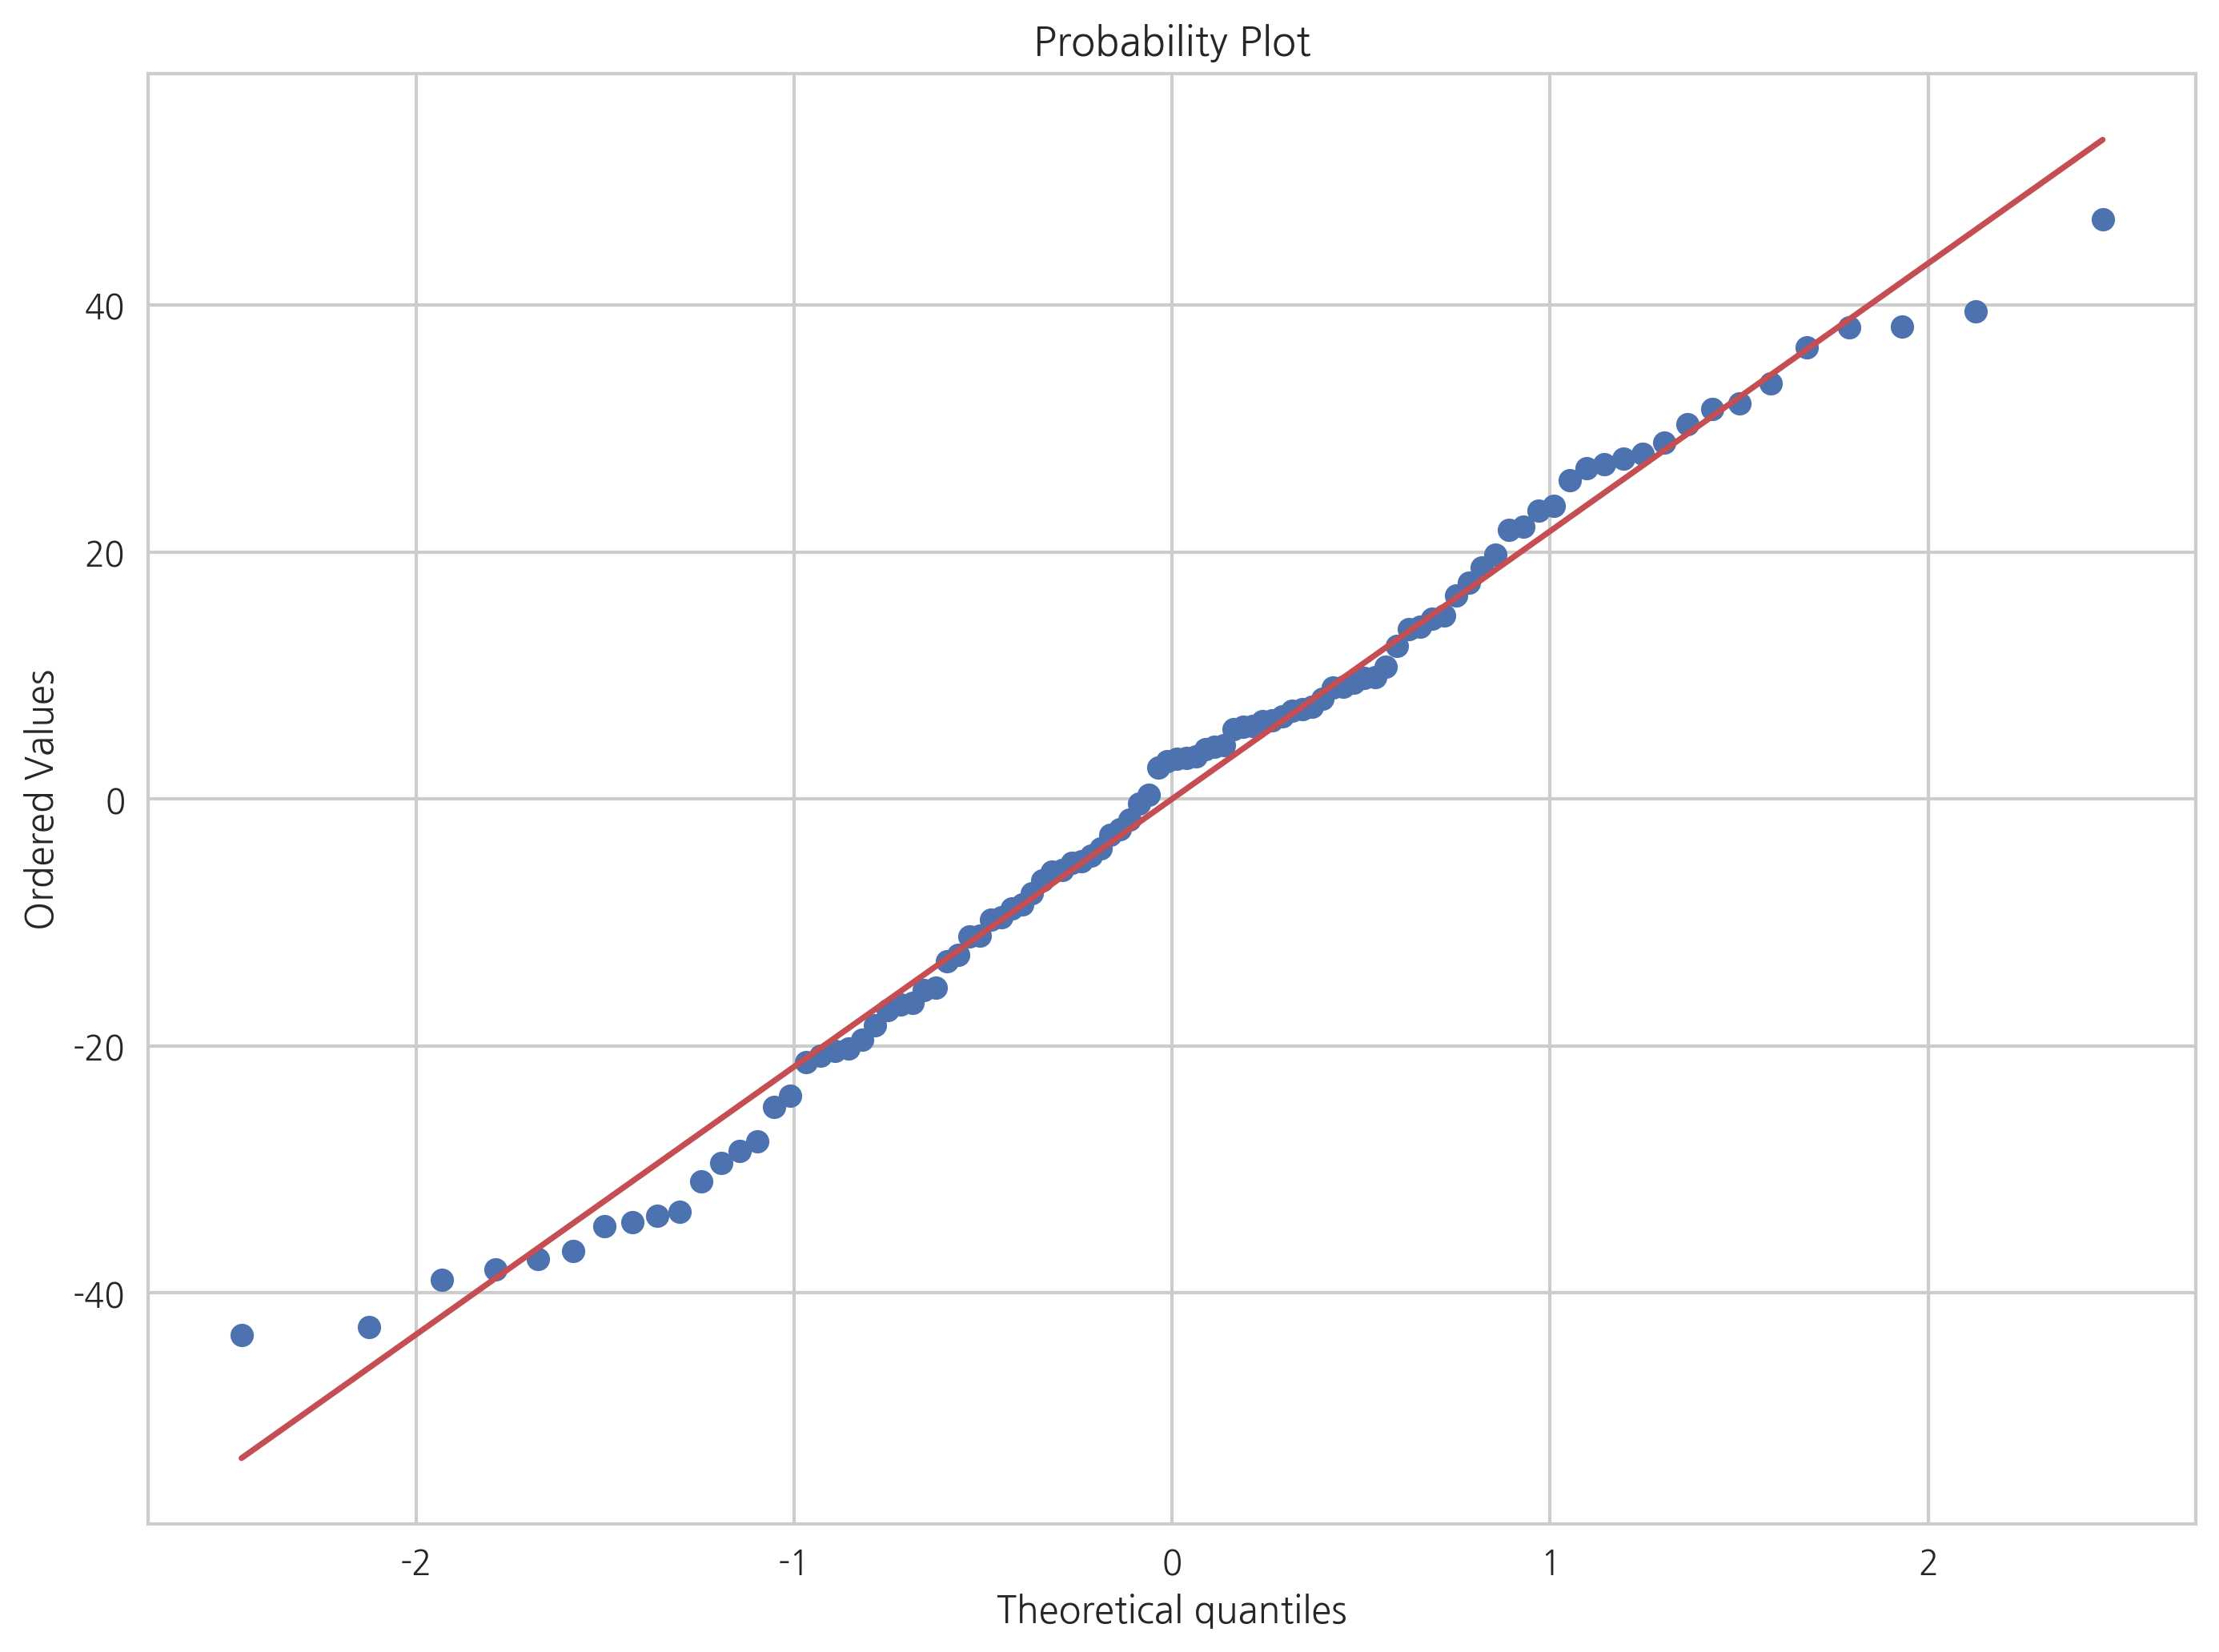

In [46]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

잔차의 정규성은 다음과 같이 정규성 검정을 통해 살펴볼 수도 있다.

In [47]:
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.523
P-value     :  0.172


In [48]:
test = sms.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


다음은 $x$값이 달라짐에 따라 잔차의 분포가 어떻게 바뀌는 지를 살펴보기 위한 것이다. $x$값이 달라져도 분포의 형태가 크게 바뀌지 않음을 알 수 있다.

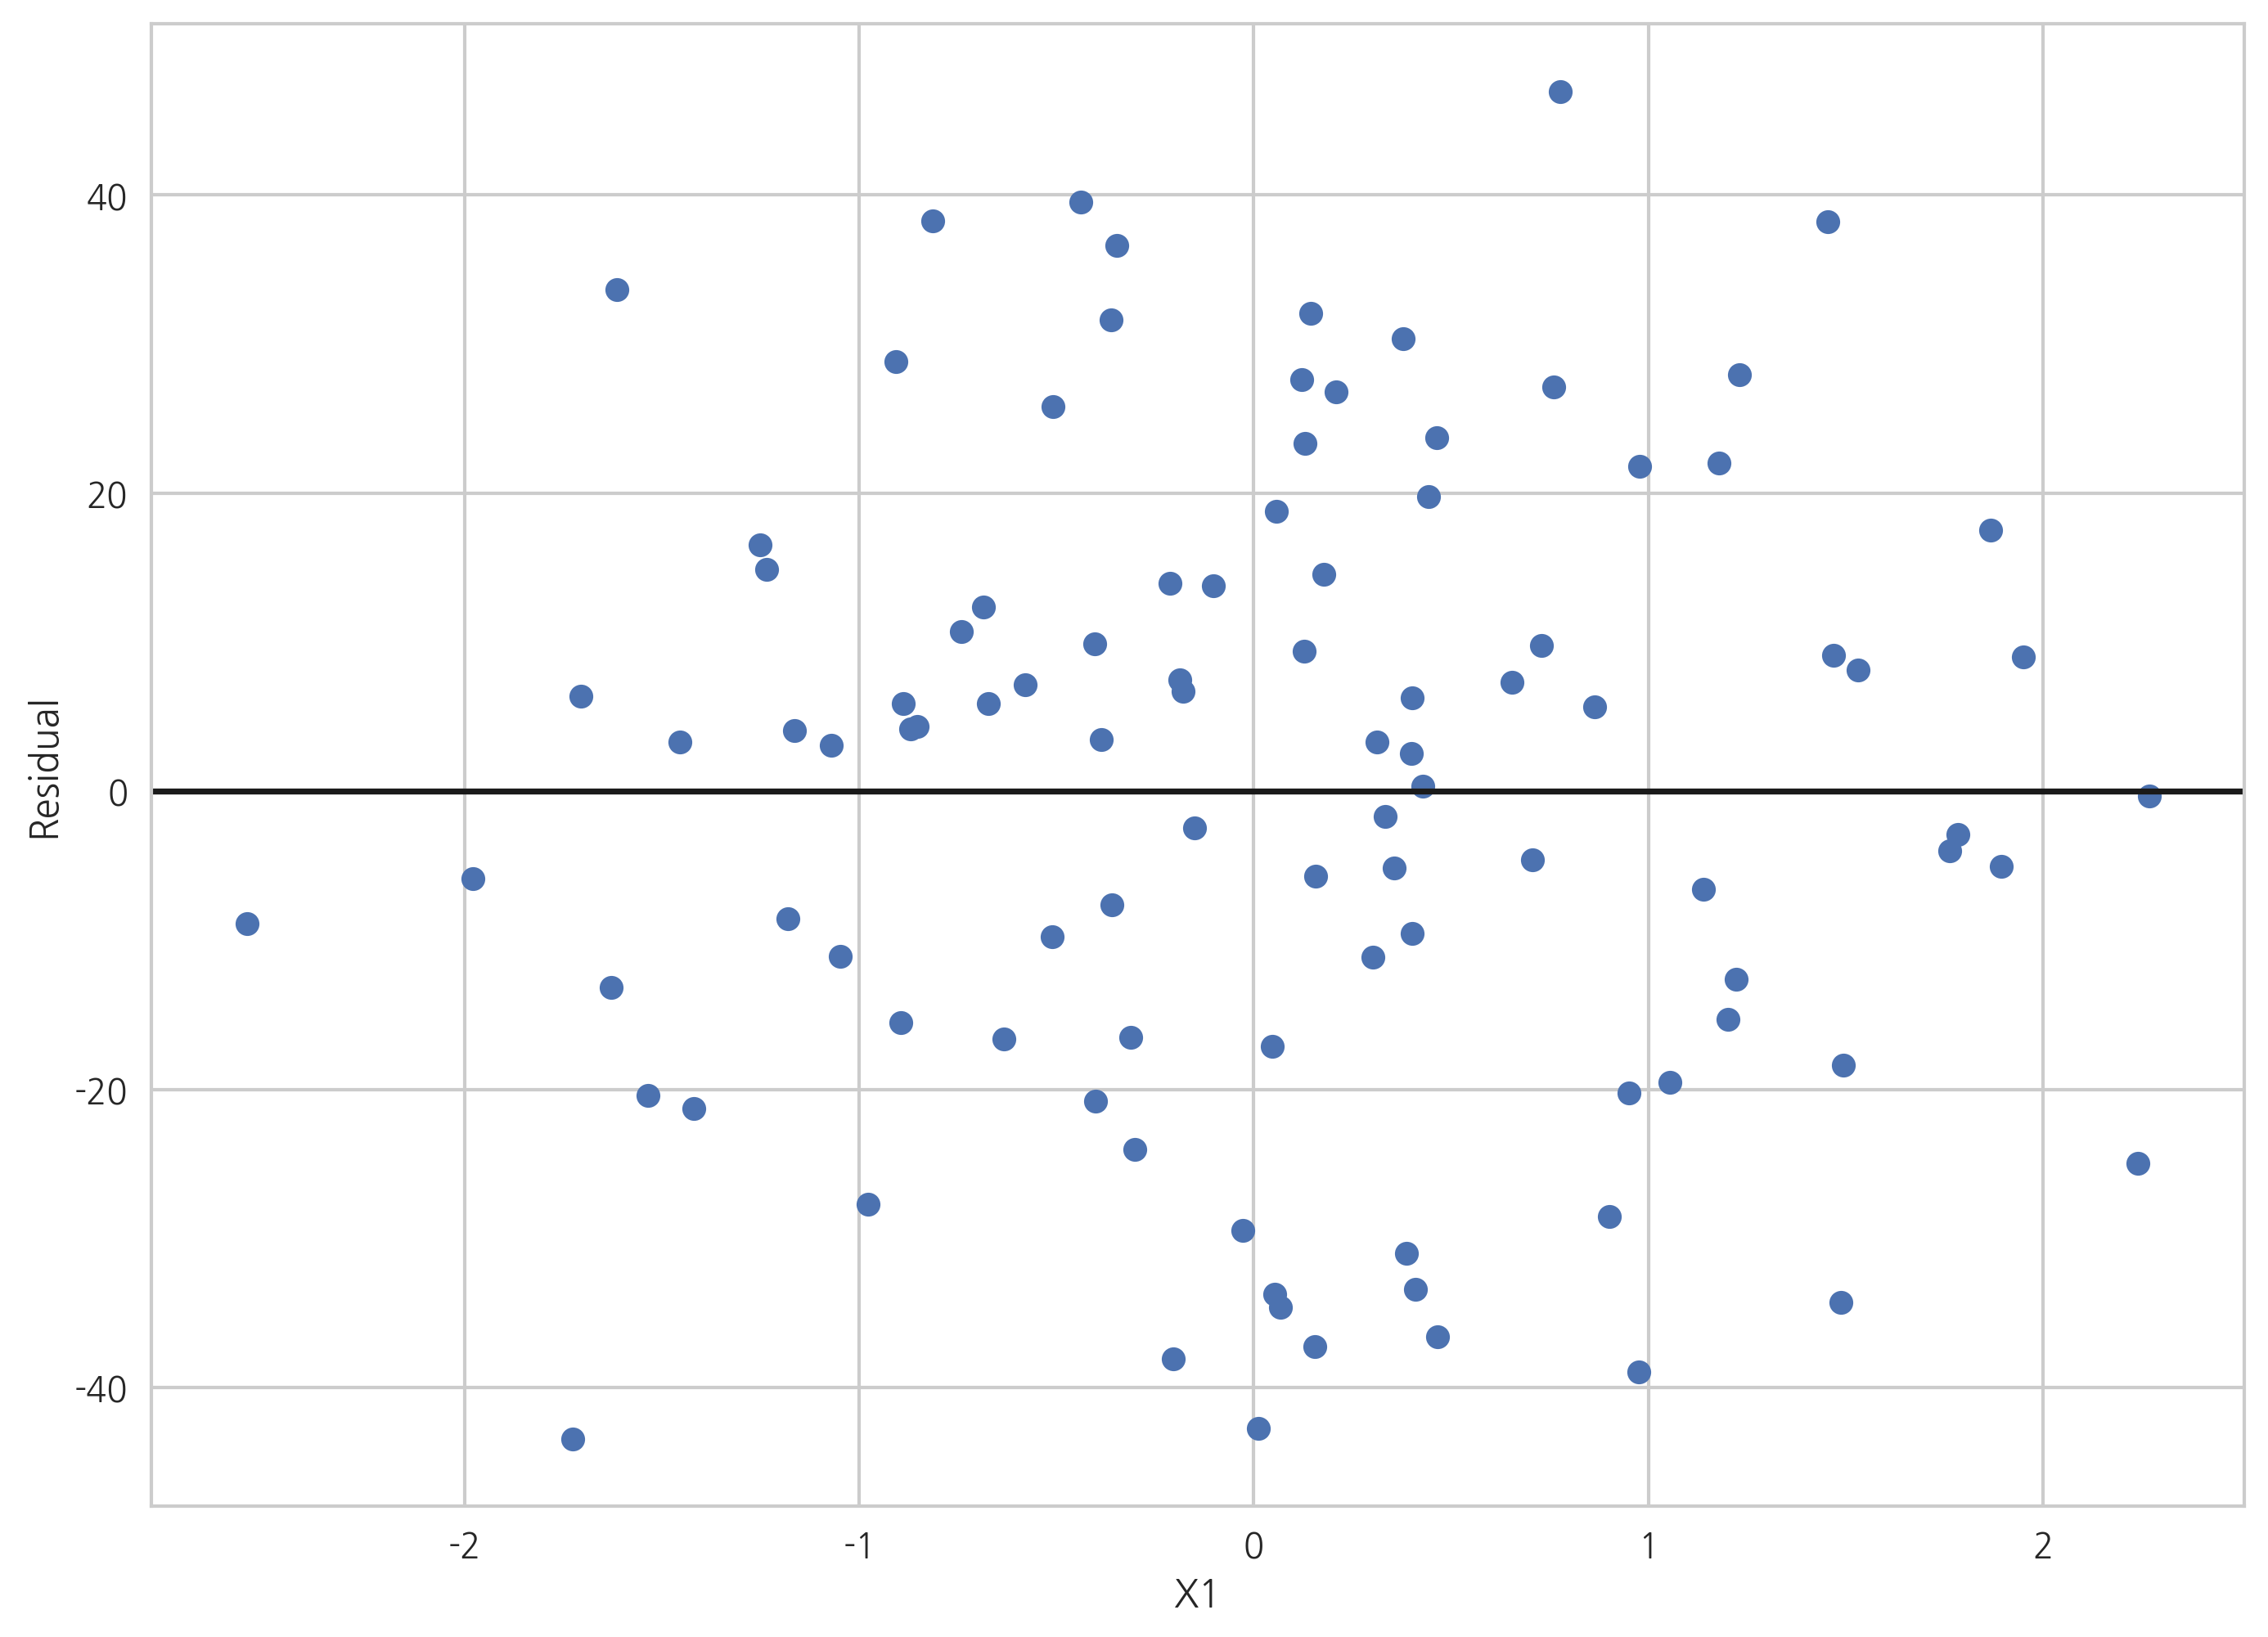

In [49]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

***
x값이 달라졌을때 폭이나 중심값이 달라지면안된다.
***

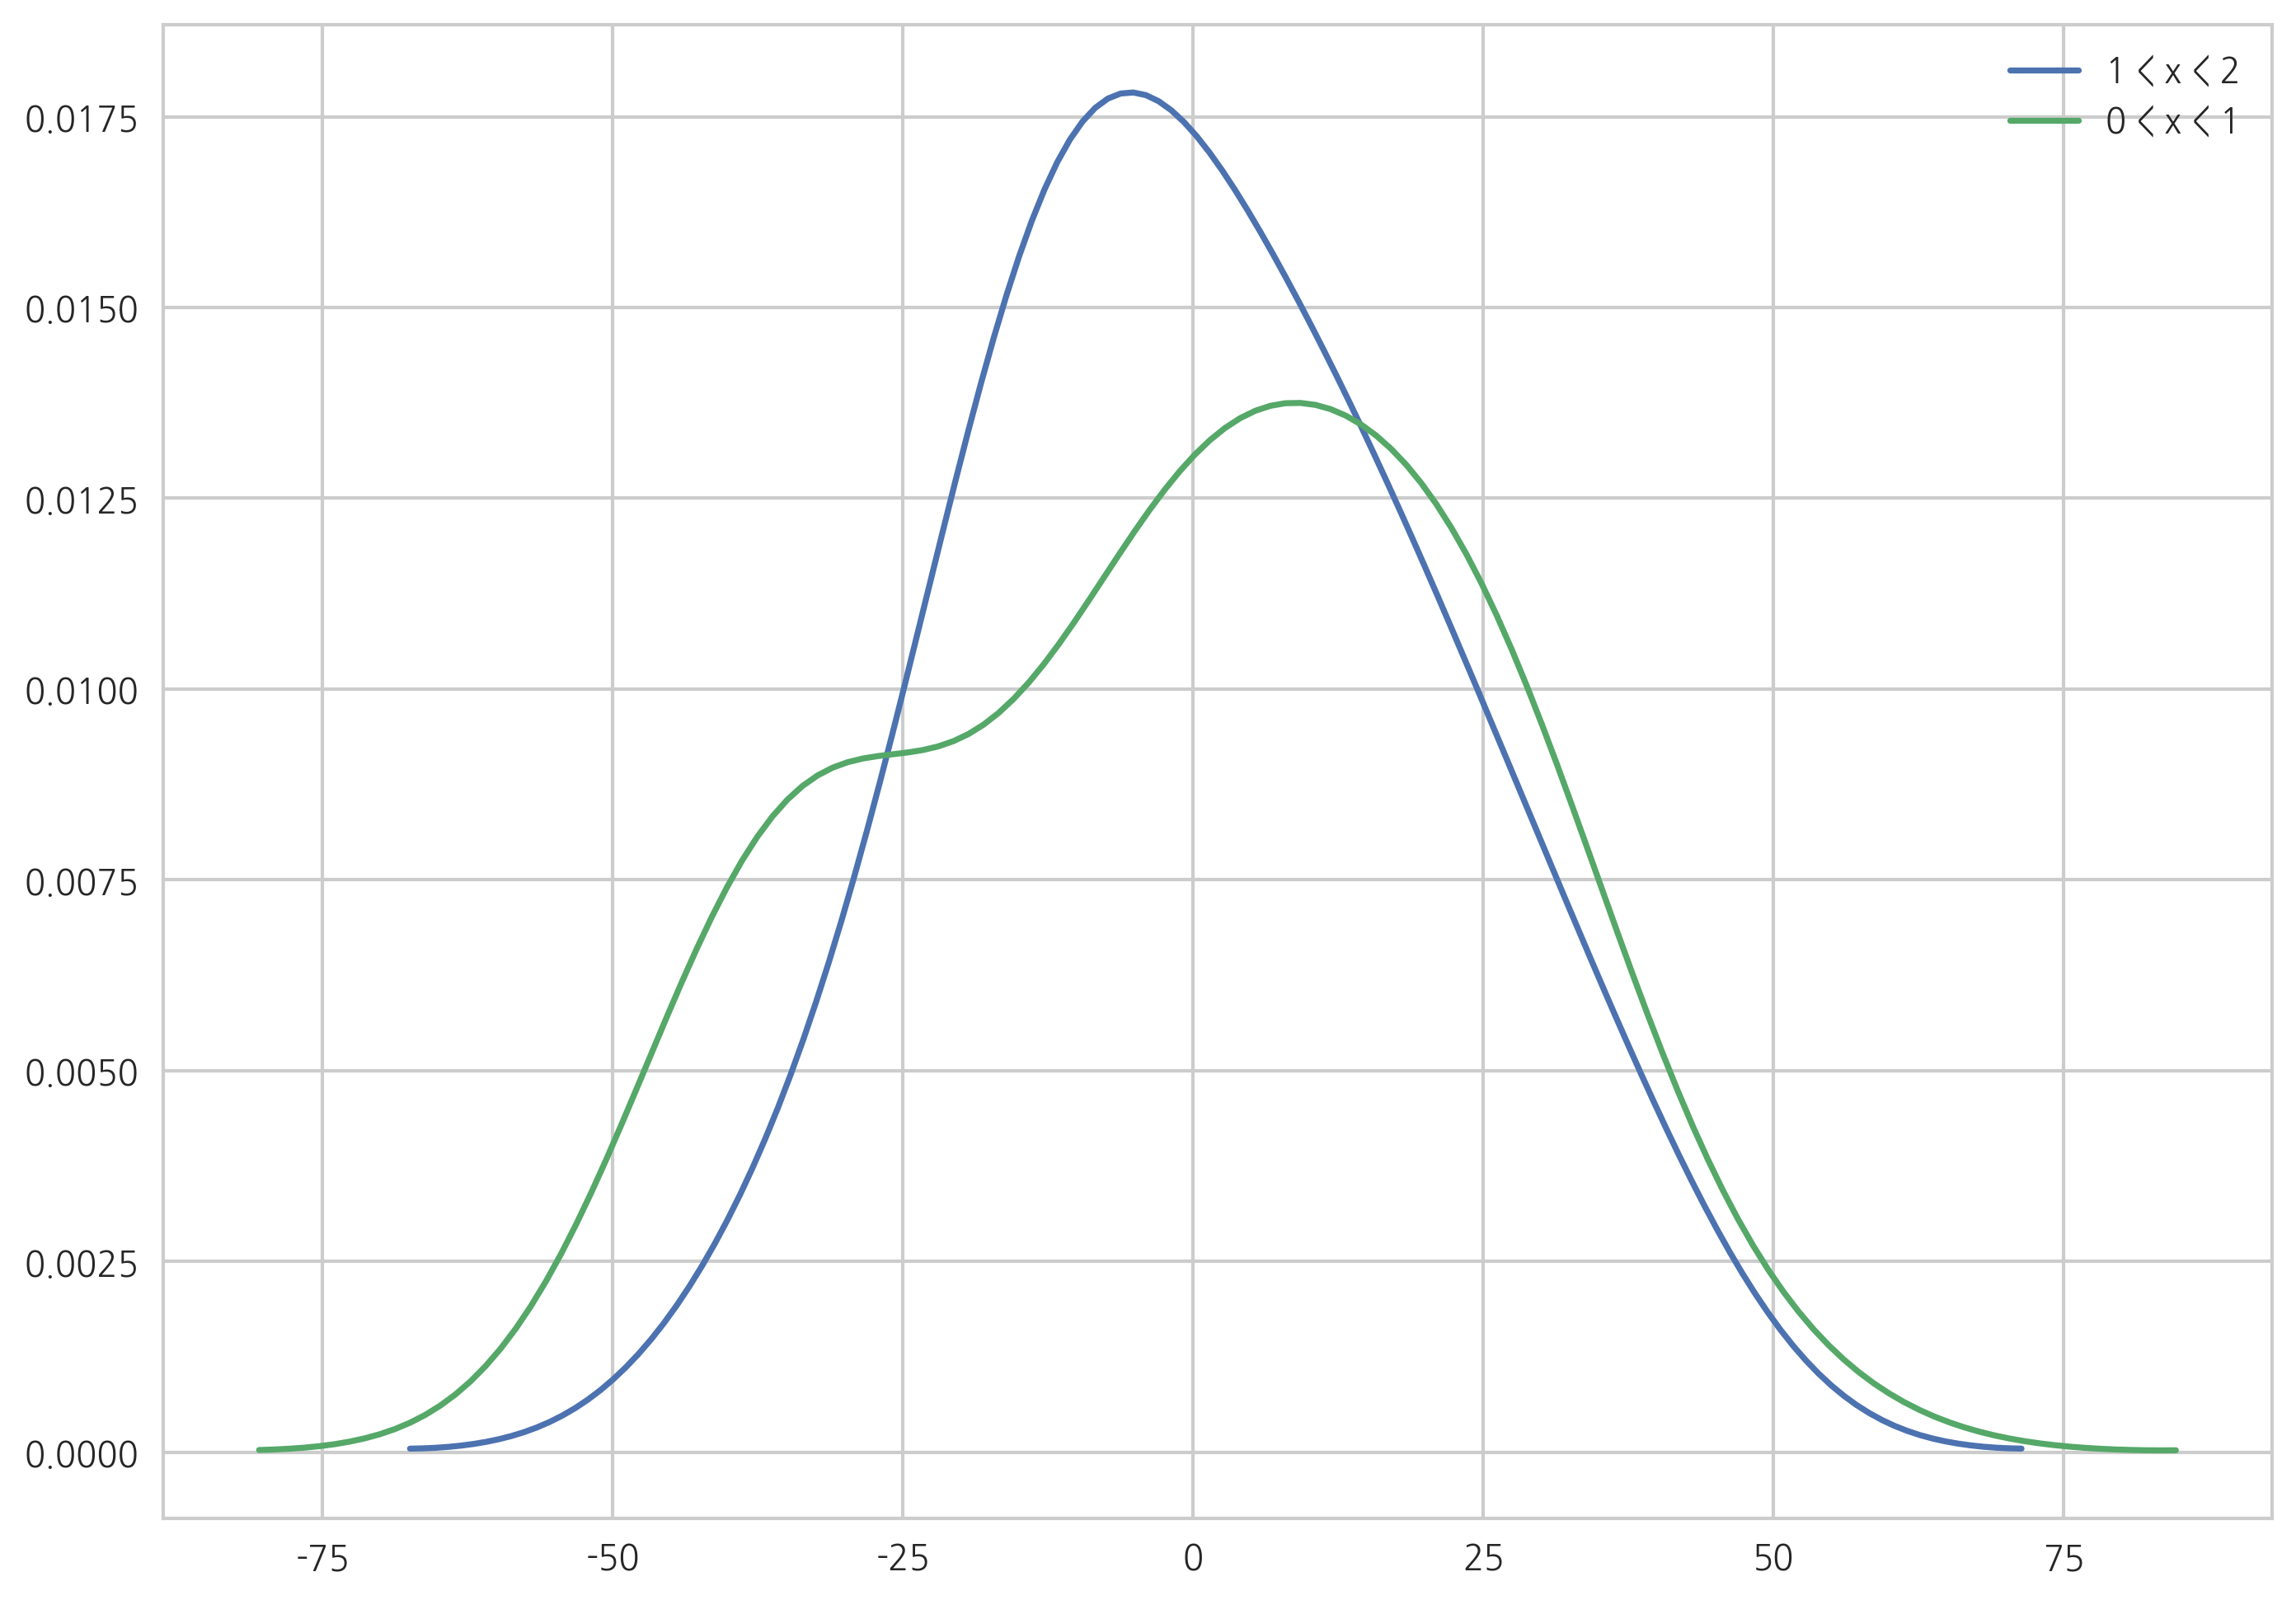

In [50]:
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label="1 < x < 2")
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label="0 < x < 1")
plt.legend()
plt.show()

만약 데이터가 위와 같은 가정을 따르지 않는다면 어떻게 될까? 예를 들어 다음과 같은 데이터를 생각하자.

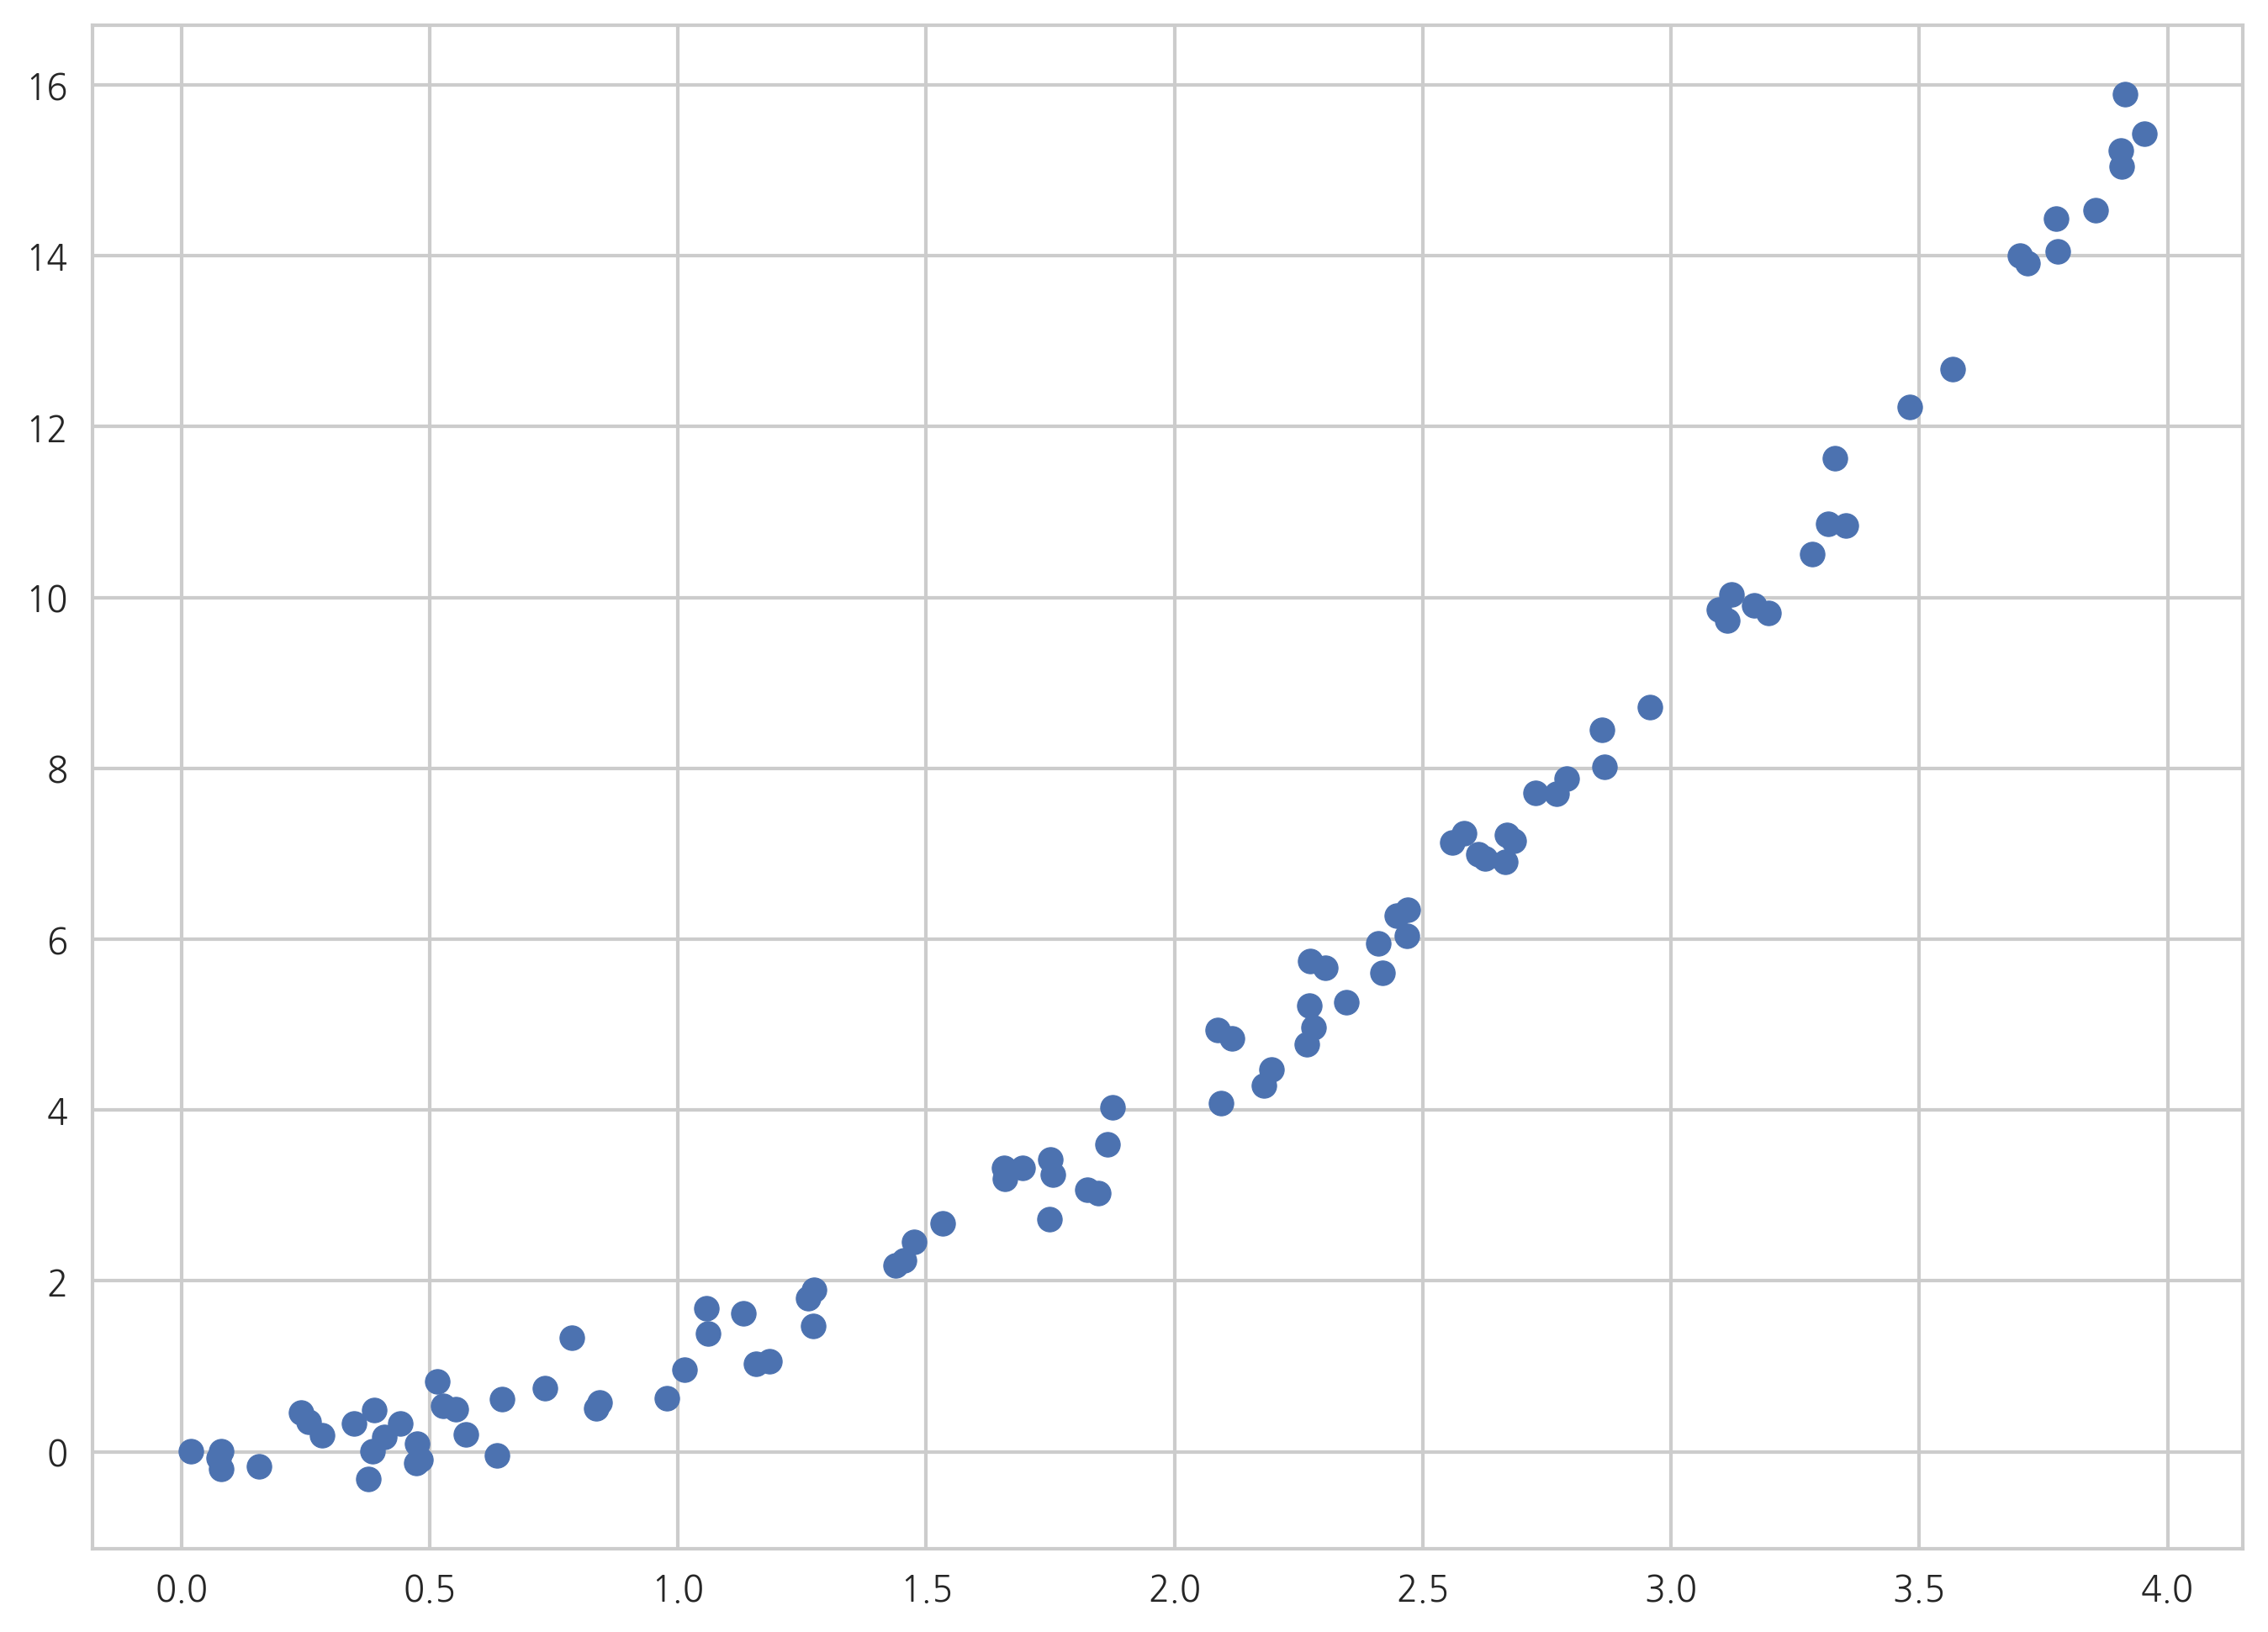

In [51]:
def make_regression2(n_sample = 100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.show()

In [52]:
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

QQ플롯과 정규성 검정에서 보듯이 잔차는 정규 분포를 따르지 않는다.

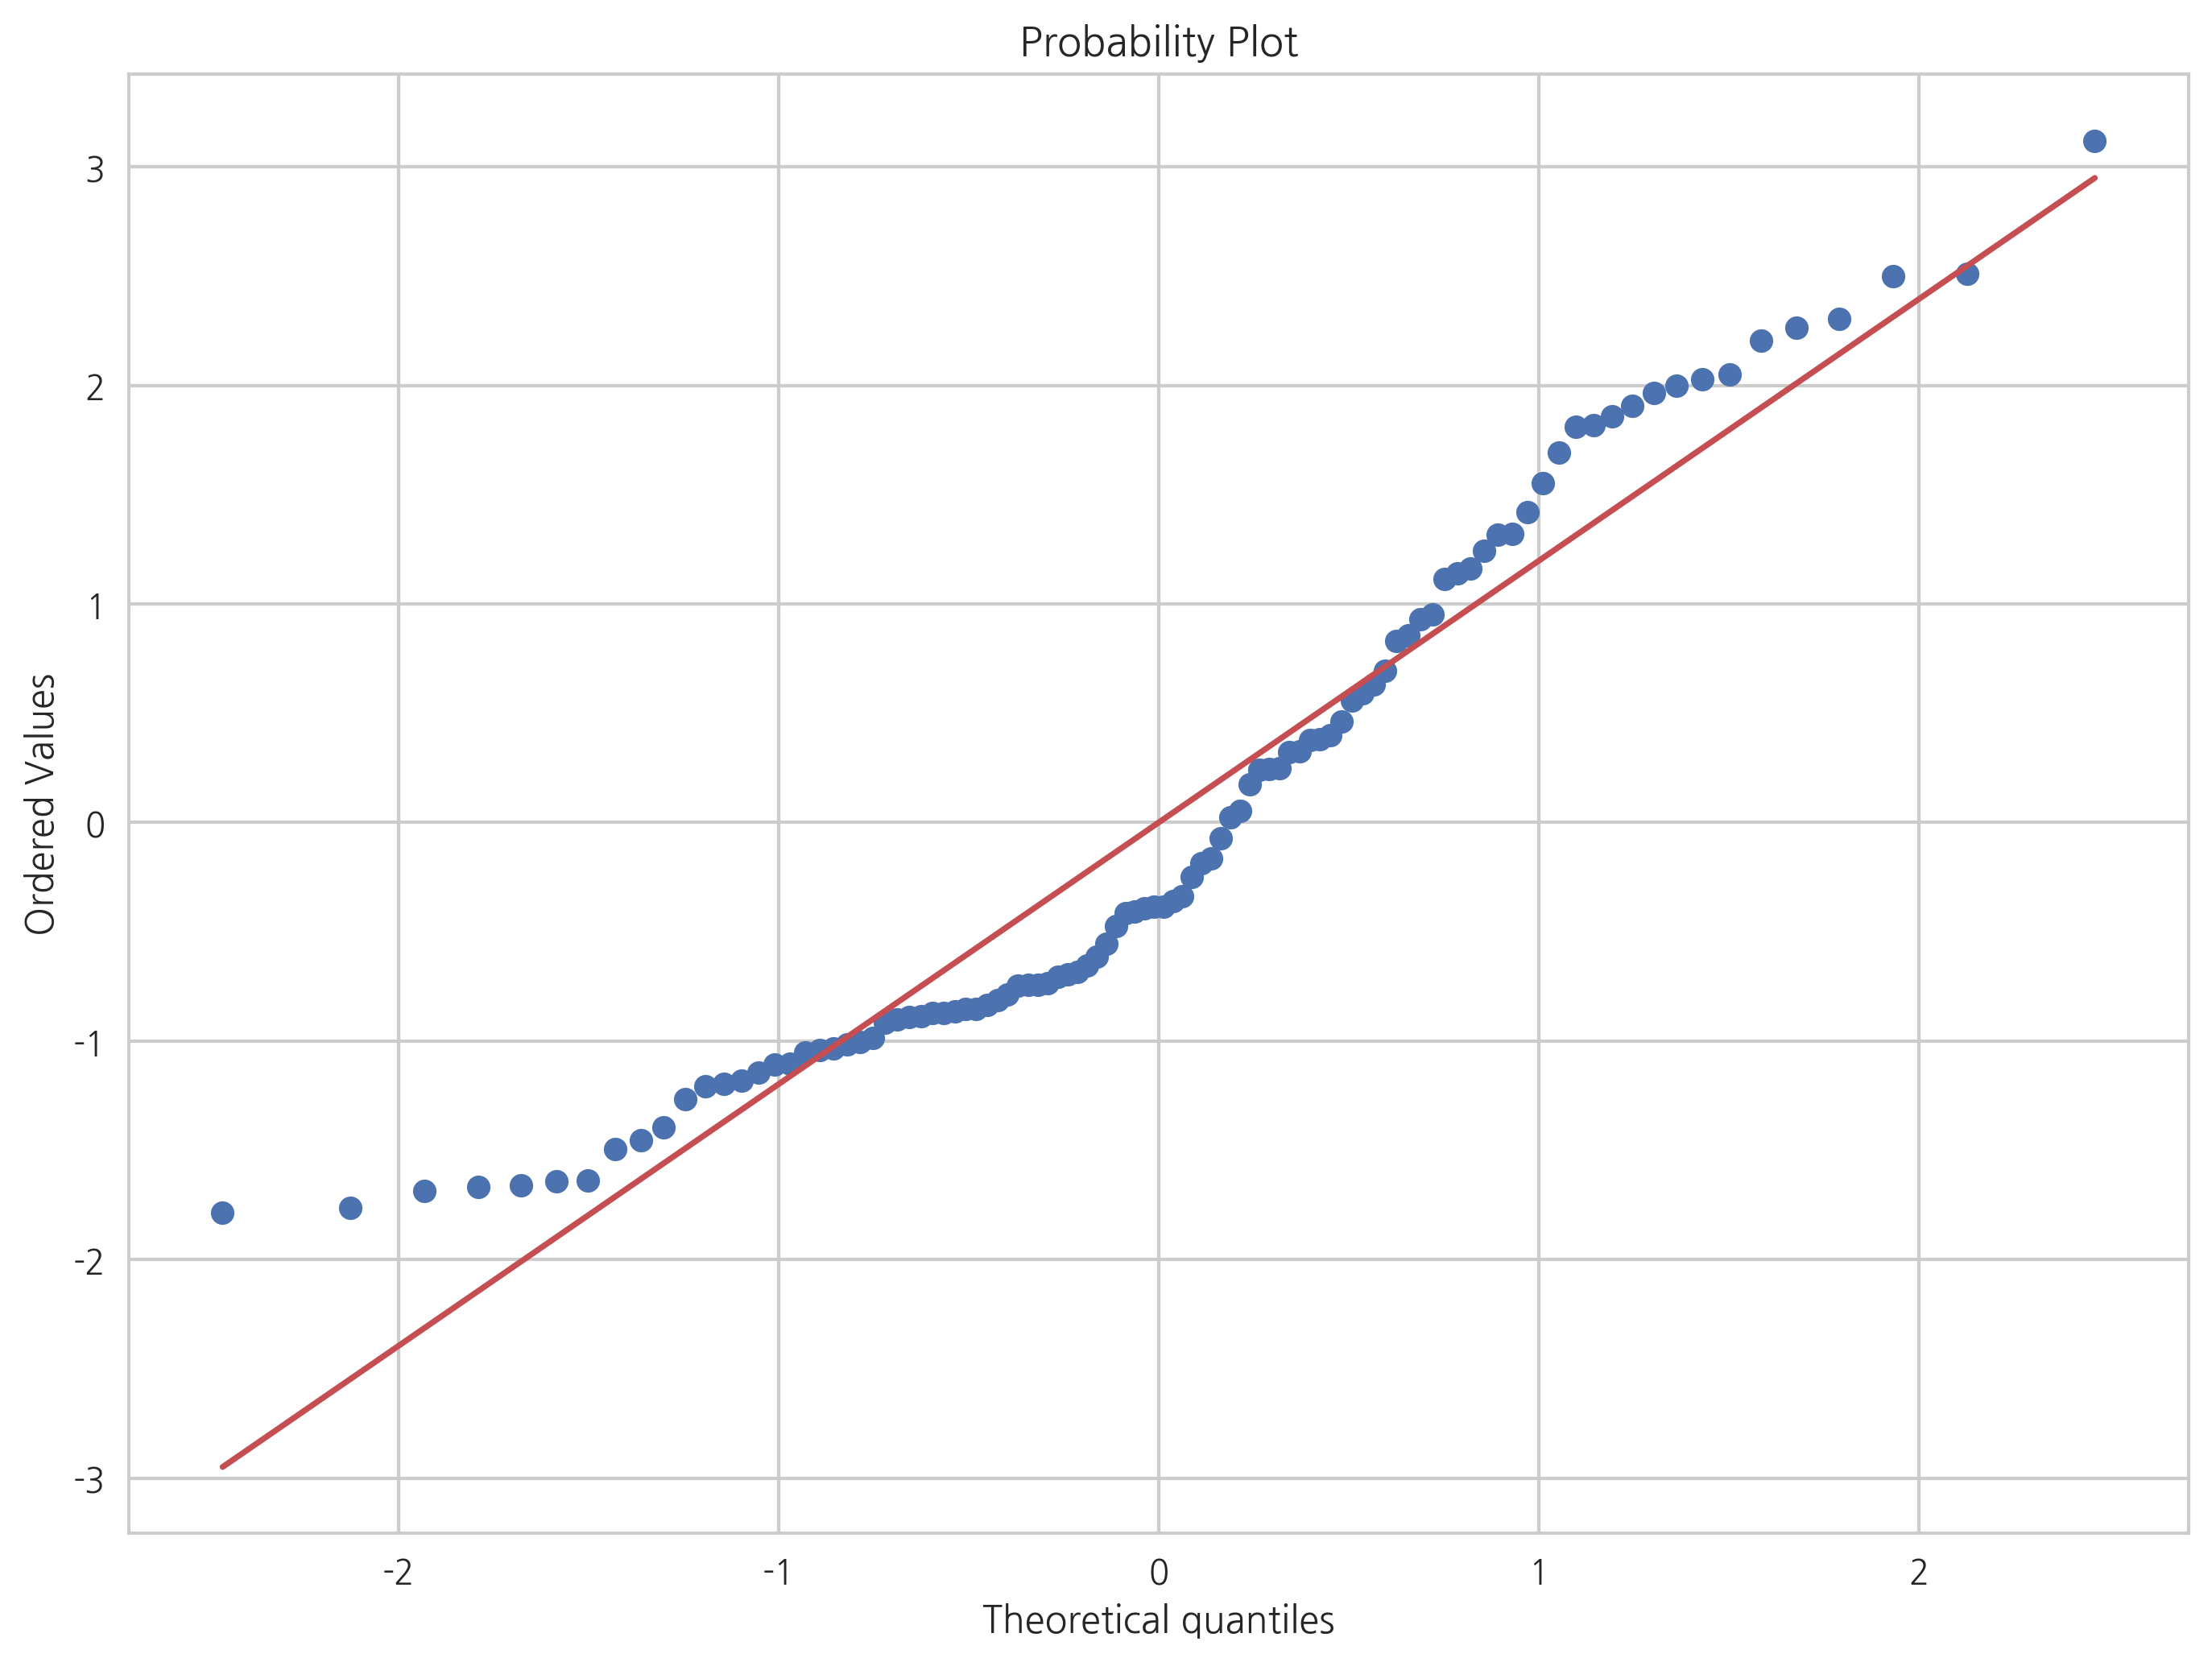

In [53]:
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

In [54]:
test = sms.omni_normtest(result2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  9.520
P-value     :  0.009


이번에는 또다른 데이터를 살펴보자.

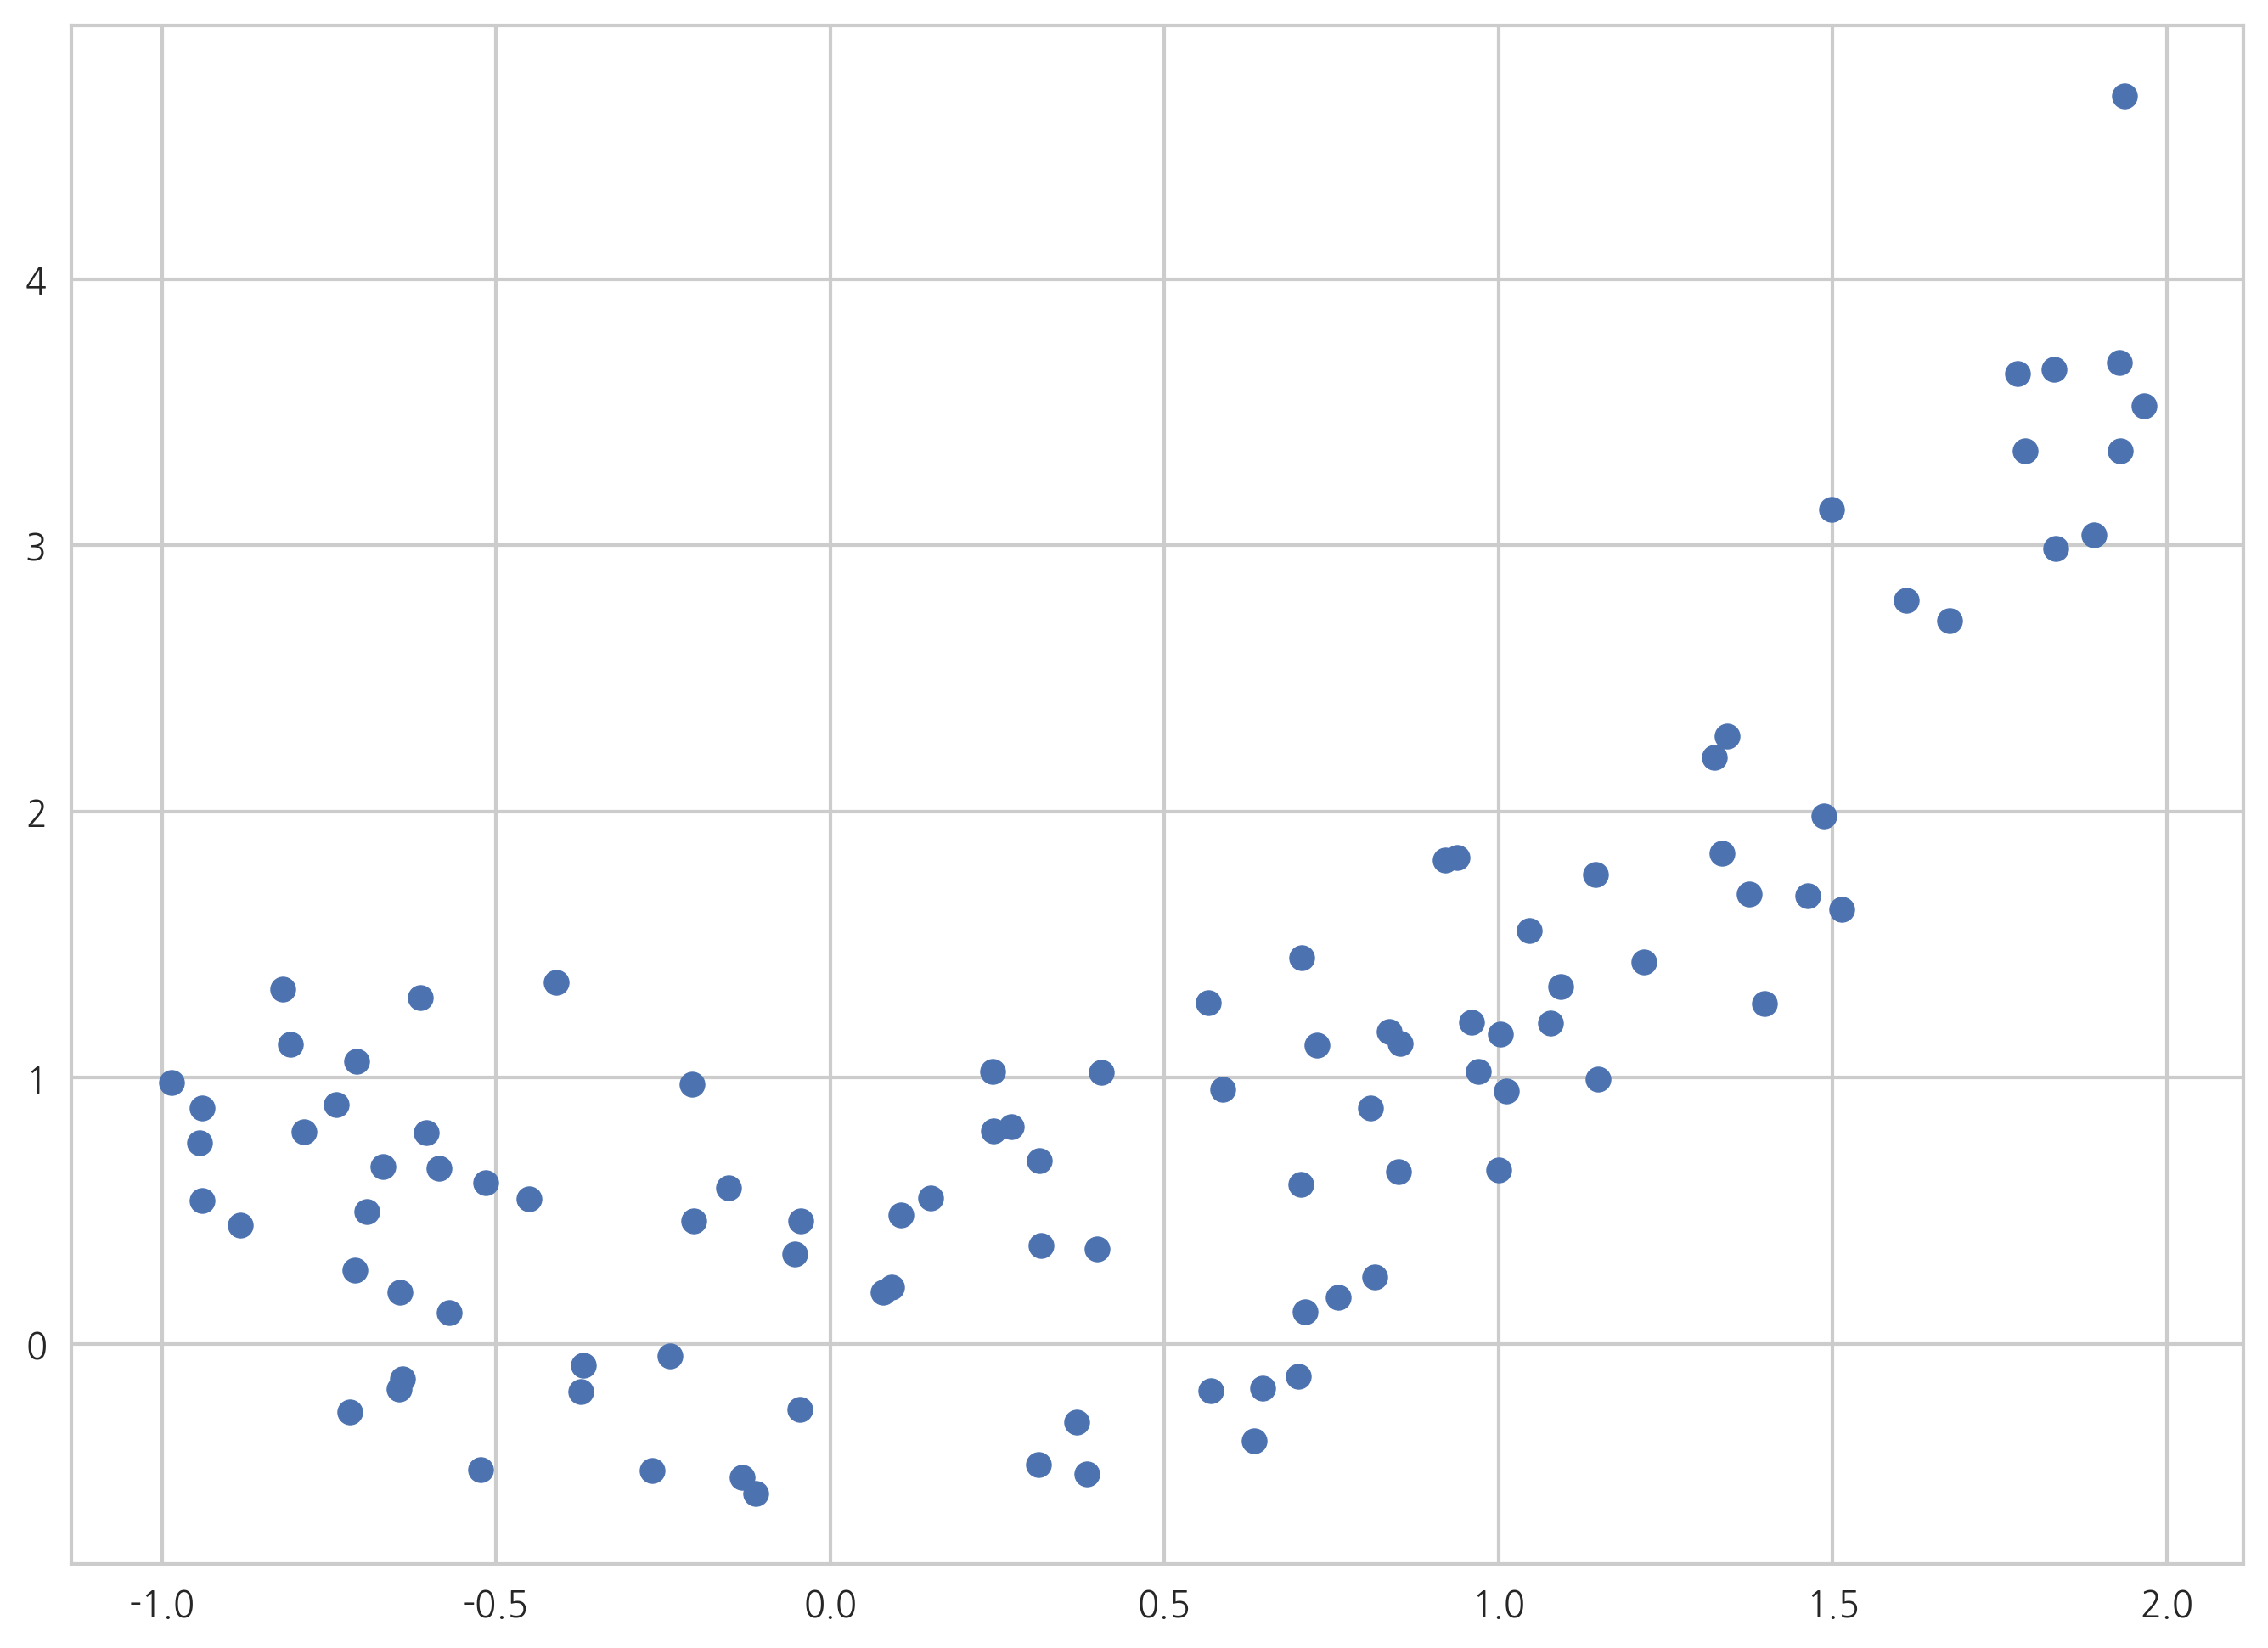

In [55]:
def make_regression3(n_sample = 100, bias=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

In [56]:
dfX30 = pd.DataFrame(x3, columns=["X1"])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=["y"])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

전체 잔차는 정규 분포를 따르지만 $x$값에 의존하고 있다는 것을 알 수 있다.

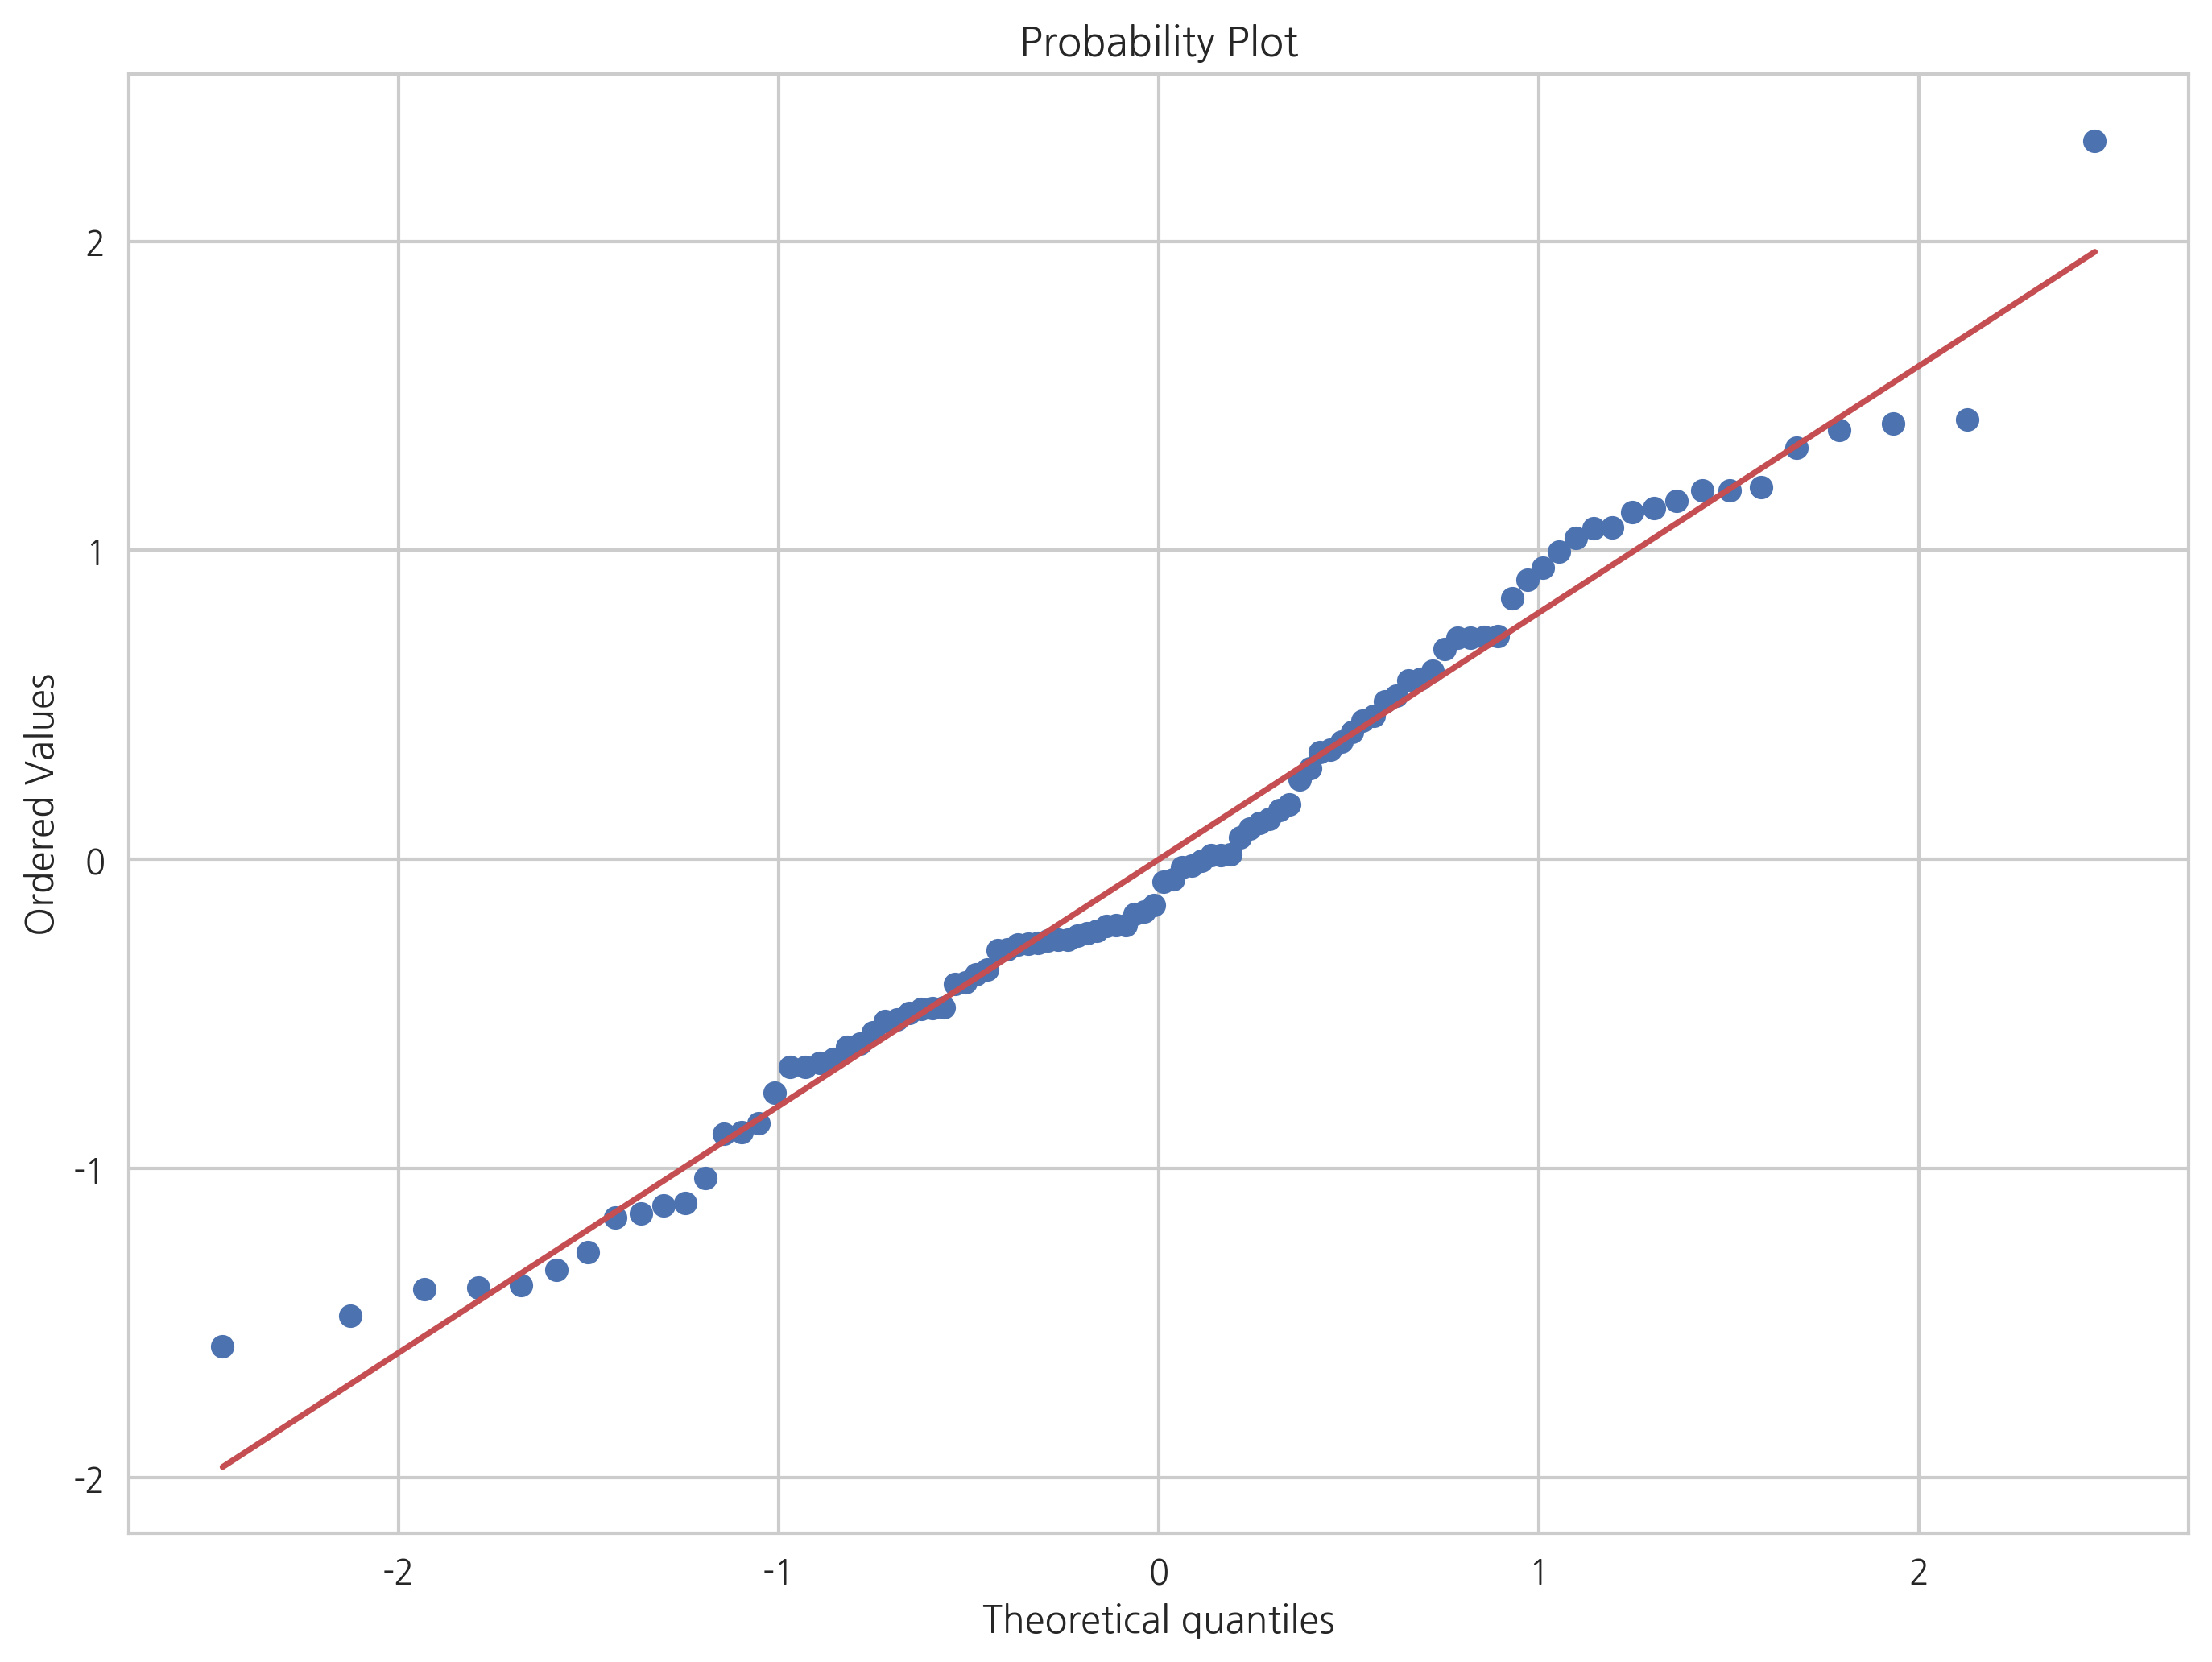

In [57]:
sp.stats.probplot(result3.resid, plot=plt)
plt.show()

In [58]:
test = sms.omni_normtest(result3.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  1.202
P-value     :  0.548


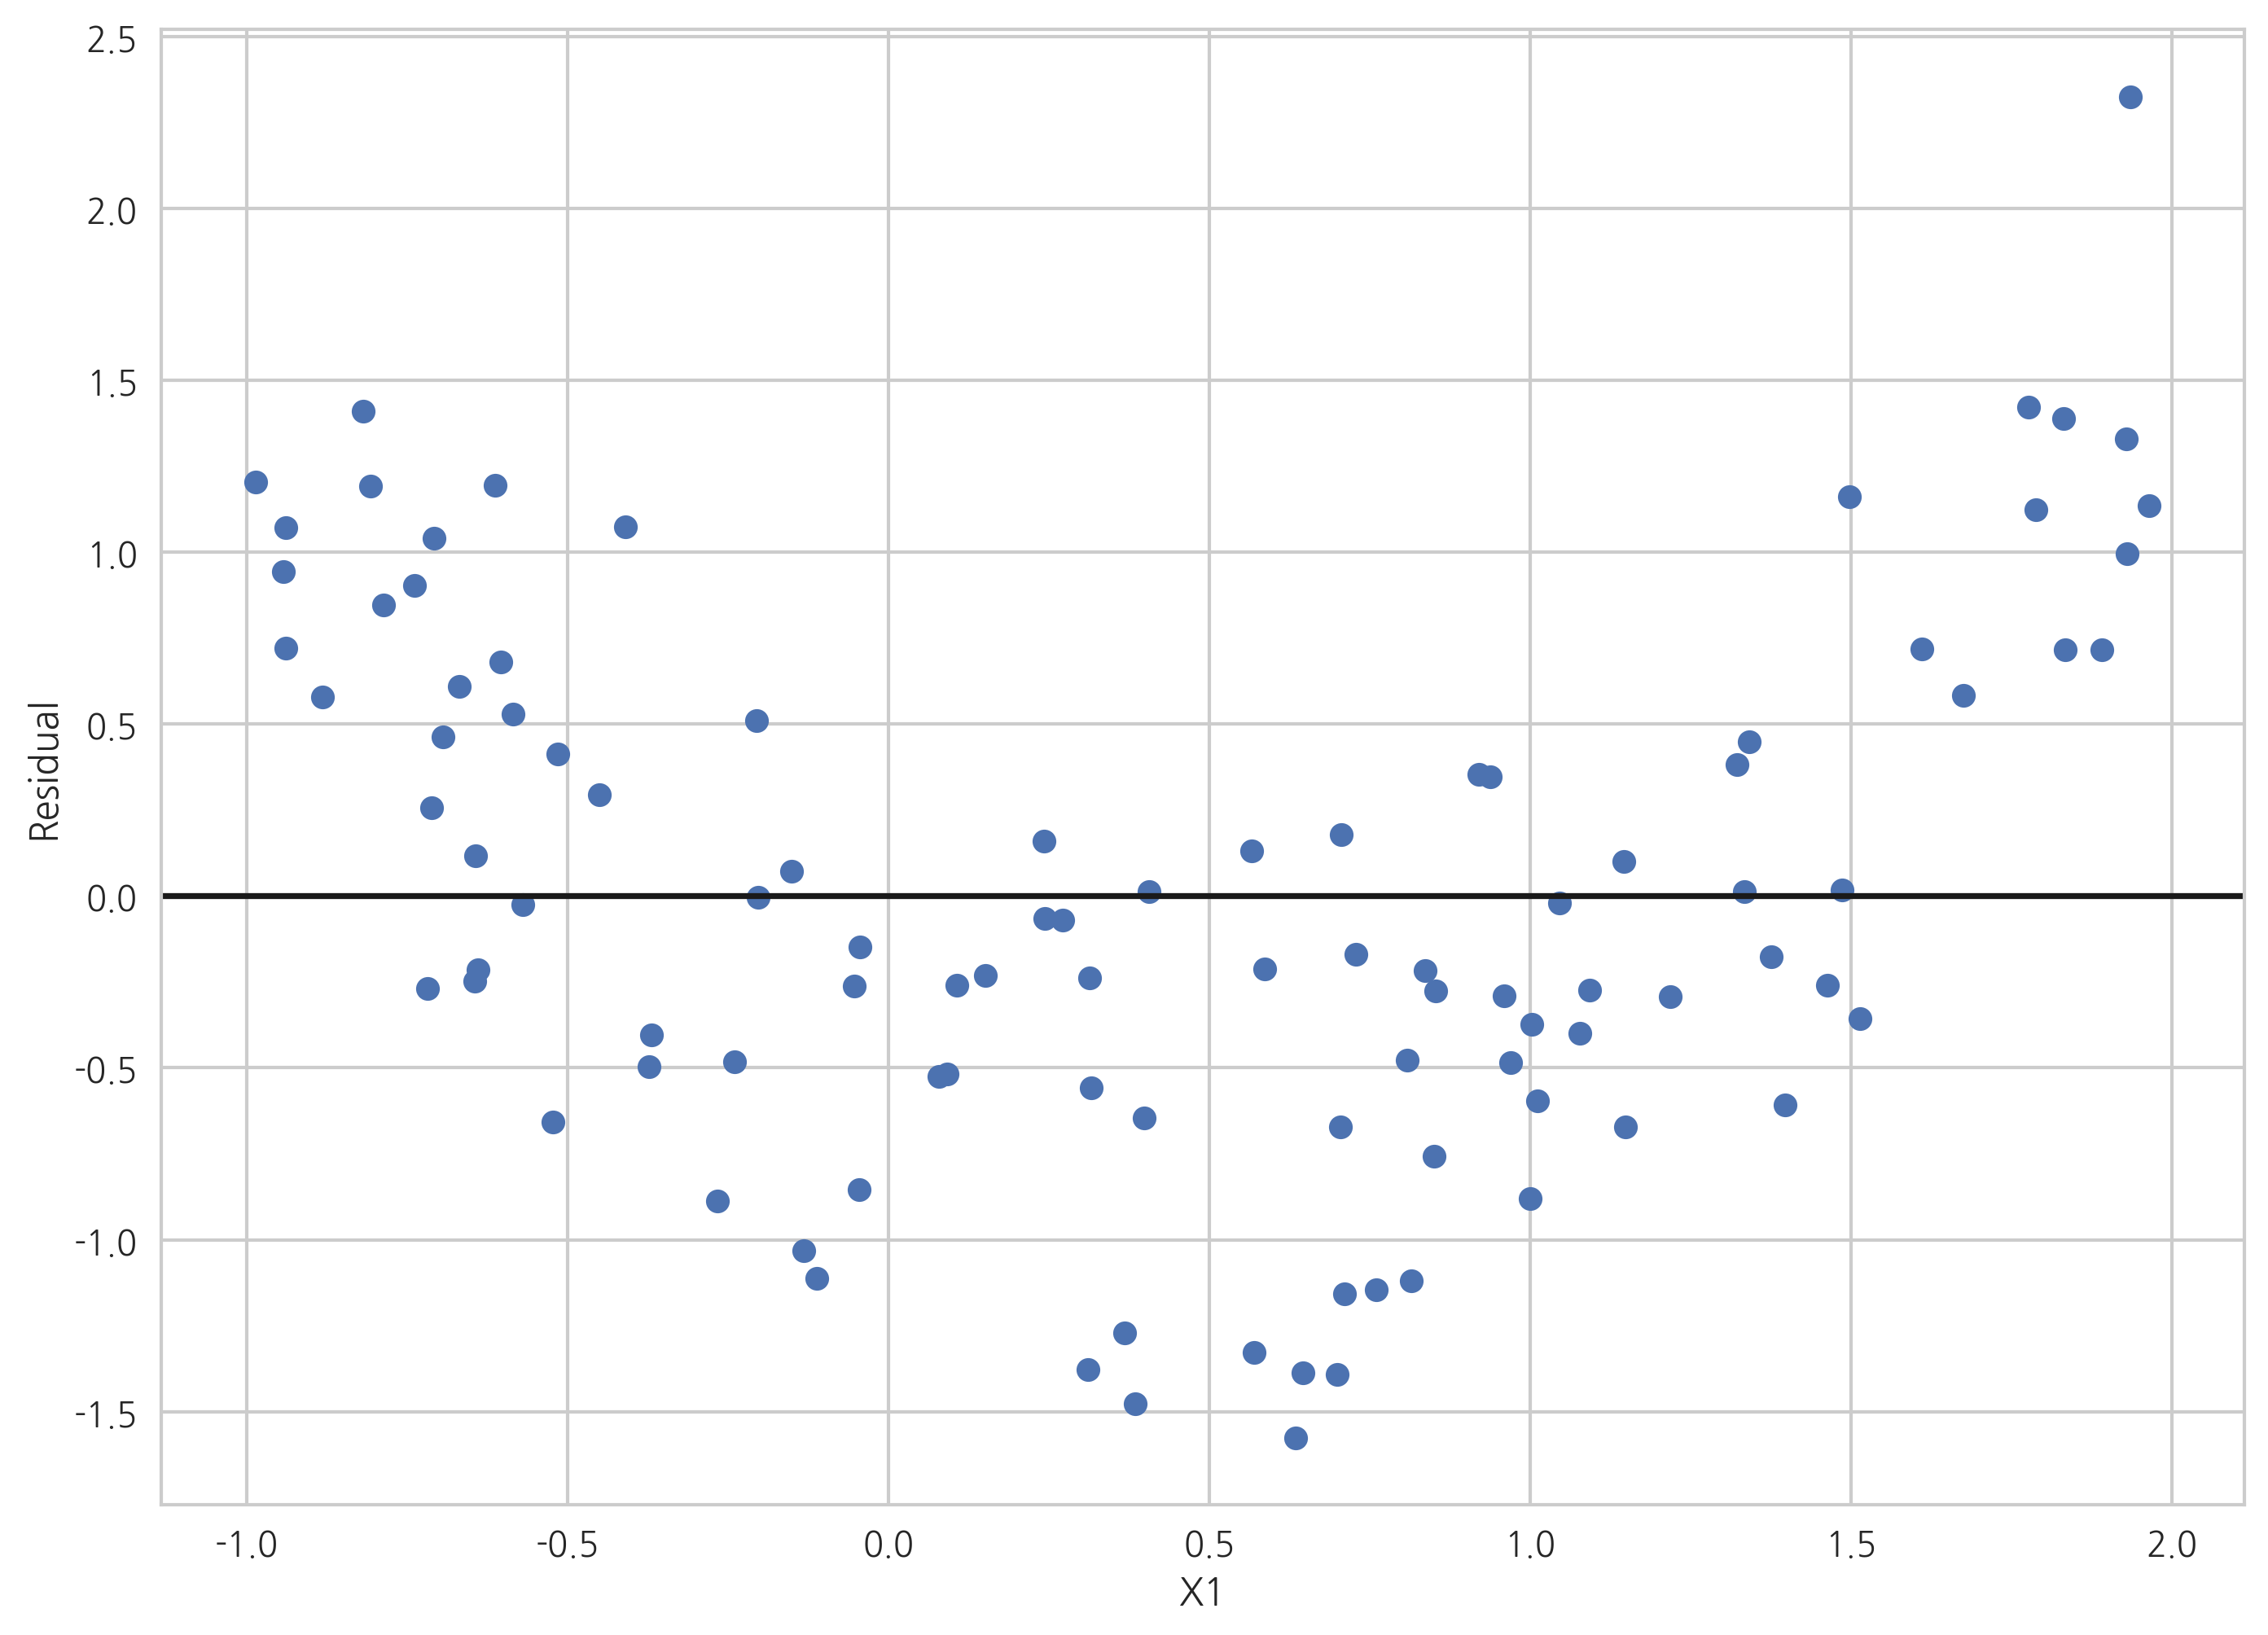

In [59]:
plt.plot(x3, result3.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

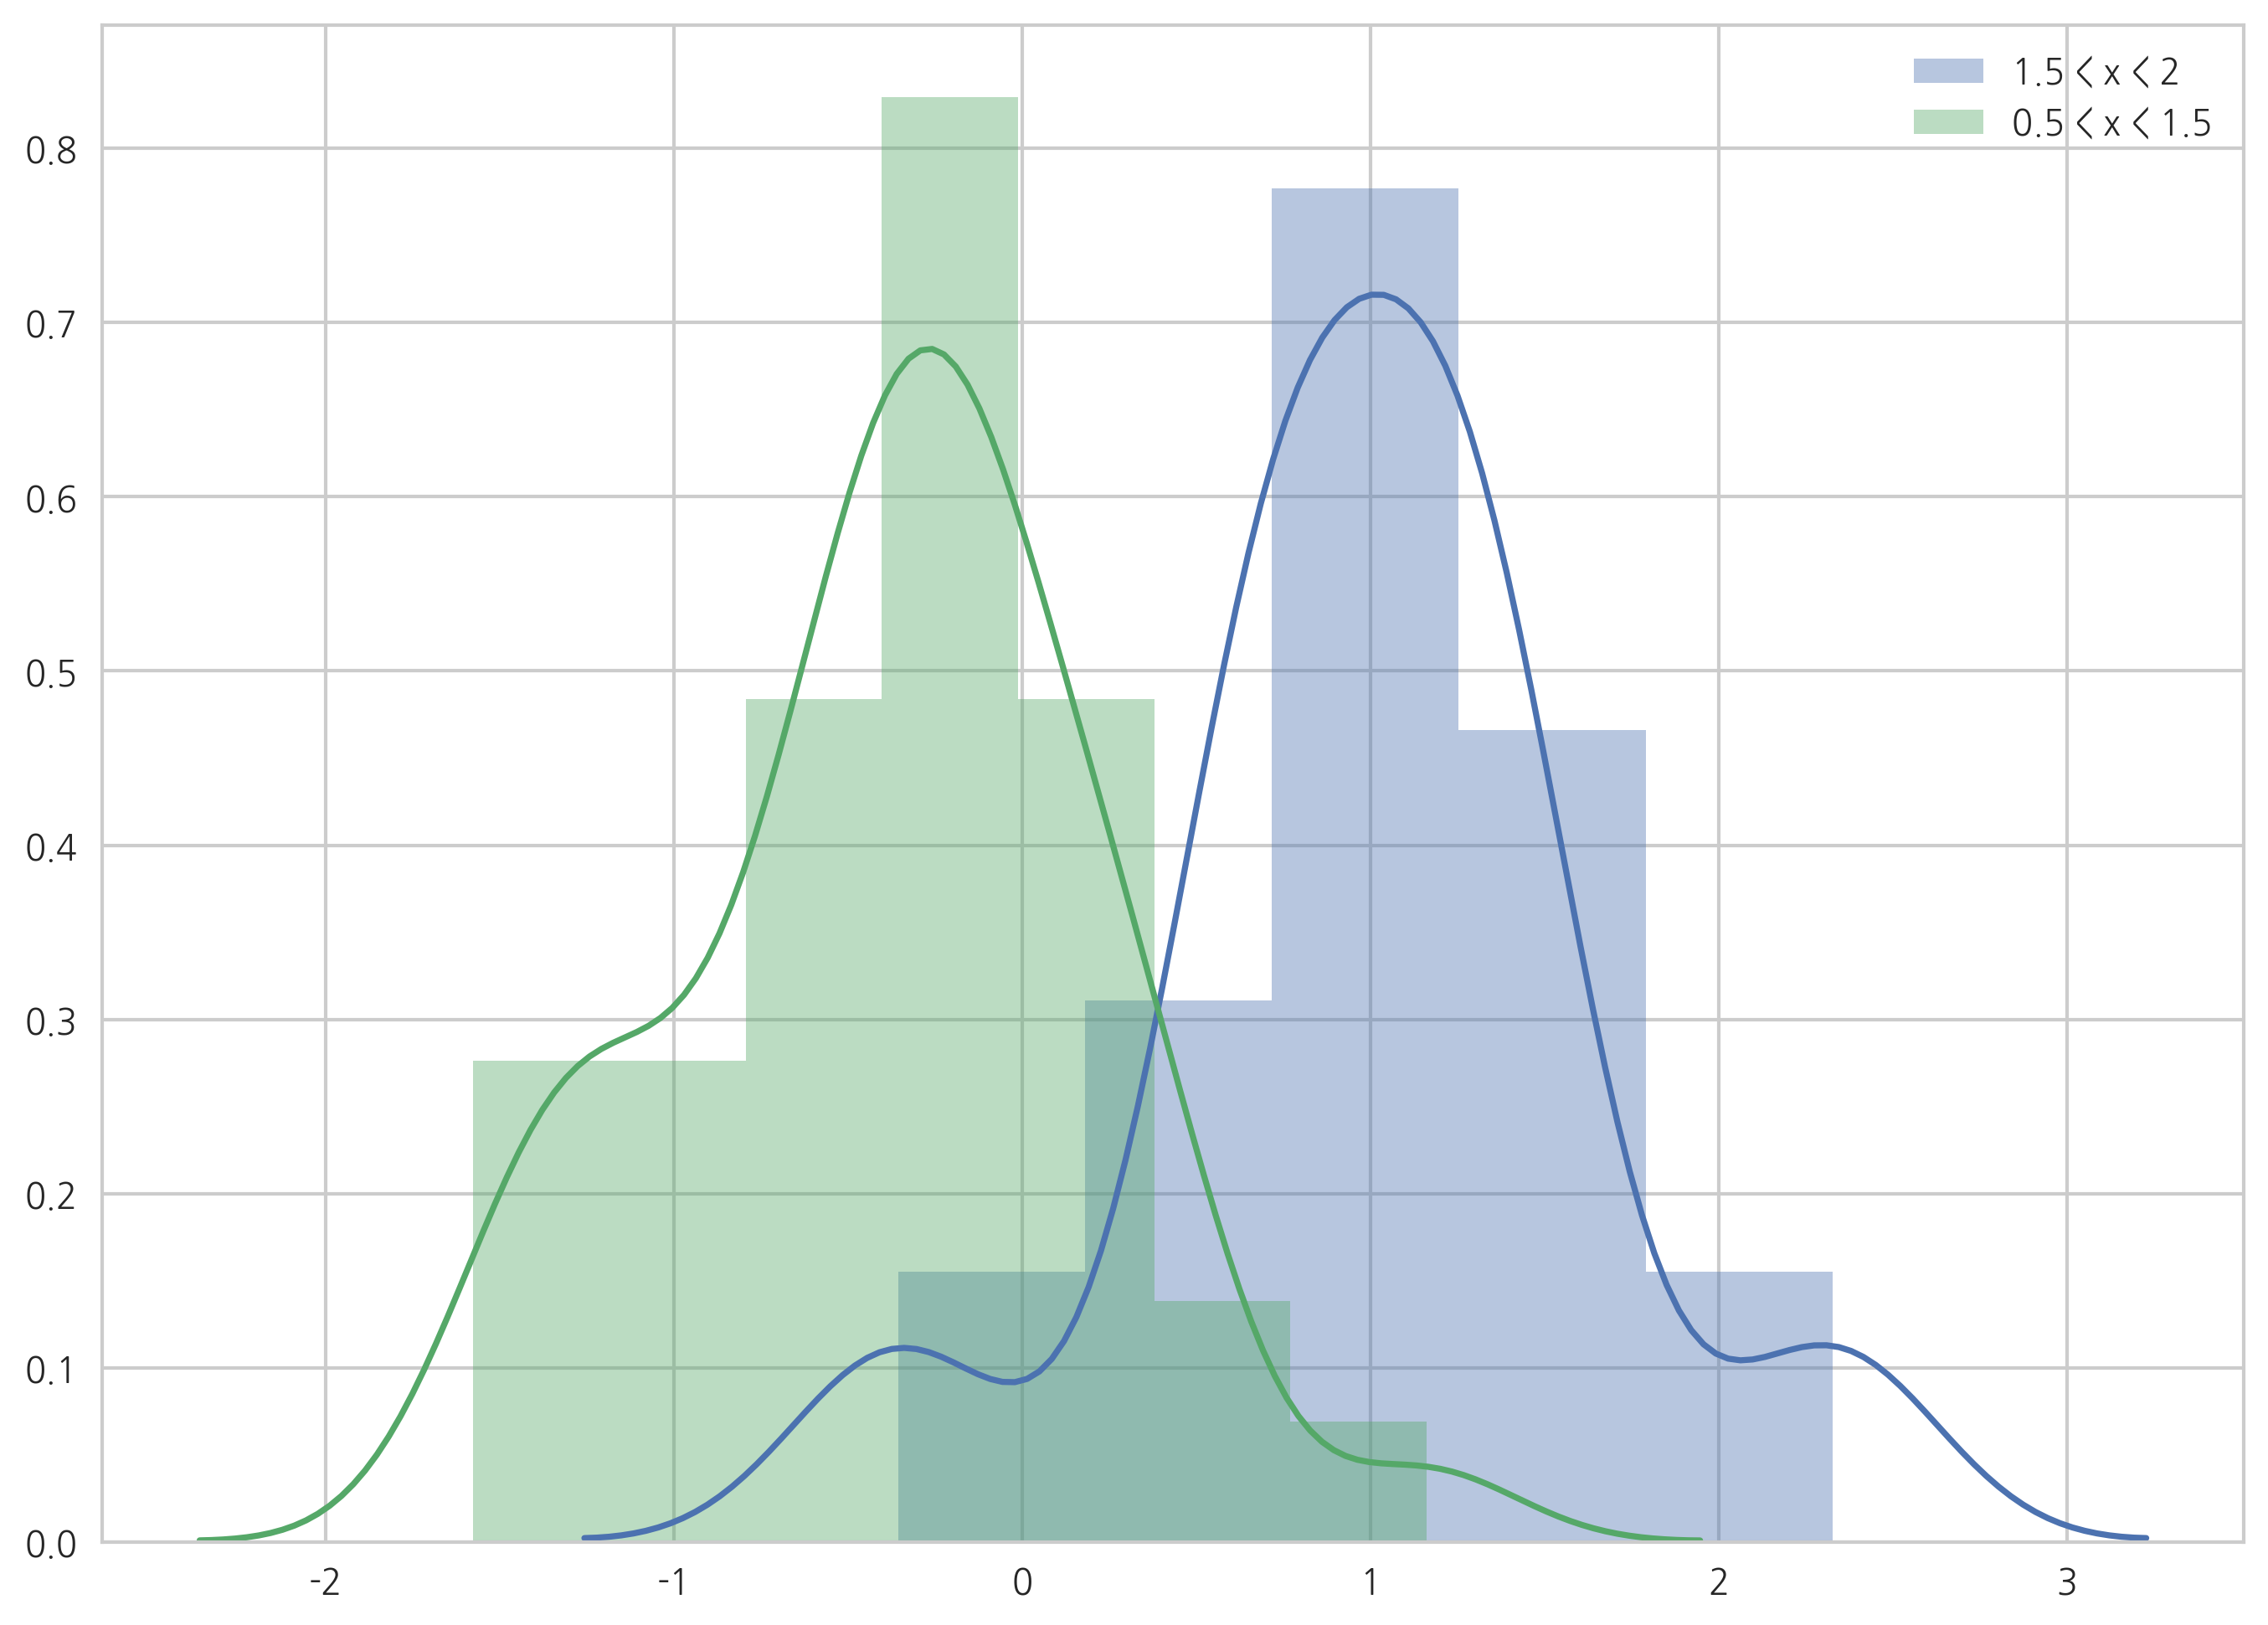

In [60]:
sns.distplot(result3.resid[((1.5 < x3) & (x3 < 2))], label="1.5 < x < 2")
sns.distplot(result3.resid[((0.5 < x3) & (x3 < 1.5))], label="0.5 < x < 1.5")
plt.legend()
plt.show()

## 회귀 계수의 표준 오차

가중치 $\hat{w}$ 도 정규 분포 확률 변수인 $y$의 선형 변환이므로 정규 분포를 따른다.

$$  
\begin{eqnarray}
\hat{w} 
&=& (X^TX)^{-1} X^T y \\
&=& (X^TX)^{-1} X^T (X w + \epsilon) \\
&=& w + (X^TX)^{-1} X^T \epsilon \\
\end{eqnarray}
$$

따라서 가중치의 기댓값은 다음과 같다.

$$  
\begin{eqnarray}
\text{E}[\hat{w}] 
&=&  \text{E}[ w + (X^TX)^{-1} X^T \epsilon ] \\
&=&  w + (X^TX)^{-1} X^T \text{E}[ \epsilon ] \\
&=& w
\end{eqnarray}
$$


가중치의 (공)분산을 계산하면 다음과 같다.


$$
\begin{eqnarray}
\text{Cov}[\hat{w}] 
&=& E[(\hat{w} - w)(\hat{w} - w)^T] \\
&=& E[((X^TX)^{-1} X^T \epsilon)((X^TX)^{-1} X^T \epsilon)^T] \\
&=& E[(X^TX)^{-1} X^T \epsilon \epsilon^T X(X^TX)^{−1} ] \\
&=& (X^TX)^{-1} X^T E[\epsilon \epsilon^T] X(X^TX)^{−1} \\
&=& (X^TX)^{-1} X^T (\sigma^2 I) X(X^TX)^{−1} \\
&=& \sigma^2  (X^TX)^{-1}
\end{eqnarray}
$$


$\sigma^2$의 값은 알지 못하므로 다음과 같이 추정한다.

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$
여기에서 $N$은 표본 데이터의 수, $K$는 독립 변수의 수이다.

따라서 $\hat{w}$의 (공)분산의 추정값은 다음과 같다.

$$ \text{Est.Cov}[\hat{w}]  = s^2(X^TX)^{-1}$$

이 공분산 행렬에서 우리가 관심을 가지는 값은 $w_i$의 분산을 뜻하는 대각 성분이다.

$$\text{Est.Var}[\hat{w}_i]  = \left( \text{Est.Cov}[\hat{w}] \right)_{ii} $$


이 값에서 구한 표준 편차를 **회귀 계수의 표준 오차(Standard Error of Regression Coefficient)**라고 한다.

 $$ {se_i} = \sqrt{s^2 \big((X^TX)^{-1}\big)_{ii}} $$

## 단일 계수 t-검정 (Single Coefficient t-test)

$\hat{w}$을 위에서 구한 표준 오차로 나눈 값은 자유도가 $N-K$인 스튜던트 t 분포를 따른다.

$$  \dfrac{\hat{w}_i - w_i}{se_i} \sim t_{N-K} $$

이를 검정 통계량(test statistics)로 사용하면 특정 회귀 계수 $w_i$가 0 인지 아닌지에 대해 조사할 수 있다.

$$ H_0 : \;\; w_i = 0 $$

만약 유의확률이 0에 가깝게 나온다면 위의 귀무가설은 기각이므로 $w_i$ 값이 0일 가능성은 적다. 하지만 유의확률이 유의수준을 넘는 큰 값이 나온다면 반대로 $w_i$ 값이 0일 가능성이 크다. 즉, 해당 독립변수는 종속변수와 아무런 상관성이 없을 가능성이 있다는 뜻이다.

StatsModels `summary` 메서드가 출력하는 회귀분석 보고서에서 `std err`로 표시된 열이 모형계수의 표준오차, `t`로 표시된 열이 단일 계수 t-검정의 검정 통계량, 그리고 `P>|t|`로 표시된 열이 유의확률을 뜻한다. 

아래의 보고서에서는 첫번째 모형계수는 실제 값이 0일 가능성 즉, 상수항을 가지지 않을 가능성이 높다고 할 수 있다.

In [62]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07176
Date:                Mon, 26 Jun 2017   Prob (F-statistic):              0.789
Time:                        22:25:50   Log-Likelihood:                -925.70
No. Observations:                 100   AIC:                             1855.
Df Residuals:                      98   BIC:                             1861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1958.2734    256.560      7.633      0.0

## Loss-of-Fit 검정 (회귀 분석 F-검정)

개별 개수가 아닌 전체 회귀 계수가 모두 의미가 있는지 확인하려면 에 대해 다음과 같은 귀무 가설을 생각할 수 있다.

$$ H_0 : w_1  = w_2 = \cdots = w_K = 0 $$

이는 전체 독립 변수 중 어느 것도 의미를 가진 것이 없다는 뜻이다. 대부분의 경우, 이 귀무가설은 기각되는데 유의확률이 얼마나 작은가에 따라서 기각되는 정도가 달라진다. 즉, 유의확률이 작으면 작을 수록 더 강력하게 기각된 것이므로 더 의미가 있는 모형이 된다. 따라서 여러 모형의 유의확률을 비교하면 어느 모형이 더 성능이 좋은가를 비교할 수 있다. 이러한 귀무 가설을 검정하는 것을 Loss-of-Fit 검정 또는 회귀 분석 F-검정(regression F-test)이라고 한다.

위 보고서에서 `F-statistic`라고 표시된 `400.3`이라는 값이 회귀분석 F-검정의 검정통계량이고 `Prob (F-statistic)`로 표시된 `2.21e-36`라는 값이 유의확률이다.

***
올바른 모델일 수록 P-Value가 작아진다. 모델 전체의 신뢰도를 보는것 Prob(F-statistic)
***